In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
# import seaborn as sns
# import pickle
import time
from tqdm import tqdm

%matplotlib inline

#每次可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import warnings
warnings.filterwarnings("ignore")

#中文字体
import matplotlib
matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

# XGB 历史数据

In [101]:
train = pd.read_csv('train_preprocessing34_full.csv')

train.shape
train.head()

(278894, 266)

,user_context_trade_count,user_city_trade_count,user_day_count,user_shop_count,city_item_count_his,shop_item_count_his,user_shop_next_time_sub,user_age_level,city_item_count,shop_star_level,user_trade_hot,user_item_num,shop_trade_hot,user_count,shop_score_delivery,user_item_last_time_sub,city_hot,user_sell_trade_power_mean,is_last_click,user_is_his,is_last_user_item_click,item_hot,user_item_count_first_time_sub,user_sell_power,user_shop_day_num,item_trade_hot,item_sales_level,item_occupation_trade_count,item_gender_count,minute,hour,item_score2,user_minute_query,user_id_idx,item_pred_property_score,brand_item_count_his,user_minute_count,pred_property_split_count,item_occupation_count,user_shop_trade_count,item_brand_id_idx,next_time_sub,user_day_query,user_sell_power_mean_item_minus,yesterday,user_item_trade_count,user_yesterhour_query,brand_is_his,item_pred_category_score,user_brand_count,user_item_count,city_brand_count_his,item_gender_trade_count,user_shop_count_first_time_sub,brand_hot,item_trade_percent,user_is_trade_his,item_collected_level,item_id_idx,user_sell_power_mean,brand_is_trade_his,city_trade_hot,user_gender_id,city_brand_count,item_minute_query,item_is_his,item_pred_property_score_item%,occupation_hot,context_page_id,shop_id_idx,user_context_count,last_time_sub,item_property_split_count,item_hour_query,user_shop_last_time_sub,user_trade_percent,min_time,shop_item_count,user_count_first_time_sub,user_item_day_query,user_sell_trade_power,shop_hot,user_occupation_id,user_brand_trade_count,brand_trade_hot,user_shop_num,user_item_minute_query,item_city_id_idx,day,item_pv_level,user_hot,user_item_next_time_sub,item_category_split_count,shop_score,brand_item_count,user_hour_query,pred_category_split_count,item_score,user_hour_count,brand_trade_percent,item_price_level,item_age_count,user_yesterday_query,shop_score_service,occupation_trade_hot,user_city_count,item_score3,user_item_day_num,item_pred_property_score_pred%,item_is_trade_his,item_pred_category_score_item%,occupation_trade_percent,shop_review_num_level,shop_review_positive_rate,user_sell_trade_power_mean_item_minus,user_item_hour_query,shop_score_description,yesterhour,max_click_time_sub,is_home,item_pred_category_score_pred%,item_age_trade_count,user_star_level,item_day_query,max_user_item_click_time_sub,user_query_maxsell,category_2,property_7,property_1,query_col_6,item_collected_level_bayes_rate_1,item_price_stair,user_query_maxpv,user_query_cheapest,user_occupation_stair,property_5,user_query_best_service,user_age_stair,query_col_5,query_col_1,query_col_0,user_query_maxqueryitem_c_similarity,user_star_stair,item_pv_stair_shop_id_bayes_rate_2,item_sales_stair,property_8,user_query_maxcollect,property_2,user_query_best_description,user_query_maxreview,property_0,property_3,query_col_2,category_1,hour_stair,user_query_best_delivery,query_col_3,user_query_maxshopstar,time_slice_shop_review_num_level_bayes_rate_1,property_6,item_sales_stair_user_age_stair_bayes_rate_1,item_city_id_shop_id_bayes_rate_2,context_page_stair,user_query_maxqueryitem_p_similarity,item_brand_id_shop_review_num_level_bayes_rate_1,gender_filled,query_col_4,property_4,pred_cat_mean_5,pred_cat_mean_14,pred_cat_mean_17,pred_cat_mean_22,shop_item_cnt,item_cat_vec_22,item_cat_vec_2,item_brand_id+hist_hour_ctr_pred_1,item_brand_id+shop_score_description_pred_1,user_gender_id+star_category_min_pred_1,pred_cat_mean_15,item_id_pred_1,item_cat_vec_21,24h_ppt_hot+star_property_max_pred_1,star_category_mean,item_cat_vec_19,item_price_level+item_pred_cat_cos_pred_1,star_property_min,24h_cat_hot,item_cat_vec_5,item_cat_vec_3,item_cat_vec_16,pred_cat_mean_0,star_property_var,shop_review_num_level+shop_item_cnt_pred_1,pred_cat_mean_6,item_pv_level+shop_review_positive_rate_pred_1,item_cat_vec_9,item_sales_level+item_pv_level_pred_1,pred_cat_mean_2,pred_cat_mean_8,item_pred_cat_cos,item_price_level+star_property_min_pred_1,item_pred_ppt_cos,item_cat_vec_10,pred_cat_mean_19,item_cat_vec_13,shop_brand_

In [201]:
# [
#     'item_category_split_count', 'item_property_split_count', 'day', 'hour',
#     'minute', 'user_shop_count', 'user_item_count', 'user_context_count',
#     'user_shop_trade_count', 'user_item_trade_count',
#     'user_context_trade_count', 'user_brand_count', 'user_city_count',
#     'user_brand_trade_count', 'user_city_trade_count', 'item_occupation_count',
#     'item_age_count', 'item_gender_count', 'item_occupation_trade_count',
#     'item_age_trade_count', 'item_gender_trade_count', 'shop_score',
#     'item_score', 'item_score2', 'item_score3', 'pred_category_split_count',
#     'pred_property_split_count', 'item_pred_category_score',
#     'item_pred_property_score', 'item_pred_category_score_item%',
#     'item_pred_property_score_item%', 'item_pred_category_score_pred%',
#     'item_pred_property_score_pred%', 'item_hot', 'user_hot', 'shop_hot',
#     'brand_hot', 'occupation_hot', 'city_hot', 'item_trade_hot',
#     'user_trade_hot', 'shop_trade_hot', 'brand_trade_hot',
#     'occupation_trade_hot', 'city_trade_hot', 'user_sell_power',
#     'user_sell_power_mean', 'user_sell_power_mean_item_minus',
#     'user_sell_trade_power', 'user_sell_trade_power_mean',
#     'user_sell_trade_power_mean_item_minus', 'yesterday', 'yesterhour',
#     'user_day_query', 'user_yesterday_query', 'user_hour_query',
#     'user_yesterhour_query', 'user_minute_query', 'item_day_query',
#     'item_hour_query', 'user_item_day_query', 'user_item_hour_query',
#     'item_minute_query', 'user_item_minute_query', 'user_count',
#     'user_day_count', 'user_hour_count', 'user_minute_count', 'min_time',
#     'user_is_his', 'item_is_his', 'brand_is_his', 'user_is_trade_his',
#     'item_is_trade_his', 'brand_is_trade_his', 'item_trade_percent',
#     'brand_trade_percent', 'user_trade_percent', 'occupation_trade_percent',
#     'is_home', 'shop_item_count', 'brand_item_count', 'city_brand_count',
#     'city_item_count', 'shop_item_count_his', 'brand_item_count_his',
#     'city_brand_count_his', 'city_item_count_his', 'item_id_idx',
#     'user_id_idx', 'shop_id_idx', 'item_brand_id_idx', 'item_city_id_idx',
#     'next_time_sub', 'last_time_sub', 'user_item_num', 'user_shop_num',
#     'user_item_day_num', 'user_shop_day_num'
# ]
# [
#     'item_category_split_count', 'day', 'hour', 'minute', 'user_shop_count',
#     'user_item_count', 'user_context_count', 'user_shop_trade_count',
#     'user_item_trade_count', 'user_context_trade_count', 'user_brand_count',
#     'user_city_count', 'user_city_trade_count', 'item_gender_count',
#     'item_occupation_trade_count', 'item_age_trade_count', 'shop_score',
#     'item_score2', 'item_score3', 'pred_category_split_count',
#     'pred_property_split_count', 'item_pred_category_score',
#     'item_pred_property_score', 'item_pred_category_score_item%',
#     'item_pred_property_score_pred%', 'item_hot', 'user_hot', 'shop_hot',
#     'brand_hot', 'occupation_hot', 'city_hot', 'user_trade_hot',
#     'shop_trade_hot', 'occupation_trade_hot', 'city_trade_hot',
#     'user_sell_power', 'user_sell_power_mean',
#     'user_sell_power_mean_item_minus', 'user_sell_trade_power',
#     'user_sell_trade_power_mean_item_minus', 'yesterday', 'yesterhour',
#     'user_day_query', 'user_yesterday_query', 'user_hour_query',
#     'user_minute_query', 'user_item_day_query', 'user_item_hour_query',
#     'item_minute_query', 'user_item_minute_query', 'user_count',
#     'user_day_count', 'user_hour_count', 'user_minute_count', 'user_is_his',
#     'brand_is_his', 'user_is_trade_his', 'item_is_trade_his',
#     'brand_is_trade_his', 'user_trade_percent', 'occupation_trade_percent',
#     'is_home', 'brand_item_count', 'city_brand_count', 'city_item_count',
#     'city_brand_count_his', 'city_item_count_his'
# ]

In [31]:
len(predictors)

110

In [102]:
origin = [
    'item_price_level', 'item_sales_level', 'item_collected_level',
    'item_pv_level', 'user_gender_id', 'user_age_level', 'user_occupation_id',
    'user_star_level', 'context_page_id', 'shop_review_num_level',
    'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
    'shop_score_delivery', 'shop_score_description'
]

predictors = [
    'item_category_split_count', 'item_property_split_count', 'day', 'hour',
    'minute', 'user_shop_count', 'user_item_count', 'user_context_count',
    'user_shop_trade_count', 'user_item_trade_count',
    'user_context_trade_count', 'user_brand_count', 'user_city_count',
    'user_brand_trade_count', 'user_city_trade_count', 'item_occupation_count',
    'item_age_count', 'item_gender_count', 'item_occupation_trade_count',
    'item_age_trade_count', 'item_gender_trade_count', 'shop_score',
    'item_score', 'item_score2', 'item_score3', 'pred_category_split_count',
    'pred_property_split_count', 'item_pred_category_score',
    'item_pred_property_score', 'item_pred_category_score_item%',
    'item_pred_property_score_item%', 'item_pred_category_score_pred%',
    'item_pred_property_score_pred%', 'item_hot', 'user_hot', 'shop_hot',
    'brand_hot', 'occupation_hot', 'city_hot', 'item_trade_hot',
    'user_trade_hot', 'shop_trade_hot', 'brand_trade_hot',
    'occupation_trade_hot', 'city_trade_hot', 'user_sell_power',
    'user_sell_power_mean', 'user_sell_power_mean_item_minus',
    'user_sell_trade_power', 'user_sell_trade_power_mean',
    'user_sell_trade_power_mean_item_minus', 'yesterday', 'yesterhour',
    'user_day_query', 'user_yesterday_query', 'user_hour_query',
    'user_yesterhour_query', 'user_minute_query', 'item_day_query',
    'item_hour_query', 'user_item_day_query', 'user_item_hour_query',
    'item_minute_query', 'user_item_minute_query', 'user_count',
    'user_day_count', 'user_hour_count', 'user_minute_count', 'min_time',
    'user_is_his', 'item_is_his', 'brand_is_his', 'user_is_trade_his',
    'item_is_trade_his', 'brand_is_trade_his', 'item_trade_percent',
    'brand_trade_percent', 'user_trade_percent', 'occupation_trade_percent',
    'is_home', 'shop_item_count', 'brand_item_count', 'city_brand_count',
    'city_item_count', 'shop_item_count_his', 'brand_item_count_his',
    'city_brand_count_his', 'city_item_count_his', 'item_id_idx',
    'user_id_idx', 'shop_id_idx', 'item_brand_id_idx', 'item_city_id_idx',
    'next_time_sub', 'last_time_sub', 'user_item_num', 'user_shop_num',
    'user_item_day_num', 'user_shop_day_num', 'user_item_next_time_sub',
    'user_item_last_time_sub', 'user_shop_next_time_sub',
    'user_shop_last_time_sub', 'user_count_first_time_sub',
    'user_item_count_first_time_sub', 'user_shop_count_first_time_sub',
    'is_last_click', 'is_last_user_item_click', 'max_click_time_sub',
    'max_user_item_click_time_sub'
]

predictors_noleak = [
    'item_category_split_count', 'day', 'hour', 'minute', 'user_shop_count',
    'user_item_count', 'user_context_count', 'user_shop_trade_count',
    'user_item_trade_count', 'user_context_trade_count', 'user_brand_count',
    'user_city_count', 'user_city_trade_count', 'item_gender_count',
    'item_occupation_trade_count', 'item_age_trade_count', 'shop_score',
    'item_score2', 'item_score3', 'pred_category_split_count',
    'pred_property_split_count', 'item_pred_category_score',
    'item_pred_property_score', 'item_pred_category_score_item%',
    'item_pred_property_score_pred%', 'item_hot', 'user_hot', 'shop_hot',
    'brand_hot', 'occupation_hot', 'city_hot', 'user_trade_hot',
    'shop_trade_hot', 'occupation_trade_hot', 'city_trade_hot',
    'user_sell_power', 'user_sell_power_mean',
    'user_sell_power_mean_item_minus', 'user_sell_trade_power',
    'user_sell_trade_power_mean_item_minus', 'yesterday', 'yesterhour',
    'user_day_query', 'user_yesterday_query', 'user_hour_query',
    'user_minute_query', 'user_item_day_query', 'user_item_hour_query',
    'item_minute_query', 'user_item_minute_query', 'user_count',
    'user_day_count', 'user_hour_count', 'user_minute_count', 'user_is_his',
    'brand_is_his', 'user_is_trade_his', 'item_is_trade_his',
    'brand_is_trade_his', 'user_trade_percent', 'occupation_trade_percent',
    'is_home', 'brand_item_count', 'city_brand_count', 'city_item_count',
    'city_brand_count_his', 'city_item_count_his', 'item_id_idx',
    'user_id_idx', 'shop_id_idx', 'item_brand_id_idx', 'item_city_id_idx'
]

target = ['is_trade']

In [56]:
#onehot
onehot = ['user_gender_id', 'user_occupation_id', 'user_age_level']

drop = set(list(train.columns)) - set(predictors)
train = train.drop(drop, axis=1)
train = pd.get_dummies(train, columns=onehot)

In [5]:
import sys
sys.path.append('/Users/zero/xgboost/python-package')
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

C:\Users\ZERO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [103]:
test = train[train.is_trade == -1]
val = train[(train.is_trade != -1) & (train.day == 24)]
train = train[(train.is_trade != -1) & (train.day != 24)]

train.shape
val.shape
test.shape

(203112, 266)

(57411, 266)

(18371, 266)

In [13]:
def remove_out_shop(train, test):
    trainid = {}
    testid = {}
    for shop_id in train.shop_id.values:
        trainid[shop_id] = trainid.get(shop_id, 0) + 1
    for shop_id in test.shop_id.values:
        testid[shop_id] = testid.get(shop_id, 0) + 1
    select_id = []
    for key in trainid:
        if (trainid[key] == 1) and (testid.get(key, 0) == 0):
            select_id.append(key)
    return select_id


train = train[~train.shop_id.isin(remove_out_shop(train, test))]

In [21]:
len(origin)
len(predictors)

predictors = list(set(origin + predictors))
predictors = list(set(predictors) - set(rubbish_features))
len(predictors)

15

121

121

0.0823236789879


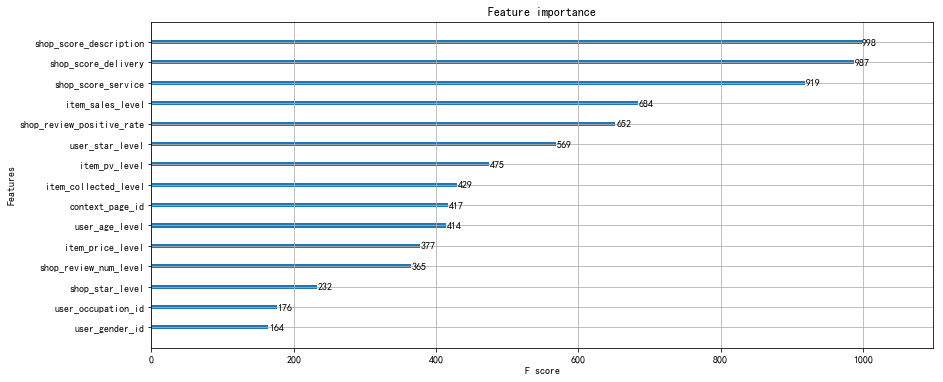

In [37]:
#train/val
params = {
    'objective': 'binary:logistic',
    'eta': 0.04,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

predictors = list(set(origin + predictors))
# predictors = list(set(predictors) - set(rubbish_features))
xgbtrain = xgb.DMatrix(train[predictors], train[target])
xgbval = xgb.DMatrix(val[predictors])
model = xgb.train(params, xgbtrain, num_boost_round=600)
y_pred = model.predict(xgbval)
y_pred = pd.Series(y_pred, name='val')

print(log_loss(val[target], y_pred))
xgb.plot_importance(model)
# 0.0813627345225(全部) 0.0812007377677(有效特征)
#0.0810017960511(最好参数)0.04*560 无leak
#0.0795475894699 0.04*500 leak

In [211]:
#去掉不重要的特征
all_features = model.get_score()
unimportant_features = []
for item in enumerate(
        sorted(all_features.items(), key=lambda x: x[1], reverse=True)[-9:]):
    unimportant_features.append(item[1][0])
predictors = list(set(predictors) - set(unimportant_features))
len(predictors)
unimportant_features

81

['user_sell_trade_power',
 'user_city_count',
 'user_shop_count',
 'city_item_count',
 'occupation_hot',
 'user_brand_count',
 'occupation_trade_hot',
 'city_brand_count_his',
 'user_hot']

In [200]:
train.shape
val.shape
test.shape

(203112, 151)

(57411, 151)

(18371, 151)

In [20]:
#train/test
params = {
    'objective': 'binary:logistic',
    'eta': 0.04,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

predictors = list(set(origin + predictors))
predictors = list(set(predictors) - set(rubbish_features))

train = pd.concat([train, val])
xgbtrain = xgb.DMatrix(train[predictors], train[target])
model = xgb.train(params, xgbtrain, num_boost_round=600)

xgbtest = xgb.DMatrix(test[predictors])
y_pred = model.predict(xgbtest)

idx = test.instance_id.reset_index()
idx['predicted_score'] = y_pred
idx[['instance_id', 'predicted_score']].to_csv(
    'resultWithHistory.txt',
    sep=' ',
    header=['instance_id', 'predicted_score'],
    index=False)

In [49]:
# 0.0816262372061(3:4):87
params = {
    'objective': 'binary:logistic',
    'eta': 0.07,
    'colsample_bytree': 0.886,
    'min_child_weight': 0.1,
    'max_depth': 5,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
} * 210
# 0.0811316881227(3:4):101 mac
params = {
    'objective': 'binary:logistic',
    'eta': 0.03,
    'colsample_bytree': 0.886,
    'min_child_weight': 0.2,
    'max_depth': 5,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
} * 550
# 0.0811539451487(3:4):101 windows
params = {
    'objective': 'binary:logistic',
    'eta': 0.03,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.0,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
} * 550
# 0.0810381300404(3:4)
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 2.0,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.05,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
} * 265

# 特征筛选

In [36]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.04,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

feature_performance = {}

for i in predictors:
    temp_features = origin.copy()
    temp_features.append(i)
    temp_features = list(set(temp_features))
    xgbtrain = xgb.DMatrix(train[temp_features], train[target])
    xgbval = xgb.DMatrix(val[temp_features])
    model = xgb.train(params, xgbtrain, num_boost_round=600)
    y_pred = model.predict(xgbval)
    y_pred = pd.Series(y_pred, name='val')

    print(str(i) + ':' + str(log_loss(val[target], y_pred)))
    feature_performance[i] = log_loss(val[target], y_pred)

item_category_split_count:0.0822793199714
item_property_split_count:0.0822996615349
day:0.0822811776733
hour:0.0823007816579
minute:0.082255229866
user_shop_count:0.0822286426023
user_item_count:0.0823187756659
user_context_count:0.0822858028819
user_shop_trade_count:0.0822893925006
user_item_trade_count:0.0822029624109
user_context_trade_count:0.0823211671383
user_brand_count:0.0822409726771
user_city_count:0.0823618338848
user_brand_trade_count:0.0823211671383
user_city_trade_count:0.0823329746309
item_occupation_count:0.082329712764
item_age_count:0.0824219684563
item_gender_count:0.0823698014434
item_occupation_trade_count:0.0821958024295
item_age_trade_count:0.0823457188697
item_gender_trade_count:0.0823379000949
shop_score:0.0822610283534
item_score:0.0823830530589
item_score2:0.0823840771376
item_score3:0.0823374076205
pred_category_split_count:0.0822923347687
pred_property_split_count:0.0822707274869
item_pred_category_score:0.0822593222461
item_pred_property_score:0.0823000989

In [29]:
rubbish_features = [
    'user_id_idx', 'item_id_idx', 'item_hour_query',
    'item_pred_category_score_pred%', 'item_brand_id_idx', 'brand_trade_hot',
    'brand_trade_hot', 'shop_id_idx', 'min_time', 'item_age_count',
    'brand_trade_percent'
]
len(rubbish_features)

11

In [38]:
rubbish_features = []

for i in enumerate(feature_performance):
    if feature_performance[i[1]] > 0.0823236789879:
        rubbish_features.append(i[1])
len(rubbish_features)

27

In [ ]:
origin: 0.0823236789879
origin + predictors: 0.0813627345225

# 特征融合

In [17]:
basics_cols = [
    'item_price_level', 'item_sales_level', 'item_collected_level',
    'item_pv_level', 'user_gender_id', 'user_age_level', 'user_occupation_id',
    'user_star_level', 'context_page_id', 'shop_review_num_level',
    'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
    'shop_score_delivery', 'shop_score_description'
]

zero_feas = [
    # 基础特征
    basics_cols,
    #id转vector
    [
        'item_id_idx', 'user_id_idx', 'shop_id_idx', 'item_brand_id_idx',
        'item_city_id_idx'
    ],
    # 时间特征 !!
    [
        'day', 'hour', 'minute', 'yesterday', 'yesterhour', 'next_time_sub',
        'last_time_sub', 'user_item_next_time_sub', 'user_item_last_time_sub',
        'user_shop_next_time_sub', 'user_shop_last_time_sub',
        'user_count_first_time_sub', 'user_item_count_first_time_sub',
        'user_shop_count_first_time_sub', 'is_last_click',
        'is_last_user_item_click', 'max_click_time_sub',
        'max_user_item_click_time_sub'
    ],
    #shop、item得分 !!
    ['item_score', 'item_score2', 'item_score3', 'shop_score'],
    # 查询次数 !
    [
        'user_day_query', 'user_yesterday_query', 'user_hour_query',
        'user_yesterhour_query', 'user_minute_query', 'item_day_query',
        'item_hour_query', 'user_item_day_query', 'user_item_hour_query',
        'item_minute_query', 'user_item_minute_query'
    ],
    # user在一个时间段出现的次数序号 !
    ['user_count', 'user_day_count', 'user_hour_count', 'user_minute_count'],
    # item与pred类型特征
    [
        'item_category_split_count', 'item_property_split_count',
        'pred_category_split_count', 'pred_property_split_count',
        'item_pred_category_score', 'item_pred_property_score',
        'item_pred_category_score_item%', 'item_pred_property_score_item%',
        'item_pred_category_score_pred%', 'item_pred_property_score_pred%'
    ],
    # 统计特征
    [
        'user_shop_count', 'user_item_count', 'user_context_count',
        'user_shop_trade_count', 'user_item_trade_count',
        'user_context_trade_count', 'user_brand_count', 'user_city_count',
        'user_brand_trade_count', 'user_city_trade_count', 'shop_item_count',
        'item_occupation_count', 'item_age_count', 'item_gender_count',
        'item_occupation_trade_count', 'item_age_trade_count',
        'item_gender_trade_count', 'brand_item_count', 'city_brand_count',
        'city_item_count', 'user_item_num', 'user_shop_num',
        'user_item_day_num', 'user_shop_day_num', 'min_time'
    ],
    # 火热程度（搜索次数） --
    [
        'item_hot', 'user_hot', 'shop_hot', 'brand_hot', 'occupation_hot',
        'city_hot', 'item_trade_hot', 'user_trade_hot', 'shop_trade_hot',
        'brand_trade_hot', 'occupation_trade_hot', 'city_trade_hot'
    ],
    # user购买力、成交率 --
    [
        'user_sell_power', 'user_sell_trade_power', 'user_sell_power_mean',
        'user_sell_trade_power_mean', 'user_sell_power_mean_item_minus',
        'user_sell_trade_power_mean_item_minus', 'is_home'
    ],
    # 有没有在历史中出现过 --
    [
        'user_is_his', 'brand_is_his', 'user_is_trade_his',
        'item_is_trade_his', 'brand_is_trade_his', 'item_is_his'
    ],
    # 成交率 --
    [
        'user_trade_percent',
        'occupation_trade_percent',
        'brand_trade_percent',
        'item_trade_percent',
    ],
    # 历史数据中出现次数 --
    [
        'city_brand_count_his', 'city_item_count_his', 'shop_item_count_his',
        'brand_item_count_his'
    ],
    # star用户喜爱程度
    [],
    # 平均值编码
    [],
    # 贝叶斯平滑
    [],
    # 分级特征
    [],
    # 最大最小特征/局部最优特征
    []
]

cjf_feas = [
    # 基础特征
    [],
    # 时间特征
    [],
    #shop、item得分
    [],
    # 查询次数
    [],
    # user在一个时间段出现的次数序号
    [],
    # item与pred类型特征
    [
        'category_1',
        'category_2',
        'property_0',
        'property_1',
        'property_2',
        'property_3',
        'property_4',
        'property_5',
        'property_6',
        'property_7',
        'property_8',
        'query_col_0',
        'query_col_1',
        'query_col_2',
        'query_col_3',
        'query_col_4',
        'query_col_5',
        'query_col_6',
    ],
    # 统计特征
    [],
    # 火热程度（搜索次数）
    [],
    # user购买力、成交率
    [],
    # 有没有在历史中出现过
    [],
    # 成交率
    [],
    # 历史数据中出现次数
    [],
    # star用户喜爱程度
    [],
    # 平均值编码
    [],
    # 贝叶斯平滑
    [
        'item_pv_stair_shop_id_bayes_rate_2',
        'item_city_id_shop_id_bayes_rate_2',
        'item_brand_id_shop_review_num_level_bayes_rate_1',
        'item_sales_stair_user_age_stair_bayes_rate_1',
        'time_slice_shop_review_num_level_bayes_rate_1',
        'item_collected_level_bayes_rate_1'
    ],
    # 分级特征
    [
        'gender_filled',
        'user_age_stair',
        'user_occupation_stair',
        'user_star_stair',
        'context_page_stair',
        'hour_stair',
        'item_price_stair',
        'item_sales_stair',
    ],
    # 最大最小特征/局部最优特征
    [
        'user_query_cheapest',
        'user_query_maxsell',
        'user_query_maxcollect',
        'user_query_maxpv',
        'user_query_best_service',
        'user_query_best_delivery',
        'user_query_best_description',
        'user_query_maxshopstar',
        'user_query_maxreview',
        'user_query_maxqueryitem_c_similarity',
        'user_query_maxqueryitem_p_similarity',
    ]
]

cjy_feas = [
    # 基础特征
    [],
    # 时间特征
    [],
    #shop、item得分
    [],
    # 查询次数
    [],
    # user在一个时间段出现的次数序号
    [],
    # item与pred类型特征
    [
        'item_cat_vec_0', 'item_cat_vec_1', 'item_cat_vec_2', 'item_cat_vec_3',
        'item_cat_vec_4', 'item_cat_vec_5', 'item_cat_vec_6', 'item_cat_vec_7',
        'item_cat_vec_8', 'item_cat_vec_9', 'item_cat_vec_10',
        'item_cat_vec_11', 'item_cat_vec_12', 'item_cat_vec_13',
        'item_cat_vec_14', 'item_cat_vec_15', 'item_cat_vec_16',
        'item_cat_vec_17', 'item_cat_vec_18', 'item_cat_vec_19',
        'item_cat_vec_20', 'item_cat_vec_21', 'item_cat_vec_22',
        'item_cat_vec_23', 'pred_cat_mean_0', 'pred_cat_mean_1',
        'pred_cat_mean_2', 'pred_cat_mean_3', 'pred_cat_mean_4',
        'pred_cat_mean_5', 'pred_cat_mean_6', 'pred_cat_mean_7',
        'pred_cat_mean_8', 'pred_cat_mean_9', 'pred_cat_mean_10',
        'pred_cat_mean_11', 'pred_cat_mean_12', 'pred_cat_mean_13',
        'pred_cat_mean_14', 'pred_cat_mean_15', 'pred_cat_mean_16',
        'pred_cat_mean_17', 'pred_cat_mean_18', 'pred_cat_mean_19',
        'pred_cat_mean_20', 'pred_cat_mean_21', 'pred_cat_mean_22',
        'pred_cat_mean_23', 'item_pred_cat_cos', 'item_pred_ppt_cos'
    ],
    # 统计特征
    ['shop_item_cnt', 'shop_brand_cnt'],
    # 火热程度（搜索次数）
    ['24h_cat_hot', '24h_ppt_hot', '24h_user_seem_times'],
    # user购买力、成交率
    [],
    # 有没有在历史中出现过
    [],
    # 成交率
    [],
    # 历史数据中出现次数
    [],
    # star用户喜爱程度
    [
        'star_category_max', 'star_category_min', 'star_category_mean',
        'star_category_var', 'star_property_max', 'star_property_min',
        'star_property_mean', 'star_property_var'
    ],
    # 平均值编码
    [
        'item_brand_id+item_price_level_pred_1', 'shop_id_pred_1',
        'item_id_pred_1', 'item_sales_level+item_collected_level_pred_1',
        'shop_star_level+shop_item_cnt_pred_1',
        'shop_review_num_level+shop_item_cnt_pred_1',
        'item_price_level+item_pv_level_pred_1', 'item_price_level_pred_1',
        'item_sales_level+item_pv_level_pred_1',
        'shop_item_cnt+shop_brand_cnt_pred_1',
        'user_age_level+user_star_level_pred_1', '24h_user_seem_times_pred_1',
        'item_brand_id+shop_brand_cnt_pred_1',
        'item_collected_level+item_id_pred_1',
        'item_price_level+item_pred_cat_cos_pred_1',
        'item_brand_id+hist_hour_ctr_pred_1',
        'item_brand_id+shop_score_description_pred_1',
        'item_city_id+context_page_id_pred_1',
        'item_pv_level+shop_review_positive_rate_pred_1',
        'item_id+hist_hour_ctr_pred_1',
        'item_price_level+star_property_min_pred_1',
        'user_star_level+shop_id_pred_1', 'shop_item_cnt+24h_ppt_hot_pred_1',
        'item_brand_id+star_property_max_pred_1',
        'user_gender_id+star_category_min_pred_1',
        'shop_item_cnt+star_property_max_pred_1',
        'item_sales_level+context_page_id_pred_1',
        'item_collected_level+shop_score_description_pred_1',
        'shop_review_num_level+hist_hour_ctr_pred_1',
        'item_collected_level+user_gender_id_pred_1',
        'shop_item_cnt+star_property_var_pred_1',
        '24h_ppt_hot+star_property_max_pred_1',
        'user_star_level+star_property_max_pred_1',
        'user_age_level+user_id_pred_1'
    ],
    # 贝叶斯平滑
    [],
    # 分级特征
    [],
    # 最大最小特征/局部最优特征
    []
]

target = ['is_trade']

In [18]:
zero_fea_list = []
for crt_list in zero_feas:
    for i in crt_list:
        zero_fea_list.append(i)
zero_fea_list = list(set(zero_fea_list))
print('zero_feas len =', len(zero_fea_list))

cjf_fea_list = []
for crt_list in cjf_feas:
    for i in crt_list:
        cjf_fea_list.append(i)
cjf_fea_list = list(set(cjf_fea_list))
print('cjf_feas len =', len(cjf_fea_list))

cjy_fea_list = []
for crt_list in cjy_feas:
    for i in crt_list:
        cjy_fea_list.append(i)
cjy_fea_list = list(set(cjy_fea_list))
print('cjy_feas len =', len(cjy_fea_list))

zero_feas len = 125
cjf_feas len = 43
cjy_feas len = 97


In [3]:
cjy_fea_list

['item_cat_vec_4',
 'shop_item_cnt+star_property_var_pred_1',
 'pred_cat_mean_11',
 'item_cat_vec_5',
 'star_category_min',
 'item_cat_vec_15',
 'item_cat_vec_6',
 'pred_cat_mean_6',
 'pred_cat_mean_21',
 'pred_cat_mean_23',
 'shop_id_pred_1',
 'item_cat_vec_10',
 'item_sales_level+context_page_id_pred_1',
 'pred_cat_mean_2',
 'pred_cat_mean_13',
 'star_property_var',
 'item_cat_vec_19',
 'pred_cat_mean_12',
 'pred_cat_mean_14',
 'shop_star_level+shop_item_cnt_pred_1',
 'item_cat_vec_16',
 'pred_cat_mean_19',
 'shop_item_cnt+shop_brand_cnt_pred_1',
 'item_price_level+star_property_min_pred_1',
 'user_star_level+star_property_max_pred_1',
 'item_brand_id+hist_hour_ctr_pred_1',
 'pred_cat_mean_16',
 'item_brand_id+shop_score_description_pred_1',
 'star_category_mean',
 'item_price_level+item_pred_cat_cos_pred_1',
 '24h_cat_hot',
 'star_category_var',
 'shop_item_cnt',
 'item_cat_vec_1',
 '24h_user_seem_times_pred_1',
 'user_age_level+user_id_pred_1',
 'item_cat_vec_20',
 'item_pred_ppt_c

In [100]:
train_zero = pd.read_csv('train_preprocessing34.csv')
train_cjf1 = pd.read_csv('cjf_good_features_trainval.csv')
train_cjf2 = pd.read_csv('cjf_good_features_test.csv')
train_cjy = pd.read_csv('cjy_good_features.csv')

train_cjf = pd.concat([train_cjf1, train_cjf2])
del train_cjf1
del train_cjf2

train_zero.shape
train_cjf.shape
train_cjy.shape

train = pd.concat(
    [
        train_zero[zero_fea_list].reset_index(drop=True),
        train_cjf[cjf_fea_list].reset_index(drop=True),
        train_cjy[cjy_fea_list].reset_index(drop=True), train['is_trade']
    ],
    axis=1)

del train_zero
del train_cjf
del train_cjy

train.shape
train.head()

(278894, 168)

(278894, 68)

(278894, 116)

(278894, 266)

,user_context_trade_count,user_city_trade_count,user_day_count,user_shop_count,city_item_count_his,shop_item_count_his,user_shop_next_time_sub,user_age_level,city_item_count,shop_star_level,user_trade_hot,user_item_num,shop_trade_hot,user_count,shop_score_delivery,user_item_last_time_sub,city_hot,user_sell_trade_power_mean,is_last_click,user_is_his,is_last_user_item_click,item_hot,user_item_count_first_time_sub,user_sell_power,user_shop_day_num,item_trade_hot,item_sales_level,item_occupation_trade_count,item_gender_count,minute,hour,item_score2,user_minute_query,user_id_idx,item_pred_property_score,brand_item_count_his,user_minute_count,pred_property_split_count,item_occupation_count,user_shop_trade_count,item_brand_id_idx,next_time_sub,user_day_query,user_sell_power_mean_item_minus,yesterday,user_item_trade_count,user_yesterhour_query,brand_is_his,item_pred_category_score,user_brand_count,user_item_count,city_brand_count_his,item_gender_trade_count,user_shop_count_first_time_sub,brand_hot,item_trade_percent,user_is_trade_his,item_collected_level,item_id_idx,user_sell_power_mean,brand_is_trade_his,city_trade_hot,user_gender_id,city_brand_count,item_minute_query,item_is_his,item_pred_property_score_item%,occupation_hot,context_page_id,shop_id_idx,user_context_count,last_time_sub,item_property_split_count,item_hour_query,user_shop_last_time_sub,user_trade_percent,min_time,shop_item_count,user_count_first_time_sub,user_item_day_query,user_sell_trade_power,shop_hot,user_occupation_id,user_brand_trade_count,brand_trade_hot,user_shop_num,user_item_minute_query,item_city_id_idx,day,item_pv_level,user_hot,user_item_next_time_sub,item_category_split_count,shop_score,brand_item_count,user_hour_query,pred_category_split_count,item_score,user_hour_count,brand_trade_percent,item_price_level,item_age_count,user_yesterday_query,shop_score_service,occupation_trade_hot,user_city_count,item_score3,user_item_day_num,item_pred_property_score_pred%,item_is_trade_his,item_pred_category_score_item%,occupation_trade_percent,shop_review_num_level,shop_review_positive_rate,user_sell_trade_power_mean_item_minus,user_item_hour_query,shop_score_description,yesterhour,max_click_time_sub,is_home,item_pred_category_score_pred%,item_age_trade_count,user_star_level,item_day_query,max_user_item_click_time_sub,user_query_maxsell,category_2,property_7,property_1,query_col_6,item_collected_level_bayes_rate_1,item_price_stair,user_query_maxpv,user_query_cheapest,user_occupation_stair,property_5,user_query_best_service,user_age_stair,query_col_5,query_col_1,query_col_0,user_query_maxqueryitem_c_similarity,user_star_stair,item_pv_stair_shop_id_bayes_rate_2,item_sales_stair,property_8,user_query_maxcollect,property_2,user_query_best_description,user_query_maxreview,property_0,property_3,query_col_2,category_1,hour_stair,user_query_best_delivery,query_col_3,user_query_maxshopstar,time_slice_shop_review_num_level_bayes_rate_1,property_6,item_sales_stair_user_age_stair_bayes_rate_1,item_city_id_shop_id_bayes_rate_2,context_page_stair,user_query_maxqueryitem_p_similarity,item_brand_id_shop_review_num_level_bayes_rate_1,gender_filled,query_col_4,property_4,pred_cat_mean_5,pred_cat_mean_14,pred_cat_mean_17,pred_cat_mean_22,shop_item_cnt,item_cat_vec_22,item_cat_vec_2,item_brand_id+hist_hour_ctr_pred_1,item_brand_id+shop_score_description_pred_1,user_gender_id+star_category_min_pred_1,pred_cat_mean_15,item_id_pred_1,item_cat_vec_21,24h_ppt_hot+star_property_max_pred_1,star_category_mean,item_cat_vec_19,item_price_level+item_pred_cat_cos_pred_1,star_property_min,24h_cat_hot,item_cat_vec_5,item_cat_vec_3,item_cat_vec_16,pred_cat_mean_0,star_property_var,shop_review_num_level+shop_item_cnt_pred_1,pred_cat_mean_6,item_pv_level+shop_review_positive_rate_pred_1,item_cat_vec_9,item_sales_level+item_pv_level_pred_1,pred_cat_mean_2,pred_cat_mean_8,item_pred_cat_cos,item_price_level+star_property_min_pred_1,item_pred_ppt_cos,item_cat_vec_10,pred_cat_mean_19,item_cat_vec_13,shop_brand_

In [102]:
train.to_csv('train_preprocessing34_full.csv', index=False)

In [4]:
train = pd.read_csv('train_preprocessing34_full.csv')

train.shape
train.head()

(278894, 266)

,user_context_trade_count,user_city_trade_count,user_day_count,user_shop_count,city_item_count_his,shop_item_count_his,user_shop_next_time_sub,user_age_level,city_item_count,shop_star_level,user_trade_hot,user_item_num,shop_trade_hot,user_count,shop_score_delivery,user_item_last_time_sub,city_hot,user_sell_trade_power_mean,is_last_click,user_is_his,is_last_user_item_click,item_hot,user_item_count_first_time_sub,user_sell_power,user_shop_day_num,item_trade_hot,item_sales_level,item_occupation_trade_count,item_gender_count,minute,hour,item_score2,user_minute_query,user_id_idx,item_pred_property_score,brand_item_count_his,user_minute_count,pred_property_split_count,item_occupation_count,user_shop_trade_count,item_brand_id_idx,next_time_sub,user_day_query,user_sell_power_mean_item_minus,yesterday,user_item_trade_count,user_yesterhour_query,brand_is_his,item_pred_category_score,user_brand_count,user_item_count,city_brand_count_his,item_gender_trade_count,user_shop_count_first_time_sub,brand_hot,item_trade_percent,user_is_trade_his,item_collected_level,item_id_idx,user_sell_power_mean,brand_is_trade_his,city_trade_hot,user_gender_id,city_brand_count,item_minute_query,item_is_his,item_pred_property_score_item%,occupation_hot,context_page_id,shop_id_idx,user_context_count,last_time_sub,item_property_split_count,item_hour_query,user_shop_last_time_sub,user_trade_percent,min_time,shop_item_count,user_count_first_time_sub,user_item_day_query,user_sell_trade_power,shop_hot,user_occupation_id,user_brand_trade_count,brand_trade_hot,user_shop_num,user_item_minute_query,item_city_id_idx,day,item_pv_level,user_hot,user_item_next_time_sub,item_category_split_count,shop_score,brand_item_count,user_hour_query,pred_category_split_count,item_score,user_hour_count,brand_trade_percent,item_price_level,item_age_count,user_yesterday_query,shop_score_service,occupation_trade_hot,user_city_count,item_score3,user_item_day_num,item_pred_property_score_pred%,item_is_trade_his,item_pred_category_score_item%,occupation_trade_percent,shop_review_num_level,shop_review_positive_rate,user_sell_trade_power_mean_item_minus,user_item_hour_query,shop_score_description,yesterhour,max_click_time_sub,is_home,item_pred_category_score_pred%,item_age_trade_count,user_star_level,item_day_query,max_user_item_click_time_sub,user_query_maxsell,category_2,property_7,property_1,query_col_6,item_collected_level_bayes_rate_1,item_price_stair,user_query_maxpv,user_query_cheapest,user_occupation_stair,property_5,user_query_best_service,user_age_stair,query_col_5,query_col_1,query_col_0,user_query_maxqueryitem_c_similarity,user_star_stair,item_pv_stair_shop_id_bayes_rate_2,item_sales_stair,property_8,user_query_maxcollect,property_2,user_query_best_description,user_query_maxreview,property_0,property_3,query_col_2,category_1,hour_stair,user_query_best_delivery,query_col_3,user_query_maxshopstar,time_slice_shop_review_num_level_bayes_rate_1,property_6,item_sales_stair_user_age_stair_bayes_rate_1,item_city_id_shop_id_bayes_rate_2,context_page_stair,user_query_maxqueryitem_p_similarity,item_brand_id_shop_review_num_level_bayes_rate_1,gender_filled,query_col_4,property_4,pred_cat_mean_5,pred_cat_mean_14,pred_cat_mean_17,pred_cat_mean_22,shop_item_cnt,item_cat_vec_22,item_cat_vec_2,item_brand_id+hist_hour_ctr_pred_1,item_brand_id+shop_score_description_pred_1,user_gender_id+star_category_min_pred_1,pred_cat_mean_15,item_id_pred_1,item_cat_vec_21,24h_ppt_hot+star_property_max_pred_1,star_category_mean,item_cat_vec_19,item_price_level+item_pred_cat_cos_pred_1,star_property_min,24h_cat_hot,item_cat_vec_5,item_cat_vec_3,item_cat_vec_16,pred_cat_mean_0,star_property_var,shop_review_num_level+shop_item_cnt_pred_1,pred_cat_mean_6,item_pv_level+shop_review_positive_rate_pred_1,item_cat_vec_9,item_sales_level+item_pv_level_pred_1,pred_cat_mean_2,pred_cat_mean_8,item_pred_cat_cos,item_price_level+star_property_min_pred_1,item_pred_ppt_cos,item_cat_vec_10,pred_cat_mean_19,item_cat_vec_13,shop_brand_

In [11]:
len(predictors)
predictors_new = list(set(predictors) - set(cjf_fea_list))
len(predictors_new)

205

186

In [12]:
test = train[train.day == 25]
val = train[train.day == 24]
train = train[(train.day != 24) & (train.day != 25)]

train.shape
val.shape
test.shape

(203112, 1498)

(57411, 1498)

(18371, 1498)

In [13]:
import sys
sys.path.append('/Users/zero/xgboost/python-package')
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

feature_performance2 = {}

for i in tqdm(list(set(train_cjf_new.columns) - set(cjf_new_features) - set(predictors_new))):
    temp_features = predictors_new.copy()
    temp_features.append(i)
    temp_features = list(set(temp_features))
#     len(temp_features)
    xgbtrain = xgb.DMatrix(train[temp_features], train[target])
    xgbval = xgb.DMatrix(val[temp_features])
    model = xgb.train(params, xgbtrain, num_boost_round=450)
    y_pred = model.predict(xgbval)
    y_pred = pd.Series(y_pred, name='val')

#     print(str(i) + ':' + str(log_loss(val[target], y_pred)))
    feature_performance2[i] = log_loss(val[target], y_pred)

In [118]:
rubbish_features_zero = []
rubbish_features_cjf = []
rubbish_features_cjy = []

for i in enumerate(feature_performance):
    if (feature_performance[i[1]] > 0.0823236789879) & (i[1] in zero_fea_list):
        rubbish_features_zero.append(i[1])
    elif (feature_performance[i[1]] >
          0.0823236789879) & (i[0] in cjf_fea_list):
        rubbish_features_cjf.append(i[1])
    elif (feature_performance[i[1]] >
          0.0823236789879) & (i[0] in cjy_fea_list):
        rubbish_features_cjy.append(i[1])

len(rubbish_features_zero)
len(rubbish_features_cjf)
len(rubbish_features_cjy)

rubbish_features = list(
    set(rubbish_features_zero + rubbish_features_cjf + rubbish_features_cjy))
len(rubbish_features)

26

In [122]:
sorted(feature_performance.items(), key=lambda x: x[1], reverse=True)

['query_col_4',
 'query_col_6',
 'query_col_0',
 'query_col_1',
 'query_col_2',
 'query_col_5',
 'query_col_3',
 'item_cat_vec_22',
 'item_cat_vec_2',
 'item_brand_id+shop_score_description_pred_1',
 'item_hot',
 'item_sales_stair',
 'item_cat_vec_19',
 'item_price_level+item_pred_cat_cos_pred_1',
 'star_property_var',
 'item_pv_level+shop_review_positive_rate_pred_1',
 'item_cat_vec_9',
 'item_pred_property_score',
 'item_occupation_count',
 'item_brand_id_idx',
 'item_pred_cat_cos',
 'item_pred_ppt_cos',
 'item_cat_vec_10',
 'item_gender_trade_count',
 'item_sales_stair_user_age_stair_bayes_rate_1',
 'item_city_id+context_page_id_pred_1',
 'star_category_var',
 'item_id_idx',
 'item_brand_id+shop_brand_cnt_pred_1',
 'item_minute_query',
 'item_is_his',
 'star_category_max',
 'item_pred_property_score_item%',
 'item_property_split_count',
 'item_city_id_idx',
 'item_brand_id_shop_review_num_level_bayes_rate_1',
 'item_brand_id+star_property_max_pred_1',
 'item_age_count',
 'star_prope

0.0794921043899


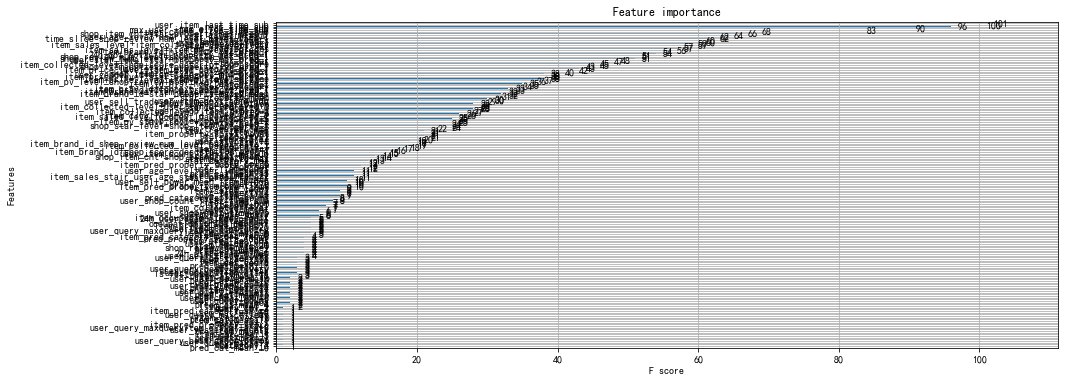

In [15]:
#train/val
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

predictors = list(
    set(zero_fea_list + cjf_fea_list + cjy_fea_list) - set(basics_cols))
predictors = list(set(basics_cols + predictors))
predictors = list(set(predictors) - set(rubbish_features))
# len(predictors)
xgbtrain = xgb.DMatrix(train[predictors], train[target])
xgbval = xgb.DMatrix(val[predictors])
model = xgb.train(params, xgbtrain, num_boost_round=265)
y_pred = model.predict(xgbval)
y_pred = pd.Series(y_pred, name='val')

print(log_loss(val[target], y_pred))
xgb.plot_importance(model)
#0.0794921043899

In [35]:
#lgb-cv
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'colsample_bytree': 0.886,
    'min_child_weight': 1,
    'max_depth': 4,
    'num_leaves': 16,
    'subsample': 0.886,
    'seed': 201803
}

predictors = list(
    set(zero_fea_list + cjf_fea_list + cjy_fea_list) - set(basics_cols))
predictors = list(set(basics_cols + predictors))
predictors = list(set(predictors) - set(rubbish_features))
len(predictors)

cv_train = pd.concat([train, val])
lgbtrain = lgb.Dataset(cv_train[predictors], label=cv_train['is_trade'].ravel())

lgb.cv(lgb_params, lgbtrain, nfold=5, num_boost_round=1000, early_stopping_rounds=50, verbose_eval=0)
# 0.0835527

239

{'binary_logloss-mean': [0.64783561478536367,
  0.60684103002383127,
  0.56958655768491595,
  0.5356035765501771,
  0.50449945155636089,
  0.47595055937987707,
  0.44967703499032857,
  0.42544360233627854,
  0.40304659492690725,
  0.38230797012395312,
  0.36307557875287655,
  0.34521328889064096,
  0.32860227819114896,
  0.31313772553916192,
  0.29872470475409507,
  0.28527775618486051,
  0.27271944882292753,
  0.26098693508198922,
  0.25001432824705033,
  0.23975105727342566,
  0.23013968005080537,
  0.22113810053691085,
  0.21270666007346564,
  0.20480067917931918,
  0.19738463920271357,
  0.19042731343934599,
  0.18389948750636848,
  0.17777448789015712,
  0.172025075783446,
  0.16662663697751007,
  0.16155535559678671,
  0.1567928153969923,
  0.15232259806342818,
  0.14812261375207286,
  0.14418047758778743,
  0.14048016909093533,
  0.13700225453202158,
  0.1337381652139919,
  0.13067066468002991,
  0.12779220187729975,
  0.12508836756907199,
  0.12255041767561285,
  0.120167078923

In [ ]:
#lgb_cv筛选特征
lgb_params = {
    'task': 'train',
    'objective': 'binary',
    'metric': { 'binary_logloss' },
    'learning_rate': 0.05,
#     'colsample_bytree': 0.886,
#     'min_child_weight': 1,
    'max_depth': 3,
    'num_leaves': 8,
    'feature_fraction': 0.5,
#     'subsample': 0.886,
    'seed': 201803,
    'n_jobs': 8,
    'lambda_l1': 0.03,
    'lambda_l2': 0.01
}

feature_performance = {}
predictors = list(
    set(zero_fea_list + cjf_fea_list + cjy_fea_list) - set(basics_cols))

for i in enumerate(predictors):
    temp_features = basics_cols.copy()
    temp_features.append(i[1])
    temp_features = list(set(temp_features))
    
    cv_train = pd.concat([train, val])
    lgbtrain = lgb.Dataset(cv_train[temp_features], label=cv_train['is_trade'], feature_name=temp_features, free_raw_data=False)

    cv = lgb.cv(lgb_params, lgbtrain, nfold=5, num_boost_round=1000, early_stopping_rounds=50, verbose_eval=0)

    print(str(i[0]) + ':' + str(i[1]) + '->' + str(cv['binary_logloss-mean'][-1]))
    feature_performance[i] = cv['binary_logloss-mean'][-1]

In [11]:
#cv
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'logloss',
    'seed': 201803,
    'missing': -1
}

predictors = list(
    set(zero_fea_list + cjf_fea_list + cjy_fea_list) - set(basics_cols))
predictors = list(set(basics_cols + predictors))
predictors = list(set(predictors) - set(rubbish_features))
len(predictors)

cv_train = pd.concat([train, val])
xgbtrain = xgb.DMatrix(cv_train[predictors], cv_train[target])

cv = xgb.cv(
    params,
    dtrain=xgbtrain,
    num_boost_round=300,
    nfold=3,
    early_stopping_rounds=50,
    seed=201803)
print(cv.shape[0] + ':' + cv.iloc[-1, :]['test-logloss-mean'])

239

,test-logloss-mean,test-logloss-std,train-logloss-mean,train-logloss-std
0,0.639105,0.000025,0.639101,0.000029
1,0.591175,0.000030,0.591166,0.000059
2,0.548404,0.000053,0.548389,0.000075
3,0.510032,0.000068,0.510015,0.000096
4,0.475466,0.000082,0.475444,0.000114
5,0.444188,0.000092,0.444162,0.000138
6,0.415802,0.000103,0.415769,0.000160
7,0.389970,0.000118,0.389928,0.000177
8,0.366393,0.000141,0.366347,0.000188
9,0.344839,0.000150,0.344785,0.000211


In [99]:
#xgb_cv筛选特征
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'logloss',
    'seed': 201803,
    'missing': -1
}

# feature_performance = {}
# origin = list(set(zero_fea_list) - set(rubbish_features_zero + basics_cols))
# predictors = list(set(basics_cols + cjf_fea_list + cjy_fea_list))

for i in enumerate(predictors):
    temp_features = zero_fea_list.copy()
#     temp_features.append(i[1])
    temp_features = list(set(temp_features))
    
    cv_train = pd.concat([train, val])
    xgbtrain = xgb.DMatrix(cv_train[temp_features], cv_train[target])
#     len(temp_features)

    cv = xgb.cv(
    params,
    dtrain=xgbtrain,
    num_boost_round=1000,
    nfold=5,
    early_stopping_rounds=50,
    verbose_eval=None)

    print(str(i[0]) + ':' + str(i[1]) + '->' + str(cv.shape[0]) + ':' + str(cv['test-logloss-mean'][cv.shape[0]-1]))
#     feature_performance[i[1]] = [cv.shape[0], cv['test-logloss-mean'][cv.shape[0]-1]]

0:shop_score_description->299:0.0835518
1:star_category_max->299:0.0835518
2:pred_cat_mean_10->299:0.0835518
3:item_sales_level+item_pv_level_pred_1->299:0.0835518


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-26cf0f844b10>", line 36, in <module>
    verbose_eval=None)
  File "/usr/local/anaconda3/lib/python3.5/site-packages/xgboost/training.py", line 400, in cv
    fold.update(i, obj)
  File "/usr/local/anaconda3/lib/python3.5/site-packages/xgboost/training.py", line 219, in update
    self.bst.update(self.dtrain, iteration, fobj)
  File "/usr/local/anaconda3/lib/python3.5/site-packages/xgboost/core.py", line 806, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle, iteration, dtrain.handle))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 1821, in showtraceback
    stb = value._ren

KeyboardInterrupt: 

In [111]:
temp_result = [('next_time_sub', [333, 0.085642199999999988]),
 ('max_click_time_sub', [300, 0.085727599999999987]),
 ('last_time_sub', [304, 0.085866799999999993]),
 ('user_minute_query', [382, 0.085952399999999998]),
 ('user_count_first_time_sub', [361, 0.085969600000000007]),
 ('user_hour_query', [375, 0.086188000000000015]),
 ('user_item_last_time_sub', [385, 0.086232400000000015]),
 ('user_day_query', [294, 0.086238599999999999]),
 ('user_item_next_time_sub', [311, 0.086257399999999998]),
 ('user_item_count_first_time_sub', [311, 0.086278999999999995]),
 ('max_user_item_click_time_sub', [303, 0.086283799999999994]),
 ('is_last_click', [304, 0.086288000000000004]),
 ('user_shop_last_time_sub', [326, 0.086298799999999981]),
 ('user_shop_next_time_sub', [337, 0.086322200000000002]),
 ('user_shop_count_first_time_sub', [298, 0.086339199999999991]),
 ('user_minute_count', [373, 0.086368]),
 ('hour', [348, 0.086440199999999995]),
 ('min_time', [311, 0.086478000000000013]),
 ('yesterhour', [358, 0.08647959999999999]),
 ('user_hour_count', [311, 0.086499999999999994]),
 ('user_day_count', [298, 0.086512800000000015]),
 ('user_count', [373, 0.086561999999999986]),
 ('brand_trade_percent', [295, 0.08664079999999999]),
 ('pred_cat_mean_0', [297, 0.086645]),
 ('24h_user_seem_times', [304, 0.0866484]),
 ('shop_review_num_level+hist_hour_ctr_pred_1', [261, 0.0866508]),
 ('24h_user_seem_times_pred_1', [294, 0.0866532]),
 ('item_trade_percent', [264, 0.086654399999999993]),
 ('user_item_num', [298, 0.086655599999999999]),
 ('user_shop_num', [303, 0.086656800000000006]),
 ('item_cat_vec_4', [304, 0.086657999999999999]),
 ('city_item_count_his', [309, 0.086662600000000006]),
 ('city_trade_hot', [307, 0.086663000000000004]),
 ('user_item_day_query', [294, 0.086663799999999999]),
 ('item_cat_vec_10', [311, 0.086665800000000001]),
 ('pred_cat_mean_6', [329, 0.0866672]),
 ('item_cat_vec_17', [300, 0.0866706]),
 ('pred_cat_mean_10', [347, 0.086671000000000012]),
 ('item_cat_vec_15', [269, 0.086671999999999999]),
 ('item_city_id+context_page_id_pred_1', [304, 0.086672599999999989]),
 ('item_id_pred_1', [270, 0.086673399999999984]),
 ('pred_cat_mean_20', [296, 0.086674600000000004]),
 ('pred_cat_mean_15', [309, 0.086677199999999996]),
 ('item_cat_vec_11', [294, 0.086679599999999996]),
 ('shop_id_pred_1', [260, 0.086679600000000009]),
 ('item_cat_vec_7', [275, 0.086680200000000013]),
 ('item_occupation_trade_count', [293, 0.086680800000000002]),
 ('item_score2', [304, 0.086680800000000002]),
 ('item_cat_vec_1', [311, 0.086681800000000003]),
 ('pred_cat_mean_1', [309, 0.086681999999999995]),
 ('item_brand_id+item_price_level_pred_1', [275, 0.086682200000000001]),
 ('pred_cat_mean_9', [294, 0.086682200000000001]),
 ('item_brand_id+shop_brand_cnt_pred_1', [261, 0.086682400000000007]),
 ('city_brand_count_his', [315, 0.086682599999999999]),
 ('item_cat_vec_13', [311, 0.086682599999999999]),
 ('item_collected_level+item_id_pred_1', [286, 0.08668279999999999]),
 ('item_gender_trade_count', [274, 0.086682999999999996]),
 ('pred_cat_mean_16', [304, 0.086683199999999988]),
 ('item_cat_vec_18', [306, 0.0866836]),
 ('item_cat_vec_19', [306, 0.086684000000000011]),
 ('user_query_best_service', [304, 0.086684200000000017]),
 ('user_item_day_num', [275, 0.086685399999999996]),
 ('item_cat_vec_5', [311, 0.086685600000000002]),
 ('item_cat_vec_3', [311, 0.086685800000000007]),
 ('item_property_split_count', [273, 0.086686000000000013]),
 ('item_cat_vec_14', [311, 0.086686600000000003]),
 ('pred_cat_mean_23', [306, 0.086686799999999994]),
 ('item_cat_vec_21', [298, 0.086687]),
 ('item_trade_hot', [242, 0.086688600000000005]),
 ('item_cat_vec_22', [278, 0.086689600000000006]),
 ('pred_cat_mean_4', [301, 0.086689800000000011]),
 ('item_city_id_idx', [276, 0.086691799999999999]),
 ('shop_hot', [304, 0.086691800000000013]),
 ('user_yesterhour_query', [348, 0.086692199999999997]),
 ('city_hot', [302, 0.086692599999999995]),
 ('pred_cat_mean_5', [297, 0.0866928]),
 ('item_cat_vec_16', [304, 0.086692800000000014]),
 ('pred_cat_mean_8', [309, 0.086693199999999998]),
 ('user_hot', [303, 0.08669339999999999]),
 ('pred_cat_mean_21', [304, 0.086693999999999993]),
 ('pred_cat_mean_2', [298, 0.086694199999999999]),
 ('hour_stair', [311, 0.086694599999999997]),
 ('pred_cat_mean_19', [358, 0.086694600000000011]),
 ('item_cat_vec_0', [309, 0.086696400000000007]),
 ('item_cat_vec_12', [304, 0.086696799999999991]),
 ('user_sell_trade_power_mean_item_minus', [300, 0.086696999999999996]),
 ('city_item_count', [311, 0.086696999999999996]),
 ('item_cat_vec_2', [309, 0.086696999999999996]),
 ('shop_review_num_level+shop_item_cnt_pred_1', [275, 0.0866976]),
 ('user_occupation_stair', [308, 0.086698000000000011]),
 ('brand_is_his', [309, 0.086698200000000003]),
 ('pred_cat_mean_12', [283, 0.086698200000000003]),
 ('user_brand_trade_count', [309, 0.086698200000000003]),
 ('user_query_best_description', [294, 0.086698600000000015]),
 ('shop_item_cnt+shop_brand_cnt_pred_1', [298, 0.086698999999999998]),
 ('city_brand_count', [309, 0.086698999999999998]),
 ('brand_trade_hot', [298, 0.086699200000000004]),
 ('pred_cat_mean_17', [348, 0.086699200000000004]),
 ('shop_item_count', [297, 0.086700200000000005]),
 ('query_col_2', [309, 0.086700599999999989]),
 ('item_cat_vec_20', [249, 0.086701]),
 ('item_cat_vec_9', [309, 0.086703800000000011]),
 ('item_cat_vec_8', [309, 0.086704200000000009]),
 ('user_query_maxcollect', [356, 0.08670499999999999]),
 ('pred_cat_mean_11', [314, 0.086705199999999996]),
 ('user_city_trade_count', [298, 0.086705400000000002]),
 ('user_item_count', [300, 0.086705999999999991]),
 ('is_home', [299, 0.086706400000000003]),
 ('shop_item_count_his', [297, 0.086706599999999995]),
 ('item_cat_vec_6', [308, 0.086706600000000009]),
 ('user_query_maxsell', [300, 0.086707199999999984]),
 ('24h_ppt_hot', [311, 0.086709000000000008]),
 ('pred_cat_mean_13', [309, 0.0867092]),
 ('user_age_level+user_id_pred_1', [308, 0.086709200000000014]),
 ('item_pred_property_score_pred%', [308, 0.086709800000000004]),
 ('property_0', [298, 0.086709800000000004]),
 ('user_item_hour_query', [313, 0.086709800000000004]),
 ('pred_cat_mean_14', [311, 0.086709999999999995]),
 ('pred_property_split_count', [309, 0.086710199999999987]),
 ('brand_hot', [304, 0.08671100000000001]),
 ('user_brand_count', [294, 0.086712200000000003]),
 ('item_pred_property_score_item%', [295, 0.086712399999999995]),
 ('query_col_6', [294, 0.086712600000000001]),
 ('pred_cat_mean_18', [293, 0.086712600000000001]),
 ('user_query_maxreview', [293, 0.086712999999999998]),
 ('user_query_cheapest', [305, 0.086713999999999999]),
 ('property_3', [361, 0.086714199999999991]),
 ('query_col_0', [299, 0.086714800000000009]),
 ('item_brand_id+shop_score_description_pred_1', [297, 0.086715]),
 ('item_cat_vec_23', [304, 0.086715000000000014]),
 ('minute', [304, 0.086715799999999996]),
 ('item_is_his', [299, 0.086716199999999993]),
 ('brand_is_trade_his', [303, 0.086716199999999993]),
 ('user_query_maxqueryitem_c_similarity', [307, 0.086716600000000005]),
 ('user_is_trade_his', [299, 0.086717000000000002]),
 ('user_shop_day_num', [309, 0.086717000000000002]),
 ('item_hot', [260, 0.086717199999999994]),
 ('item_collected_level+user_gender_id_pred_1', [309, 0.0867174]),
 ('context_page_stair', [304, 0.086717799999999998]),
 ('occupation_trade_percent', [299, 0.086717799999999998]),
 ('star_property_max', [304, 0.086718200000000009]),
 ('query_col_5', [292, 0.086718599999999993]),
 ('yesterday', [294, 0.086718800000000013]),
 ('day', [294, 0.086718800000000013]),
 ('user_item_minute_query', [299, 0.086719399999999988]),
 ('pred_cat_mean_7', [331, 0.086719799999999986]),
 ('24h_cat_hot', [300, 0.0867198]),
 ('user_yesterday_query', [308, 0.086719999999999992]),
 ('user_sell_trade_power_mean', [269, 0.086719999999999992]),
 ('user_query_maxqueryitem_p_similarity', [334, 0.086721200000000012]),
 ('gender_filled', [300, 0.086721599999999996]),
 ('pred_cat_mean_3', [315, 0.086721799999999988]),
 ('user_query_maxshopstar', [304, 0.086722199999999999]),
 ('item_is_trade_his', [306, 0.086722600000000011]),
 ('item_gender_count', [297, 0.086723400000000006]),
 ('brand_item_count', [297, 0.086723599999999984]),
 ('item_price_stair', [275, 0.086724200000000001]),
 ('user_shop_count', [302, 0.086724200000000001]),
 ('item_price_level_pred_1', [294, 0.086724999999999983]),
 ('item_pred_property_score', [309, 0.086725399999999994]),
 ('occupation_trade_hot', [311, 0.086725799999999992]),
 ('occupation_hot', [311, 0.086725799999999992]),
 ('user_sell_power_mean', [347, 0.086725799999999992]),
 ('query_col_4', [296, 0.086726400000000009]),
 ('shop_trade_hot', [306, 0.086726600000000001]),
 ('user_age_stair', [298, 0.086726600000000015]),
 ('query_col_1', [300, 0.086726799999999993]),
 ('shop_score', [306, 0.086726800000000007]),
 ('shop_brand_cnt', [304, 0.086727200000000004]),
 ('pred_cat_mean_22', [278, 0.086727399999999982]),
 ('star_category_min', [376, 0.086727799999999994]),
 ('category_2', [306, 0.086728]),
 ('item_id+hist_hour_ctr_pred_1', [269, 0.086728399999999997]),
 ('item_pred_category_score_item%', [293, 0.086728400000000011]),
 ('shop_item_cnt', [261, 0.086728799999999995]),
 ('user_star_stair', [295, 0.086728800000000009]),
 ('user_age_level+user_star_level_pred_1', [270, 0.086729199999999992]),
 ('user_trade_hot', [300, 0.086730200000000007]),
 ('user_query_maxpv', [299, 0.086730200000000007]),
 ('item_age_trade_count', [275, 0.086731200000000008]),
 ('item_pred_category_score_pred%', [302, 0.086732599999999993]),
 ('user_query_best_delivery', [275, 0.086732999999999991]),
 ('user_trade_percent', [295, 0.086733199999999996]),
 ('user_gender_id+star_category_min_pred_1', [307, 0.086733199999999996]),
 ('star_category_max', [283, 0.086733400000000002]),
 ('user_star_level+shop_id_pred_1', [306, 0.086734200000000011]),
 ('pred_category_split_count', [299, 0.086734600000000009]),
 ('item_sales_stair', [304, 0.086734999999999993]),
 ('is_last_user_item_click', [300, 0.086738599999999999]),
 ('user_city_count', [333, 0.0867396]),
 ('star_category_var', [268, 0.086740999999999985]),
 ('query_col_3', [293, 0.086740999999999999]),
 ('user_sell_power_mean_item_minus', [309, 0.086741600000000002]),
 ('item_hour_query', [300, 0.086741600000000002]),
 ('item_category_split_count', [305, 0.086741999999999986]),
 ('item_pv_level+shop_review_positive_rate_pred_1',
  [295, 0.086742599999999989]),
 ('item_sales_level+item_collected_level_pred_1', [262, 0.086743000000000001]),
 ('item_brand_id+star_property_max_pred_1', [295, 0.086744399999999985]),
 ('user_is_his', [295, 0.086745199999999995]),
 ('shop_star_level+shop_item_cnt_pred_1', [274, 0.08674599999999999]),
 ('user_context_trade_count', [304, 0.086746200000000009]),
 ('user_shop_trade_count', [304, 0.086746200000000009]),
 ('user_item_trade_count', [304, 0.086746200000000009]),
 ('user_context_count', [304, 0.086746200000000009]),
 ('item_day_query', [273, 0.086747400000000002]),
 ('star_property_var', [304, 0.086748000000000006]),
 ('star_property_min', [324, 0.086749800000000016]),
 ('item_sales_level+item_pv_level_pred_1', [295, 0.086751999999999996]),
 ('item_collected_level+shop_score_description_pred_1',
  [274, 0.086752799999999991]),
 ('property_2', [299, 0.086753200000000003]),
 ('user_sell_trade_power', [300, 0.086753200000000003]),
 ('item_score3', [274, 0.086753799999999992]),
 ('item_pred_category_score', [304, 0.086754799999999993]),
 ('user_sell_power', [278, 0.086758399999999999]),
 ('item_price_level+item_pred_cat_cos_pred_1', [294, 0.086759000000000003]),
 ('property_6', [295, 0.086759199999999995]),
 ('brand_item_count_his', [304, 0.086759199999999995]),
 ('shop_id_idx', [347, 0.086759400000000014]),
 ('item_id_idx', [294, 0.086759599999999992]),
 ('star_property_mean', [306, 0.086760199999999996]),
 ('item_brand_id+hist_hour_ctr_pred_1', [278, 0.08676020000000001]),
 ('shop_item_cnt+star_property_var_pred_1', [278, 0.086761400000000016]),
 ('item_score', [275, 0.086761800000000014]),
 ('item_minute_query', [304, 0.086762200000000012]),
 ('property_4', [308, 0.086764599999999997]),
 ('property_5', [298, 0.086766399999999994]),
 ('item_pred_ppt_cos', [298, 0.086770799999999995]),
 ('item_price_level+item_pv_level_pred_1', [304, 0.086771000000000001]),
 ('star_category_mean', [308, 0.086771399999999999]),
 ('item_pred_cat_cos', [306, 0.086773199999999995]),
 ('item_occupation_count', [297, 0.086773599999999992]),
 ('item_collected_level_bayes_rate_1', [281, 0.08677399999999999]),
 ('item_brand_id_shop_review_num_level_bayes_rate_1', [270, 0.0867782]),
 ('user_star_level+star_property_max_pred_1', [294, 0.086779000000000009]),
 ('property_7', [281, 0.086781400000000009]),
 ('property_1', [276, 0.08678219999999999]),
 ('item_brand_id_idx', [350, 0.086785199999999979]),
 ('category_1', [262, 0.086787199999999995]),
 ('item_age_count', [306, 0.086787400000000001]),
 ('item_sales_level+context_page_id_pred_1', [299, 0.086792399999999992]),
 ('property_8', [261, 0.08679640000000001]),
 ('24h_ppt_hot+star_property_max_pred_1', [259, 0.086796799999999993]),
 ('item_city_id_shop_id_bayes_rate_2', [274, 0.086803000000000005]),
 ('user_id_idx', [353, 0.086805199999999999]),
 ('shop_item_cnt+24h_ppt_hot_pred_1', [267, 0.086806399999999992]),
 ('item_pv_stair_shop_id_bayes_rate_2', [278, 0.086806599999999998]),
 ('time_slice_shop_review_num_level_bayes_rate_1',
  [281, 0.086813200000000007]),
 ('item_sales_stair_user_age_stair_bayes_rate_1', [262, 0.086815200000000009]),
 ('item_price_level+star_property_min_pred_1', [317, 0.086825600000000017]),
 ('shop_item_cnt+star_property_max_pred_1', [304, 0.086825999999999987])]

feature_performance = {}
for i in temp_result:
    feature_performance[i[0]] = i[1]

In [98]:
#cv
feature_performance = {'24h_cat_hot': [381, 0.083976999999999996],
 '24h_ppt_hot': [443, 0.083885000000000001],
 '24h_ppt_hot+star_property_max_pred_1': [447, 0.083945199999999998],
 '24h_user_seem_times': [404, 0.083848199999999998],
 '24h_user_seem_times_pred_1': [444, 0.083867800000000006],
 'category_1': [353, 0.083939600000000017],
 'category_2': [448, 0.0838478],
 'context_page_id': [486, 0.083856800000000009],
 'context_page_stair': [435, 0.083879999999999996],
 'gender_filled': [436, 0.083922799999999992],
 'hour_stair': [437, 0.083911199999999991],
 'item_brand_id+hist_hour_ctr_pred_1': [438, 0.083912399999999998],
 'item_brand_id+item_price_level_pred_1': [400, 0.083902400000000002],
 'item_brand_id+shop_brand_cnt_pred_1': [381, 0.0838758],
 'item_brand_id+shop_score_description_pred_1': [436, 0.083914200000000008],
 'item_brand_id+star_property_max_pred_1': [446, 0.083893400000000007],
 'item_brand_id_shop_review_num_level_bayes_rate_1': [365,
  0.083964800000000006],
 'item_cat_vec_0': [381, 0.083877999999999994],
 'item_cat_vec_1': [381, 0.083813399999999996],
 'item_cat_vec_10': [343, 0.083881600000000001],
 'item_cat_vec_11': [418, 0.083831599999999992],
 'item_cat_vec_12': [427, 0.083818400000000001],
 'item_cat_vec_13': [365, 0.083844199999999994],
 'item_cat_vec_14': [411, 0.083888199999999996],
 'item_cat_vec_15': [426, 0.0837976],
 'item_cat_vec_16': [425, 0.083834000000000006],
 'item_cat_vec_17': [395, 0.083804199999999995],
 'item_cat_vec_18': [436, 0.083845599999999992],
 'item_cat_vec_19': [391, 0.083844999999999989],
 'item_cat_vec_2': [386, 0.083822800000000003],
 'item_cat_vec_20': [425, 0.083828599999999989],
 'item_cat_vec_21': [438, 0.08382160000000001],
 'item_cat_vec_22': [381, 0.083875799999999986],
 'item_cat_vec_23': [464, 0.083871000000000001],
 'item_cat_vec_3': [438, 0.083807599999999996],
 'item_cat_vec_4': [438, 0.083849799999999988],
 'item_cat_vec_5': [400, 0.083840400000000009],
 'item_cat_vec_6': [447, 0.083806199999999997],
 'item_cat_vec_7': [438, 0.08377939999999999],
 'item_cat_vec_8': [371, 0.083842200000000006],
 'item_cat_vec_9': [435, 0.083832999999999991],
 'item_city_id+context_page_id_pred_1': [352, 0.083906000000000008],
 'item_city_id_shop_id_bayes_rate_2': [375, 0.083957799999999999],
 'item_collected_level': [491, 0.083913199999999993],
 'item_collected_level+item_id_pred_1': [436, 0.083843600000000004],
 'item_collected_level+shop_score_description_pred_1': [348,
  0.083976800000000004],
 'item_collected_level+user_gender_id_pred_1': [380, 0.083827399999999996],
 'item_collected_level_bayes_rate_1': [448, 0.083919800000000003],
 'item_id+hist_hour_ctr_pred_1': [381, 0.083888999999999991],
 'item_id_pred_1': [457, 0.083907200000000001],
 'item_pred_cat_cos': [443, 0.083936800000000006],
 'item_pred_ppt_cos': [377, 0.083947999999999995],
 'item_price_level': [433, 0.083895799999999993],
 'item_price_level+item_pred_cat_cos_pred_1': [487, 0.083981200000000006],
 'item_price_level+item_pv_level_pred_1': [389, 0.083880200000000002],
 'item_price_level+star_property_min_pred_1': [391, 0.08395699999999999],
 'item_price_level_pred_1': [436, 0.083913199999999993],
 'item_price_stair': [381, 0.0839028],
 'item_pv_level': [436, 0.08391839999999999],
 'item_pv_level+shop_review_positive_rate_pred_1': [438, 0.083884399999999998],
 'item_pv_stair_shop_id_bayes_rate_2': [381, 0.083955399999999986],
 'item_sales_level': [434, 0.083660399999999996],
 'item_sales_level+context_page_id_pred_1': [381, 0.083816999999999989],
 'item_sales_level+item_collected_level_pred_1': [380, 0.083724000000000007],
 'item_sales_level+item_pv_level_pred_1': [477, 0.08371300000000001],
 'item_sales_stair': [380, 0.083897399999999983],
 'item_sales_stair_user_age_stair_bayes_rate_1': [384, 0.083964599999999986],
 'pred_cat_mean_0': [449, 0.083835999999999994],
 'pred_cat_mean_1': [381, 0.083860599999999993],
 'pred_cat_mean_10': [467, 0.083872600000000005],
 'pred_cat_mean_11': [436, 0.083891800000000002],
 'pred_cat_mean_12': [457, 0.083825000000000011],
 'pred_cat_mean_13': [435, 0.083856],
 'pred_cat_mean_14': [451, 0.083837200000000001],
 'pred_cat_mean_15': [474, 0.083873799999999998],
 'pred_cat_mean_16': [440, 0.083867200000000003],
 'pred_cat_mean_17': [444, 0.083882600000000002],
 'pred_cat_mean_18': [449, 0.083827200000000004],
 'pred_cat_mean_19': [448, 0.083821800000000002],
 'pred_cat_mean_2': [433, 0.083863000000000007],
 'pred_cat_mean_20': [438, 0.083854999999999999],
 'pred_cat_mean_21': [486, 0.083877999999999994],
 'pred_cat_mean_22': [446, 0.083816399999999999],
 'pred_cat_mean_23': [438, 0.083842600000000003],
 'pred_cat_mean_3': [438, 0.08385999999999999],
 'pred_cat_mean_4': [457, 0.083902400000000016],
 'pred_cat_mean_5': [471, 0.083834999999999993],
 'pred_cat_mean_6': [438, 0.083831000000000003],
 'pred_cat_mean_7': [442, 0.083843199999999993],
 'pred_cat_mean_8': [436, 0.08383320000000001],
 'pred_cat_mean_9': [433, 0.083843400000000012],
 'property_0': [449, 0.083936800000000006],
 'property_1': [425, 0.083915600000000007],
 'property_2': [442, 0.083909600000000001],
 'property_3': [438, 0.083884800000000009],
 'property_4': [406, 0.083929400000000001],
 'property_5': [380, 0.08392899999999999],
 'property_6': [400, 0.083885199999999993],
 'property_7': [448, 0.083974800000000002],
 'property_8': [381, 0.083941399999999999],
 'query_col_0': [442, 0.083884799999999982],
 'query_col_1': [449, 0.083902999999999991],
 'query_col_2': [393, 0.083872599999999992],
 'query_col_3': [448, 0.083914600000000006],
 'query_col_4': [426, 0.083915600000000007],
 'query_col_5': [381, 0.083908399999999994],
 'query_col_6': [449, 0.083861000000000005],
 'shop_brand_cnt': [449, 0.083929400000000001],
 'shop_id_pred_1': [452, 0.083872600000000005],
 'shop_item_cnt': [390, 0.083931000000000006],
 'shop_item_cnt+24h_ppt_hot_pred_1': [380, 0.083952399999999996],
 'shop_item_cnt+shop_brand_cnt_pred_1': [449, 0.083891999999999994],
 'shop_item_cnt+star_property_max_pred_1': [384, 0.083891199999999999],
 'shop_item_cnt+star_property_var_pred_1': [448, 0.083951200000000004],
 'shop_review_num_level': [448, 0.083860599999999993],
 'shop_review_num_level+hist_hour_ctr_pred_1': [438, 0.083940600000000004],
 'shop_review_num_level+shop_item_cnt_pred_1': [342, 0.083925600000000003],
 'shop_review_positive_rate': [400, 0.083909800000000007],
 'shop_score_delivery': [381, 0.083843799999999996],
 'shop_score_description': [448, 0.083854200000000018],
 'shop_score_service': [436, 0.083822399999999991],
 'shop_star_level': [440, 0.08388219999999999],
 'shop_star_level+shop_item_cnt_pred_1': [427, 0.083885399999999999],
 'star_category_max': [435, 0.08383539999999999],
 'star_category_mean': [375, 0.083887200000000009],
 'star_category_min': [526, 0.083830600000000005],
 'star_category_var': [438, 0.0839342],
 'star_property_max': [450, 0.083796800000000005],
 'star_property_mean': [438, 0.083930399999999988],
 'star_property_min': [449, 0.083878399999999992],
 'star_property_var': [381, 0.083962800000000004],
 'time_slice_shop_review_num_level_bayes_rate_1': [381, 0.083913199999999993],
 'user_age_level': [396, 0.08381920000000001],
 'user_age_level+user_id_pred_1': [435, 0.0838642],
 'user_age_level+user_star_level_pred_1': [439, 0.083713999999999997],
 'user_age_stair': [384, 0.083924399999999996],
 'user_gender_id': [448, 0.0838676],
 'user_gender_id+star_category_min_pred_1': [438, 0.083797199999999988],
 'user_occupation_id': [486, 0.0838724],
 'user_occupation_stair': [400, 0.083937800000000007],
 'user_query_best_delivery': [435, 0.083926399999999998],
 'user_query_best_description': [381, 0.0839506],
 'user_query_best_service': [381, 0.083931199999999984],
 'user_query_cheapest': [386, 0.083878199999999986],
 'user_query_maxcollect': [449, 0.083896200000000004],
 'user_query_maxpv': [444, 0.083926399999999998],
 'user_query_maxqueryitem_c_similarity': [436, 0.083920999999999996],
 'user_query_maxqueryitem_p_similarity': [451, 0.083905999999999994],
 'user_query_maxreview': [400, 0.083911199999999991],
 'user_query_maxsell': [401, 0.083869399999999997],
 'user_query_maxshopstar': [448, 0.083867600000000014],
 'user_star_level': [435, 0.083860799999999999],
 'user_star_level+shop_id_pred_1': [380, 0.083970599999999992],
 'user_star_level+star_property_max_pred_1': [451, 0.083837599999999998],
 'user_star_stair': [382, 0.08393239999999999]}

{'24h_cat_hot': [381, 0.083976999999999996],
 '24h_ppt_hot': [443, 0.083885000000000001],
 '24h_ppt_hot+star_property_max_pred_1': [447, 0.083945199999999998],
 '24h_user_seem_times': [404, 0.083848199999999998],
 '24h_user_seem_times_pred_1': [444, 0.083867800000000006],
 'category_1': [353, 0.083939600000000017],
 'category_2': [448, 0.0838478],
 'context_page_id': [486, 0.083856800000000009],
 'context_page_stair': [435, 0.083879999999999996],
 'gender_filled': [436, 0.083922799999999992],
 'hour_stair': [437, 0.083911199999999991],
 'item_brand_id+hist_hour_ctr_pred_1': [438, 0.083912399999999998],
 'item_brand_id+item_price_level_pred_1': [400, 0.083902400000000002],
 'item_brand_id+shop_brand_cnt_pred_1': [381, 0.0838758],
 'item_brand_id+shop_score_description_pred_1': [436, 0.083914200000000008],
 'item_brand_id+star_property_max_pred_1': [446, 0.083893400000000007],
 'item_brand_id_shop_review_num_level_bayes_rate_1': [365,
  0.083964800000000006],
 'item_cat_vec_0': [381, 0.0

In [100]:
# sorted(feature_performance.items(), key=lambda x:x[1][1], reverse=False)
# baseline = 0.0867624
baseline = 0.0835518
rubbish_features = []

for k, v in feature_performance.items():
    if v[1] >= baseline:
        rubbish_features.append(k)
len(rubbish_features)

155

In [59]:
xgb_zero = [
    'user_city_trade_count', 'user_id_idx', 'brand_item_count',
    'brand_trade_percent', 'item_score', 'shop_item_count_his',
    'item_occupation_count', 'item_age_count', 'shop_id_idx',
    'item_brand_id_idx', 'item_hour_query', 'user_trade_percent',
    'user_city_count', 'min_time', 'user_sell_trade_power_mean', 'item_score3',
    'user_item_day_query', 'user_yesterhour_query', 'brand_trade_hot',
    'item_trade_hot', 'item_gender_trade_count',
    'item_pred_category_score_pred%', 'item_age_trade_count',
    'item_gender_count', 'item_day_query', 'item_id_idx'
]

max_performance = 0
min_performance = 1
for i in xgb_zero:
    if feature_performance[i][1] < min_performance:
        min_performance = feature_performance[i][1]
        min_performance_feature = i
    if feature_performance[i][1] > max_performance:
        max_performance = feature_performance[i][1]
        max_performance_feature = i

In [60]:
max_performance
max_performance_feature
min_performance
min_performance_feature

0.0868052

'user_id_idx'

0.08647800000000001

'min_time'

In [50]:
rubbish_features_zero = []
rubbish_features_cjf = []
rubbish_features_cjy = []

for i in rubbish_features:
    if i in zero_fea_list:
        rubbish_features_zero.append(i)
    elif i in cjf_fea_list:
        rubbish_features_cjf.append(i)
    elif i in cjy_fea_list:
        rubbish_features_cjy.append(i)

len(rubbish_features_zero)
len(rubbish_features_cjf)
len(rubbish_features_cjy)

rubbish_features = list(
    set(rubbish_features_zero + rubbish_features_cjf + rubbish_features_cjy))
len(feature_performance)
len(rubbish_features)

4

12

10

250

26

In [61]:
rubbish_features_zero
rubbish_features_cjf
rubbish_features_cjy

rubbish_features

['item_occupation_count', 'item_brand_id_idx', 'user_id_idx', 'item_age_count']

['property_1',
 'property_7',
 'item_pv_stair_shop_id_bayes_rate_2',
 'item_sales_stair_user_age_stair_bayes_rate_1',
 'property_5',
 'category_1',
 'time_slice_shop_review_num_level_bayes_rate_1',
 'item_city_id_shop_id_bayes_rate_2',
 'property_4',
 'property_8',
 'item_brand_id_shop_review_num_level_bayes_rate_1',
 'item_collected_level_bayes_rate_1']

['item_pred_cat_cos',
 'item_pred_ppt_cos',
 'item_price_level+star_property_min_pred_1',
 'user_star_level+star_property_max_pred_1',
 'star_category_mean',
 '24h_ppt_hot+star_property_max_pred_1',
 'item_price_level+item_pv_level_pred_1',
 'shop_item_cnt+star_property_max_pred_1',
 'shop_item_cnt+24h_ppt_hot_pred_1',
 'item_sales_level+context_page_id_pred_1']

['item_pred_cat_cos',
 'item_occupation_count',
 'property_1',
 'item_pred_ppt_cos',
 'property_7',
 'item_price_level+star_property_min_pred_1',
 'user_star_level+star_property_max_pred_1',
 'item_pv_stair_shop_id_bayes_rate_2',
 'item_brand_id_idx',
 'star_category_mean',
 '24h_ppt_hot+star_property_max_pred_1',
 'item_sales_stair_user_age_stair_bayes_rate_1',
 'item_price_level+item_pv_level_pred_1',
 'property_5',
 'category_1',
 'shop_item_cnt+star_property_max_pred_1',
 'time_slice_shop_review_num_level_bayes_rate_1',
 'user_id_idx',
 'shop_item_cnt+24h_ppt_hot_pred_1',
 'item_sales_level+context_page_id_pred_1',
 'item_city_id_shop_id_bayes_rate_2',
 'property_4',
 'property_8',
 'item_brand_id_shop_review_num_level_bayes_rate_1',
 'item_age_count',
 'item_collected_level_bayes_rate_1']

In [21]:
rubbish_features_zero = [
    'user_city_trade_count', 'user_id_idx', 'brand_item_count',
    'brand_trade_percent', 'item_score', 'shop_item_count_his',
    'item_occupation_count', 'item_age_count', 'shop_id_idx',
    'item_brand_id_idx', 'item_hour_query', 'user_trade_percent',
    'user_city_count', 'min_time', 'user_sell_trade_power_mean', 'item_score3',
    'user_item_day_query', 'user_yesterhour_query', 'brand_trade_hot',
    'item_trade_hot', 'item_gender_trade_count',
    'item_pred_category_score_pred%', 'item_age_trade_count',
    'item_gender_count', 'item_day_query', 'item_id_idx'
]
rubbish_features_cjf = [
    'category_2', 'item_sales_stair_user_age_stair_bayes_rate_1', 'property_5',
    'property_4', 'property_0', 'category_1',
    'item_collected_level_bayes_rate_1', 'query_col_5', 'property_2',
    'item_pv_stair_shop_id_bayes_rate_2',
    'time_slice_shop_review_num_level_bayes_rate_1', 'property_3',
    'query_col_2', 'property_8', 'query_col_0', 'query_col_1', 'query_col_3',
    'property_6', 'item_brand_id_shop_review_num_level_bayes_rate_1',
    'query_col_6', 'query_col_4', 'property_1', 'property_7',
    'item_city_id_shop_id_bayes_rate_2'
]

rubbish_features_cv = [
    'item_pred_cat_cos', 'item_occupation_count', 'property_1',
    'item_pred_ppt_cos', 'property_7',
    'item_price_level+star_property_min_pred_1',
    'user_star_level+star_property_max_pred_1',
    'item_pv_stair_shop_id_bayes_rate_2', 'item_brand_id_idx',
    'star_category_mean', '24h_ppt_hot+star_property_max_pred_1',
    'item_sales_stair_user_age_stair_bayes_rate_1',
    'item_price_level+item_pv_level_pred_1', 'property_5', 'category_1',
    'shop_item_cnt+star_property_max_pred_1',
    'time_slice_shop_review_num_level_bayes_rate_1', 'user_id_idx',
    'shop_item_cnt+24h_ppt_hot_pred_1',
    'item_sales_level+context_page_id_pred_1',
    'item_city_id_shop_id_bayes_rate_2', 'property_4', 'property_8',
    'item_brand_id_shop_review_num_level_bayes_rate_1', 'item_age_count',
    'item_collected_level_bayes_rate_1'
]

rubbish_features = [
    'user_id_idx', 'item_id_idx', 'item_hour_query',
    'item_pred_category_score_pred%', 'item_brand_id_idx', 'brand_trade_hot',
    'brand_trade_hot', 'shop_id_idx', 'min_time', 'item_age_count',
    'brand_trade_percent'
]

In [137]:
#cv
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'logloss',
    'seed': 201803,
    'missing': -1
}
# temp_predictors = list(
#     set(zero_fea_list) - set(basics_cols))
# temp_predictors = list(set(basics_cols + temp_predictors))
# temp_predictors = list(
#     set(temp_predictors) -
#     set(rubbish_features_zero + rubbish_features_cv))
# len(temp_predictors)

cv_train = pd.concat([train, val])
xgbtrain = xgb.DMatrix(cv_train[good_features + basics_cols], cv_train[target])
len(good_features)

cv = xgb.cv(
    params,
    dtrain=xgbtrain,
    num_boost_round=500,
    nfold=5,
    early_stopping_rounds=50,
    seed=201803)
print(str(cv.shape[0]) + ':' + str(cv.iloc[-1, :]['test-logloss-mean']))

# 0.0836343333333(zero+cjf+cjy)
# 0.083560(zero+cjf+cjy - rubbish)
# 0.083543(zero - rubbish_zero)
# 0.083598(zero - rubbish_zero - rubbish_cv)
# 0.0835596666667(zero+cjy - rubbish_zero)
# 0.0838413333333(zero+cjf - rubbish_zero)
# 0.0836076666667(zero+cjf+cjy - rubbish_zero)
# 0.0836136666667(zero+cjf+cjy - rubbish_cv)
# 0.083562(zero+cjf+cjy - rubbish_zero - rubbish_cjf)
# 0.083492(zero+cjf+cjy - rubbish_zero - rubbish_cjf - rubbish_cv)

# 0.0836006666667 45+15
# 0.0843633333333 45
# 0.083702 30+15
# 0.0847226666667 30
# 0.083427 100+15
# 0.0839198 100
# 0.0834056 75+15
# 0.0839876 75

66

398:0.0835366


In [14]:
#train/val
start = time.time()
params = {
    'objective': 'binary:logistic',
    'eta': 0.02,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'logloss',
    'seed': 201803,
    'early_stopping_rounds' : 100,
    'missing': -1
}

predictors = list(
    set(zero_fea_list + cjy_fea_list + cjf_fea_list) - set(basics_cols))
predictors = list(set(basics_cols + predictors))
predictors = list(
    set(predictors) -
    set(rubbish_features_zero + rubbish_features_cjf + rubbish_features_cv))
len(predictors)

xgbtrain = xgb.DMatrix(train[predictors], train[target])
xgbval = xgb.DMatrix(val[predictors])
model = xgb.train(params, xgbtrain, num_boost_round=5000)
y_pred = model.predict(xgbval)
y_pred = pd.Series(y_pred, name='val')
end = time.time()

print(log_loss(val[target], y_pred))
print(str(int(end-start)) + 's')
# xgb.plot_importance(model)
# 0.0795518156156 (zero)
# 0.0820845255073 (cjy)
# 0.0825791683945 (cjf)
# 0.079277701944 (zero+cjy) 0.0792644963326
# 0.0797299380271 (zero+cjf)
# 0.082217178529 (cjy+cjf)
# 0.0796500475669 (zero+cjy+cjf)
# 0.0795681541929 (zero+cjy+cjf-rubbish_cjf-rubbish_zero)
# 0.0791053749918(zero+cjf+cjy - rubbish_zero - rubbish_cjf - rubbish_cv) 0.0791353922055

# 0.0790115792574 0.06 * 450

# 0.0791862603607 0.06 * 450

205

KeyboardInterrupt: 

In [136]:
# len(feature_performance)
good_features = []

for i in sorted(feature_performance.items(), key=lambda x: x[1][1], reverse=False)[:66]:
    good_features.append(i[0])

In [133]:
#train/test
params = {
    'objective': 'binary:logistic',
    'eta': 0.04,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

predictors = list(set(basics_cols + predictors))
predictors = list(set(predictors) - set(rubbish_features))
len(predictors)

train = pd.concat([train, val])
xgbtrain = xgb.DMatrix(train[predictors], train[target])
model = xgb.train(params, xgbtrain, num_boost_round=600)

xgbtest = xgb.DMatrix(test[predictors])
y_pred = model.predict(xgbtest)

idx = pd.read_csv('resultWithHistory.txt', sep=' ')
idx.head()
idx['predicted_score'] = y_pred
idx.head()

idx[['instance_id', 'predicted_score']].to_csv(
    'resultWithHistory.txt',
    sep=' ',
    header=['instance_id', 'predicted_score'],
    index=False)

# XGB 无历史数据

In [228]:
df = pd.read_csv('df_without_his.csv')

df.shape
df.head()

(496509, 68)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,context_id,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time,day,hour,user_query_day,user_query_day_hour,shop_score,item_score,item_score2,item_score3,predict_category_property_split,predict_category_split,predict_property_split,item_category_split,item_property_split,item_category_split_count,item_property_split_count,predict_category_property_split_count,pred_category_split_count,pred_property_split_count,item_pred_category_score,item_pred_property_score,item_pred_category_score_item%,item_pred_property_score_item%,item_pred_category_score_pred%,item_pred_property_score_pred%,yesterday,yesterhour,user_day_query,user_yesterday_query,user_hour_query,user_yesterhour_query,minute,user_query_minute,item_day_query,item_hour_query,user_item_day_query,min_time,user_item_hour_query,user_minute_query,item_minute_query,user_item_minute_query
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,1003,2005,3003,282924576738839389,1537236544,5,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 10:09:04,18,10,3,3,7.0,59,19.666667,3.277778,"['5799347067982556520:-1', '509660095530134768...","['5799347067982556520', '509660095530134768', ...",['9148482949976129397'],"['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,5,5,1,2,0,6.666667,0.000000,3.333333,0.000000,17,9,3,0.0,3,0.0,5,1,6,2,1,20.0,1,1,1,1
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,1002,2005,3006,4007979028023783431,1537243232,0,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 12:00:32,18,12,8,5,7.0,59,19.666667,19.666667,"['5799347067982556520:9172976955054793469', '7...","['5799347067982556520', '7908382889764677758']","['9172976955054793469', '1787573075717641245,9...","['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,2,2,2,2,1,6.666667,0.434783,6.666667,3.333333,17,11,8,0.0,5,1.0,5,4,6,1,1,24.0,1,4,1,1
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,1003,2005,3004,4884875192608989870,1537211052,0,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 03:04:12,18,3,2,2,7.0,59,19.666667,19.666667,"['5799347067982556520:5131280576272319091', '7...","['5799347067982556520', '7258015885215914736',...","['5131280576272319091', '5131280576272319091',...","['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,3,3,3,2,1,6.666667,0.434783,5.000000,2.500000,17,2,2,0.0,2,0.0,5,2,6,2,1,6.0,1,2,1,1
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,1004,2005,3006,840119421106178602,1537222670,15,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 06:17:50,18,6,1,1,7.0,59,19.666667,1.229167,"['509660095530134768:-1', '5799347067982556520...","['509660095530134768', '5799347067982556520', ...","['1787573075717641245,9148482949976129397', '9...","['79083

In [229]:
origin = [
    'item_price_level', 'item_sales_level', 'item_collected_level',
    'item_pv_level', 'user_gender_id', 'user_age_level', 'user_occupation_id',
    'user_star_level', 'context_page_id', 'shop_review_num_level',
    'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
    'shop_score_delivery', 'shop_score_description'
]

predictors = [
    'item_category_split_count', 'item_property_split_count', 'day', 'hour',
    'minute', 'user_shop_count', 'user_item_count', 'user_shop_trade_count',
    'user_item_trade_count', 'user_brand_count', 'user_city_count',
    'user_brand_trade_count', 'user_city_trade_count', 'item_occupation_count',
    'item_age_count', 'item_gender_count', 'item_occupation_trade_count',
    'item_age_trade_count', 'item_gender_trade_count', 'shop_score',
    'item_score', 'item_score2', 'item_score3', 'pred_category_split_count',
    'pred_property_split_count', 'item_pred_category_score',
    'item_pred_property_score', 'item_hot', 'user_hot', 'shop_hot',
    'brand_hot', 'occupation_hot', 'city_hot', 'item_trade_hot',
    'user_trade_hot', 'shop_trade_hot', 'brand_trade_hot',
    'occupation_trade_hot', 'city_trade_hot', 'user_sell_power',
    'user_sell_power_mean', 'user_sell_power_mean_item_minus',
    'user_sell_trade_power', 'user_sell_trade_power_mean',
    'user_sell_trade_power_mean_item_minus', 'user_day_query',
    'user_yesterday_query', 'user_hour_query', 'user_yesterhour_query',
    'user_minute_query', 'item_day_query', 'item_hour_query',
    'user_item_day_query', 'user_item_hour_query', 'item_minute_query',
    'user_item_minute_query', 'user_count', 'user_day_count',
    'user_hour_count', 'user_minute_count', 'min_time', 'is_home',
    'shop_item_count', 'brand_item_count', 'city_brand_count',
    'city_item_count', 'shop_item_count_his', 'brand_item_count_his',
    'city_brand_count_his', 'city_item_count_his', 'item_id_idx',
    'user_id_idx', 'shop_id_idx', 'item_brand_id_idx', 'item_city_id_idx'
]

target = ['is_trade']

In [230]:
y_train = df[(df.day != 24) & (df.is_trade != -1)][target]
x_train = df[(df.day != 24) & (df.is_trade != -1)][origin]

y_val = df[(df.day == 24) & (df.is_trade != -1)][target]
x_val = df[(df.day == 24) & (df.is_trade != -1)][origin]

y_test = df[df.is_trade == -1][target]
x_test = df[df.is_trade == -1][origin]
idx = df[df.is_trade == -1].instance_id.reset_index()

x_train.shape
x_val.shape
x_test.shape

del df

#(420717, 33)
#(57421, 33)
#(18371, 33)

(420717, 15)

(57421, 15)

(18371, 15)

In [231]:
import sys
sys.path.append('/Users/zero/xgboost/python-package')
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

0.0825266757716


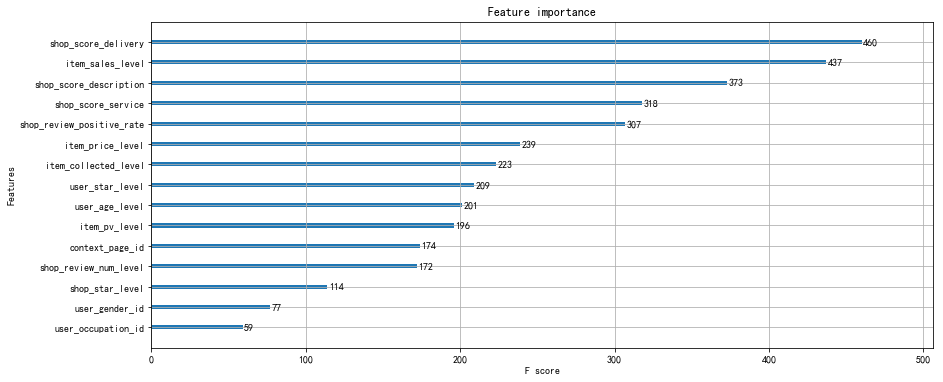

In [234]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 2.0,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

xgbtrain = xgb.DMatrix(x_train, y_train)
xgbval = xgb.DMatrix(x_val)
model = xgb.train(params, xgbtrain, num_boost_round=265)
y_pred = model.predict(xgbval)
y_pred = pd.Series(y_pred, name='val')

print(log_loss(y_val, y_pred))  # 0.0813534669374(46 Features)
xgb.plot_importance(model)

# xgbtest = xgb.DMatrix(x_test)
# y_pred = model.predict(xgbtest)

# idx['predicted_score'] = y_pred
# idx[['instance_id', 'predicted_score']].to_csv(
#     'resultWithoutHistory.txt',
#     sep=' ',
#     header=['instance_id', 'predicted_score'],
#     index=False)

In [ ]:
#33 Features(0.0816401133236/0.08293 )
#46 Features(0.0813534669374/0.08265)

# lgb试一下

In [35]:
import lightgbm as lgb
from sklearn.metrics import log_loss
import gc

In [138]:
df = pd.read_csv('df_without_his.csv')

df.shape
df.head()

(496509, 52)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,context_id,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time,day,hour,user_query_day,user_query_day_hour,shop_score,item_score,item_score2,item_score3,predict_category_property_split,predict_category_split,predict_property_split,item_category_split,item_property_split,item_category_split_count,item_property_split_count,predict_category_property_split_count,pred_category_split_count,pred_property_split_count,item_pred_category_score,item_pred_property_score,item_pred_category_score_item%,item_pred_property_score_item%,item_pred_category_score_pred%,item_pred_property_score_pred%
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,1003,2005,3003,282924576738839389,1537236544,5,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 10:09:04,18,10,3,3,7.0,59,19.666667,3.277778,"['5799347067982556520:-1', '509660095530134768...","['5799347067982556520', '509660095530134768', ...",['9148482949976129397'],"['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,5,5,1,2,0,6.666667,0.000000,3.333333,0.000000
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,1002,2005,3006,4007979028023783431,1537243232,0,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 12:00:32,18,12,8,5,7.0,59,19.666667,19.666667,"['5799347067982556520:9172976955054793469', '7...","['5799347067982556520', '7908382889764677758']","['9172976955054793469', '1787573075717641245,9...","['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,2,2,2,2,1,6.666667,0.434783,6.666667,3.333333
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,1003,2005,3004,4884875192608989870,1537211052,0,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 03:04:12,18,3,2,2,7.0,59,19.666667,19.666667,"['5799347067982556520:5131280576272319091', '7...","['5799347067982556520', '7258015885215914736',...","['5131280576272319091', '5131280576272319091',...","['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,3,3,3,2,1,6.666667,0.434783,5.000000,2.500000
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,1004,2005,3006,840119421106178602,1537222670,15,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,3,1.0,1.0,1.0,0,2018-09-18 06:17:50,18,6,1,1,7.0,59,19.666667,1.229167,"['509660095530134768:-1', '5799347067982556520...","['509660095530134768', '5799347067982556520', ...","['1787573075717641245,9148482949976129397', '9...","['7908382889764677758', '5799347067982556520']","['2072967855524022579', '5131280576272319091',...",2,22,5,5,3,2,0,6.666667,0.000000,3.333333,0.000000
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,1002,2005,3001,173676997171035468

In [139]:
y_train = df[(df.day != 24) & (df.is_trade != -1)][target]
x_train = df[(df.day != 24) & (df.is_trade != -1)][predictors]

y_val = df[(df.day == 24) & (df.is_trade != -1)][target]
x_val = df[(df.day == 24) & (df.is_trade != -1)][predictors]

y_test = df[df.is_trade == -1][target]
x_test = df[df.is_trade == -1][predictors]

x_train.shape
x_val.shape
x_test.shape

del df

(420717, 33)

(57421, 33)

(18371, 33)

In [122]:
#without history
clf = lgb.LGBMClassifier(
    learning_rate=0.07,
    colsample_bytree=1.0,
    num_leaves=50,
    max_depth=5,
    min_child_weight=0.1,
    n_estimators=400,
    n_jobs=20,
    reg_alpha=0.1,
    reg_lambda=0.1)
clf.fit(
    x_train,
    y_train,
    feature_name=predictors,
    categorical_feature=['user_gender_id', 'user_occupation_id'])
y_pred = clf.predict_proba(x_val)[:, 1]
print(log_loss(y_val, y_pred))  # 0.0817086630893
lgb.plot_importance(clf)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.07, max_depth=5, min_child_samples=20,
        min_child_weight=0.1, min_split_gain=0.0, n_estimators=400,
        n_jobs=20, num_leaves=50, objective=None, random_state=None,
        reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

0.081978292469


In [98]:
train = pd.read_csv('train_preprocessing52.csv')

train.shape
train.head()

(139406, 85)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,context_id,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,item_category_split,item_property_split,predict_category_property_split,item_category_split_count,item_property_split_count,time,day,hour,user_query_day,user_query_day_hour,user_shop_count,user_item_count,user_context_count,user_shop_trade_count,user_item_trade_count,user_context_trade_count,user_brand_count,user_city_count,user_brand_trade_count,user_city_trade_count,item_occupation_count,item_age_count,item_gender_count,item_occupation_trade_count,item_age_trade_count,item_gender_trade_count,shop_score,item_score,item_score2,item_score3,predict_category_split,predict_property_split,pred_category_split_count,pred_property_split_count,item_pred_category_score,item_pred_property_score,item_pred_category_score_item%,item_pred_property_score_item%,item_pred_category_score_pred%,item_pred_property_score_pred%,item_hot,user_hot,shop_hot,brand_hot,occupation_hot,city_hot,item_trade_hot,user_trade_hot,shop_trade_hot,brand_trade_hot,occupation_trade_hot,city_trade_hot,user_sell_power,user_sell_power_mean,user_sell_power_mean_item_minus,user_sell_trade_power,user_sell_trade_power_mean,user_sell_trade_power_mean_item_minus
0,1294180558417909525,3417228998968466891,7908382889764677758;5799347067982556520,2636395404473730413;4067341101015777832;101341...,1369755222868145421,5326000431362991708,7,1,4,8,4790424684324799775,0,1003,2002,3006,8843409125615638650,1537712904,0,"5799347067982556520:9172976955054793469,742282...",3011322251466986596,12,0.981125,10,0.974849,0.977525,0.966823,0,"['7908382889764677758', '5799347067982556520']","['2636395404473730413', '4067341101015777832',...","[['5799347067982556520', '9172976955054793469,...",2,14,2018-09-23 22:28:24,23,22,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,20.060442,33,4.714286,4.714286,"['5799347067982556520', '7908382889764677758']","['9172976955054793469,7422828355050797095', '7...",2,2,2,0,6.666667,0.0,6.666667,0.0,1.0,18.0,1.0,1.0,110154,1274,0.0,0.0,0.0,0.0,2306,35,111.0,5.842105,1.157895,0.0,0.0,7.0
1,4988669284857152533,932459418921071956,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;655689...,3101174666276603352,7322157373578955368,8,12,14,18,5297018676355586708,1,1004,2002,3005,5448626819385615379,1537703526,0,5755694407684602296:-1;7908382889764677758:-1;...,6244933171089048032,16,1.000000,15,0.963192,0.960966,0.983802,0,"['7908382889764677758', '5755694407684602296']","['5131280576272319091', '2636395404473730413',...","[['5755694407684602296', '-1'], ['790838288976...",2,49,2018-09-23 19:52:06,23,19,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,79.0,84.0,3.0,3.0,3.0,28.228659,264,33.000000,33.000000,"['5755694407684602296', '7908382889764677758',...",[],4,0,2,0,6.666667,0.0,4.000000,0.0,292.0,0.0,375.0,645.0,110154,43204,7.0,0.0,8.0,17.0,2306,912,0.0,0.000000,8.000000,0.0,0.0,8.0
2,5378282568284173939,932459418921071956,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;655689...,3101174666276603352,7322157373578955368,8,12,14,18,2128349640379796295,0,1005,2005,3002,6454805461923703549,1537699469,0,2948160913626618607:4083958765544089731;264834...,6244933171089048032,16,1.000000,15,0.963192,0.960966,0.983802,0,"['7908382889764677758', '5755694407684602296']","['5131280576272319091', '2636395404473730413',...","[['2948160913626618607', '4083958765544089731'...",2,49,2018-09-23 18:44:29,23,18,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,48.0,193.0,4.0,1.0,4.0,28.228659,264,33.000000,33.000000,"['2948160913626618607', '2648343924459474923',...","['408

In [99]:
test = train[train.is_trade == -1]
val = train[(train.is_trade != -1) & (train.day == 24)]
train = train[(train.is_trade != -1) & (train.day == 23)]

train.shape
val.shape
test.shape

(63614, 85)

(57421, 85)

(18371, 85)

In [100]:
predictors = [
    'item_price_level', 'item_sales_level', 'item_collected_level',
    'item_pv_level', 'user_gender_id', 'user_age_level', 'user_occupation_id',
    'user_star_level', 'context_page_id', 'shop_review_num_level',
    'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
    'shop_score_delivery', 'shop_score_description',
    'item_category_split_count', 'item_property_split_count', 'day', 'hour',
    'user_query_day', 'user_query_day_hour', 'user_shop_count',
    'user_item_count', 'user_context_count', 'user_shop_trade_count',
    'user_item_trade_count', 'user_context_trade_count', 'user_brand_count',
    'user_city_count', 'user_brand_trade_count', 'user_city_trade_count',
    'item_occupation_count', 'item_age_count', 'item_gender_count',
    'item_occupation_trade_count', 'item_age_trade_count',
    'item_gender_trade_count', 'shop_score', 'item_score', 'item_score2',
    'item_score3', 'pred_category_split_count', 'pred_property_split_count',
    'item_pred_category_score', 'item_pred_property_score',
    'item_pred_category_score_item%', 'item_pred_property_score_item%',
    'item_pred_category_score_pred%', 'item_pred_property_score_pred%',
    'item_hot', 'user_hot', 'shop_hot', 'brand_hot', 'occupation_hot',
    'city_hot', 'item_trade_hot', 'user_trade_hot', 'shop_trade_hot',
    'brand_trade_hot', 'occupation_trade_hot', 'city_trade_hot',
    'user_sell_power', 'user_sell_power_mean',
    'user_sell_power_mean_item_minus', 'user_sell_trade_power',
    'user_sell_trade_power_mean', 'user_sell_trade_power_mean_item_minus'
]

target = ['is_trade']

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=5, min_child_samples=20,
        min_child_weight=0.1, min_split_gain=0.0, n_estimators=112,
        n_jobs=20, num_leaves=63, objective=None, random_state=None,
        reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

0.0807316992095


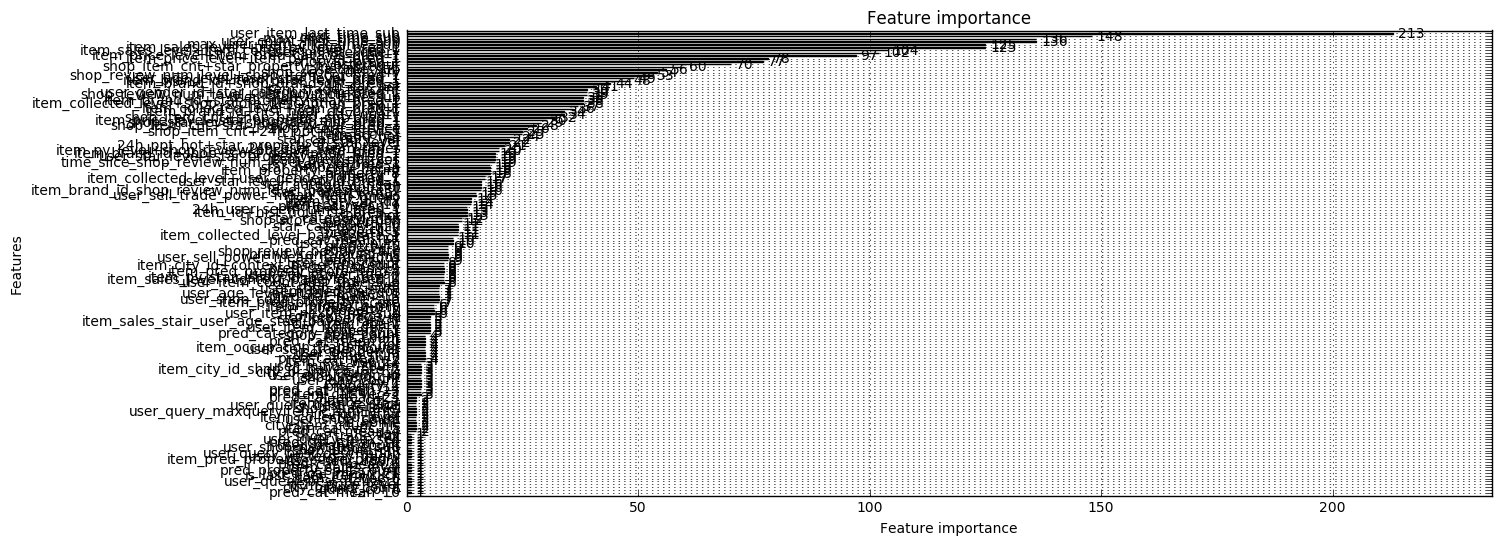

In [22]:
#val
clf = lgb.LGBMClassifier(
    learning_rate=0.05,
    num_leaves=63,
    max_depth=5,
    min_child_weight=0.1,
    n_estimators=112,
    n_jobs=20,
    reg_alpha=0.1,
    reg_lambda=0.1)
clf.fit(
    train[predictors],
    train[target],
    feature_name=predictors,
    categorical_feature=['user_gender_id', 'user_occupation_id', 'day'])
y_val = clf.predict_proba(val[predictors])[:, 1]
print(log_loss(val[target], y_val))  # 0.0824696179375
lgb.plot_importance(clf)

In [90]:
#test
train = pd.concat([train, val])

clf = lgb.LGBMClassifier(
    learning_rate=0.05,
    num_leaves=63,
    max_depth=5,
    min_child_weight=0.1,
    n_estimators=112,
    n_jobs=20,
    reg_alpha=0.1,
    reg_lambda=0.1)
clf.fit(
    train[predictors],
    train[target],
    feature_name=predictors,
    categorical_feature=['user_gender_id', 'user_occupation_id', 'day'])
y_pred = clf.predict_proba(test[predictors])[:, 1]
test['predicted_score'] = y_pred

test[['instance_id', 'predicted_score']].to_csv(
    'resultWithHistory.txt',
    sep=' ',
    header=['instance_id', 'predicted_score'],
    index=None)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=5, min_child_samples=20,
        min_child_weight=0.1, min_split_gain=0.0, n_estimators=112,
        n_jobs=20, num_leaves=63, objective=None, random_state=None,
        reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

# CJF新特征筛选

In [2]:
train_cjf_new = pd.read_csv('df_full_all.csv')

train_cjf_new.shape
train_cjf_new.head()

(278894, 1413)

brand_current_hour_percent  brand_current_hour_query  brand_today_query  \
0                    0.011927                        19               2079   
1                    0.001255                         2                 22   
2                    0.003139                         5                152   
3                    0.002511                         4                 95   
4                    0.008161                        13                574   

   brand_today_query_percent  category_1  category_1_bayes_rate_1  \
0                   0.029202         595                      0.0   
1                   0.000309         904                      0.0   
2                   0.002135         595                      0.0   
3                   0.001334         517                      0.0   
4                   0.008063         589                      0.0   

   category_1_bayes_rate_2  category_1_gender_filled_bayes_rate_1  \
0                      0.0                                    0.0   
1                      0.0                                    0.0   
2                      0.0                                    0.0   
3                      0.0                                    0.0   
4                      0.0                                    0.0   

   category_1_gender_filled_bayes_rate_2  category_1_shop_id_bayes_rate_1  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   
2                                    0.0                              0.0   
3                                    0.0                              0.0   
4                                    0.0                              0.0   

   category_1_shop_id_bayes_rate_2  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   

   category_1_shop_review_num_level_bayes_rate_1  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   category_1_shop_review_num_level_bayes_rate_2  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   category_1_shop_star_level_bayes_rate_1  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   category_1_shop_star_level_bayes_rate_2  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   category_1_user_age_level_bayes_rate_1  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   category_1_user_age_level_bayes_rate_2  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   category_1_user_age_stair_bayes_rate_1  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   category_1_user_

In [3]:
train = pd.read_csv('train_preprocessing34_full.csv')

train.shape
train.head()

(278894, 266)

,user_context_trade_count,user_city_trade_count,user_day_count,user_shop_count,city_item_count_his,shop_item_count_his,user_shop_next_time_sub,user_age_level,city_item_count,shop_star_level,user_trade_hot,user_item_num,shop_trade_hot,user_count,shop_score_delivery,user_item_last_time_sub,city_hot,user_sell_trade_power_mean,is_last_click,user_is_his,is_last_user_item_click,item_hot,user_item_count_first_time_sub,user_sell_power,user_shop_day_num,item_trade_hot,item_sales_level,item_occupation_trade_count,item_gender_count,minute,hour,item_score2,user_minute_query,user_id_idx,item_pred_property_score,brand_item_count_his,user_minute_count,pred_property_split_count,item_occupation_count,user_shop_trade_count,item_brand_id_idx,next_time_sub,user_day_query,user_sell_power_mean_item_minus,yesterday,user_item_trade_count,user_yesterhour_query,brand_is_his,item_pred_category_score,user_brand_count,user_item_count,city_brand_count_his,item_gender_trade_count,user_shop_count_first_time_sub,brand_hot,item_trade_percent,user_is_trade_his,item_collected_level,item_id_idx,user_sell_power_mean,brand_is_trade_his,city_trade_hot,user_gender_id,city_brand_count,item_minute_query,item_is_his,item_pred_property_score_item%,occupation_hot,context_page_id,shop_id_idx,user_context_count,last_time_sub,item_property_split_count,item_hour_query,user_shop_last_time_sub,user_trade_percent,min_time,shop_item_count,user_count_first_time_sub,user_item_day_query,user_sell_trade_power,shop_hot,user_occupation_id,user_brand_trade_count,brand_trade_hot,user_shop_num,user_item_minute_query,item_city_id_idx,day,item_pv_level,user_hot,user_item_next_time_sub,item_category_split_count,shop_score,brand_item_count,user_hour_query,pred_category_split_count,item_score,user_hour_count,brand_trade_percent,item_price_level,item_age_count,user_yesterday_query,shop_score_service,occupation_trade_hot,user_city_count,item_score3,user_item_day_num,item_pred_property_score_pred%,item_is_trade_his,item_pred_category_score_item%,occupation_trade_percent,shop_review_num_level,shop_review_positive_rate,user_sell_trade_power_mean_item_minus,user_item_hour_query,shop_score_description,yesterhour,max_click_time_sub,is_home,item_pred_category_score_pred%,item_age_trade_count,user_star_level,item_day_query,max_user_item_click_time_sub,user_query_maxsell,category_2,property_7,property_1,query_col_6,item_collected_level_bayes_rate_1,item_price_stair,user_query_maxpv,user_query_cheapest,user_occupation_stair,property_5,user_query_best_service,user_age_stair,query_col_5,query_col_1,query_col_0,user_query_maxqueryitem_c_similarity,user_star_stair,item_pv_stair_shop_id_bayes_rate_2,item_sales_stair,property_8,user_query_maxcollect,property_2,user_query_best_description,user_query_maxreview,property_0,property_3,query_col_2,category_1,hour_stair,user_query_best_delivery,query_col_3,user_query_maxshopstar,time_slice_shop_review_num_level_bayes_rate_1,property_6,item_sales_stair_user_age_stair_bayes_rate_1,item_city_id_shop_id_bayes_rate_2,context_page_stair,user_query_maxqueryitem_p_similarity,item_brand_id_shop_review_num_level_bayes_rate_1,gender_filled,query_col_4,property_4,pred_cat_mean_5,pred_cat_mean_14,pred_cat_mean_17,pred_cat_mean_22,shop_item_cnt,item_cat_vec_22,item_cat_vec_2,item_brand_id+hist_hour_ctr_pred_1,item_brand_id+shop_score_description_pred_1,user_gender_id+star_category_min_pred_1,pred_cat_mean_15,item_id_pred_1,item_cat_vec_21,24h_ppt_hot+star_property_max_pred_1,star_category_mean,item_cat_vec_19,item_price_level+item_pred_cat_cos_pred_1,star_property_min,24h_cat_hot,item_cat_vec_5,item_cat_vec_3,item_cat_vec_16,pred_cat_mean_0,star_property_var,shop_review_num_level+shop_item_cnt_pred_1,pred_cat_mean_6,item_pv_level+shop_review_positive_rate_pred_1,item_cat_vec_9,item_sales_level+item_pv_level_pred_1,pred_cat_mean_2,pred_cat_mean_8,item_pred_cat_cos,item_price_level+star_property_min_pred_1,item_pred_ppt_cos,item_cat_vec_10,pred_cat_mean_19,item_cat_vec_13,shop_brand_

In [4]:
cjf_new_features = []
for i in train_cjf_new.columns:
    if 'bayes_rate' in i:
        cjf_new_features.append(i)
cjf_new_features.append('instance_id')
cjf_new_features.append('day')
len(cjf_new_features)

# cjf_features_drop = list((set(cjf_new_features) & set(predictors)) | set(cjf_fea_list))
# cjf_features_drop.remove('day')
# len(cjf_features_drop)
# train = train.drop(cjf_features_drop, axis=1)
# train = pd.concat([train.reset_index(drop=True), train_cjf_new[cjf_new_features].reset_index(drop=True)], axis=1)


# train.shape
# train.head()

1038

In [5]:
full_sub = pd.read_csv('../CJY/input/full_2', usecols=['is_trade', 'instance_id','day_hour'])
full_sub = full_sub[(full_sub.day_hour>='20+16')]
full_sub.reset_index(drop=True, inplace=True)
print(full_sub.shape)

train_flag = ((full_sub.day_hour>='20+16') & (full_sub.day_hour<='24+15')) 
va_flag = ((full_sub.day_hour>='23+16') & (full_sub.day_hour<='24+15'))

test_len = full_sub['is_trade'].isnull().sum()

(278894, 3)


In [6]:
full_sub[train_flag].instance_id.shape
full_sub.iloc[-test_len:,:].instance_id.shape

idx = list(full_sub[train_flag].instance_id) + list(full_sub.iloc[-test_len:,:].instance_id)

(260523,)

(18371,)

In [7]:
train_cjf_new[['instance_id', 'day']].shape
train[['instance_id', 'day']].shape

(278894, 2)

KeyError: "['instance_id'] not in index"

In [8]:
train.day = train.day - 18
train['instance_id'] = idx
# train.instanced_id
train_new = train.merge(train_cjf_new[cjf_new_features], on=['instance_id', 'day'], how='left')

train_new.shape

(278894, 1303)

In [22]:
predictors = list(
    set(zero_fea_list + cjy_fea_list + cjf_fea_list) - set(basics_cols))
predictors = list(set(basics_cols + predictors))
predictors = list(
    set(predictors) -
    set(rubbish_features_zero + rubbish_features_cjf + rubbish_features_cv))
len(predictors)

205

In [23]:
len(predictors)
predictors_new = list(set(predictors) - (set(cjf_new_features) | set(cjf_fea_list)))
len(predictors_new)

205

185

In [9]:
y = train.is_trade

In [10]:
test = train_new[train_new.day == 7]
val = train_new[train_new.day == 6]
train = train_new[(train_new.day != 6) & (train_new.day != 7)]

train.shape
val.shape
test.shape

(203112, 1303)

(57411, 1303)

(18371, 1303)

In [11]:
y_tr = y[:train.shape[0]]
y_val = y[train.shape[0]:train.shape[0] + val.shape[0]]
y_te = y[train.shape[0] + val.shape[0]:]

In [12]:
import sys
sys.path.append('/Users/zero/xgboost/python-package')
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

# feature_performance = {}
object_features = ['datetime', 'item_category_list', 'predict_category_property', 'item_property_list', 'is_trade']
no_features = ['item_brand_id_shop_review_num_level_bayes_rate_1', 'item_collected_level_bayes_rate_1',
              'item_sales_stair_user_age_stair_bayes_rate_1', 'item_pv_stair_shop_id_bayes_rate_2',
              'time_slice_shop_review_num_level_bayes_rate_1', 'item_city_id_shop_id_bayes_rate_2',
              'instance_id']

for i in tqdm(list(set(cjf_new_features) - set(no_features))):
    temp_features = predictors_new.copy()
#     temp_features.append(i)
    temp_features = list(set(temp_features))
#     len(temp_features)
    xgbtrain = xgb.DMatrix(train[temp_features], y_tr)
    xgbval = xgb.DMatrix(val[temp_features])
    model = xgb.train(params, xgbtrain, num_boost_round=100)
    y_pred = model.predict(xgbval)
    y_pred = pd.Series(y_pred, name='val')

    print(str(i) + ':' + str(log_loss(y_val, y_pred)))
#     feature_performance[i] = log_loss(y_val, y_pred)

# np.save('feature_performance.npy', feature_performance)

  0%|          | 1/1031 [00:15<4:25:05, 15.44s/it]

item_collected_level_shop_review_num_level_bayes_rate_2:0.0799253071031


KeyboardInterrupt: 

In [1]:
feature_performance = {'item_collected_level_shop_review_num_level_bayes_rate_2': 0.07973604216684059,
 'property_1_shop_star_level_bayes_rate_1': 0.079810816268101464,
 'hour_stair_property_6_bayes_rate_1': 0.079707347473554124,
 'user_gender_id_bayes_rate_1': 0.079707814064697943,
 'property_9_bayes_rate_2': 0.079707347473554124,
 'hour_shop_id_bayes_rate_1': 0.079651632030096328,
 'item_city_id_user_occupation_stair_bayes_rate_2': 0.079685642484356306,
 'item_price_level_user_gender_id_bayes_rate_1': 0.079674459171790266,
 'property_5_shop_star_level_bayes_rate_1': 0.079707347473554124,
 'item_collected_stair_shop_review_num_level_bayes_rate_2': 0.079750981615144129,
 'context_page_stair_item_brand_id_bayes_rate_2': 0.07980495595616674,
 'hour_stair_item_pv_level_bayes_rate_2': 0.079762735256628164,
 'time_slice_shop_id_bayes_rate_1': 0.079768720997260567,
 'item_sales_level_shop_review_num_level_bayes_rate_2': 0.079892329496358008,
 'property_7_user_age_stair_bayes_rate_1': 0.079810816268101464,
 'hour_stair_user_id_bayes_rate_1': 0.079734126203980904,
 'property_0_shop_id_bayes_rate_1': 0.079779799590319903,
 'item_price_stair_user_age_stair_bayes_rate_2': 0.079747777826990565,
 'item_collected_level_shop_star_level_bayes_rate_2': 0.079815381542092168,
 'property_7_user_gender_id_bayes_rate_2': 0.079779799590319903,
 'context_page_id_item_collected_level_bayes_rate_2': 0.079776515489042327,
 'property_2_shop_review_num_level_bayes_rate_2': 0.079720084230544316,
 'time_slice_category_1_bayes_rate_1': 0.079720084230544316,
 'context_page_stair_gender_filled_bayes_rate_1': 0.079802142392159769,
 'user_star_level_bayes_rate_1': 0.079735001144525156,
 'shop_id_user_occupation_id_bayes_rate_1': 0.079664692046599622,
 'category_2_shop_star_level_bayes_rate_1': 0.079739308445453724,
 'property_9_user_occupation_id_bayes_rate_1': 0.079739308445453724,
 'property_0_user_occupation_stair_bayes_rate_1': 0.079803452684144696,
 'shop_id_user_age_stair_bayes_rate_1': 0.07970136306517972,
 'property_2_user_id_bayes_rate_1': 0.079804020203061529,
 'property_2_user_age_level_bayes_rate_1': 0.079804020203061529,
 'category_2_user_id_bayes_rate_1': 0.079804020203061529,
 'context_page_stair_item_collected_stair_bayes_rate_1': 0.07982263299022864,
 'property_7_user_id_bayes_rate_1': 0.079707347473554124,
 'context_page_id_user_star_level_bayes_rate_1': 0.079851390056955074,
 'shop_star_level_user_age_level_bayes_rate_1': 0.079745254387548231,
 'item_price_level_user_occupation_id_bayes_rate_2': 0.07965054127901057,
 'user_id_bayes_rate_1': 0.079827328736968572,
 'property_9_user_occupation_id_bayes_rate_2': 0.079777456251784076,
 'property_4_user_occupation_stair_bayes_rate_2': 0.079777456251784076,
 'shop_id_user_star_level_bayes_rate_1': 0.079733710220088766,
 'item_collected_level_user_star_level_bayes_rate_2': 0.079781947194266345,
 'item_collected_level_bayes_rate_2': 0.079838690592506395,
 'context_page_id_item_pv_stair_bayes_rate_1': 0.07974372394903316,
 'item_collected_stair_bayes_rate_1': 0.079789100651872447,
 'property_2_user_star_stair_bayes_rate_2': 0.079822821621656381,
 'context_page_id_user_age_level_bayes_rate_1': 0.07976013964853744,
 'hour_bayes_rate_1': 0.079789018670651995,
 'property_8_user_gender_id_bayes_rate_1': 0.079822834680372906,
 'property_2_bayes_rate_1': 0.079822834680372906,
 'item_sales_level_user_occupation_stair_bayes_rate_1': 0.079786928994583214,
 'property_7_user_occupation_stair_bayes_rate_2': 0.079822834680372906,
 'property_5_user_age_level_bayes_rate_2': 0.079822834680372906,
 'hour_stair_user_occupation_id_bayes_rate_1': 0.079855813688392688,
 'context_page_id_item_brand_id_bayes_rate_2': 0.079765814778641447,
 'property_8_user_gender_id_bayes_rate_2': 0.079822834680372906,
 'item_brand_id_user_star_stair_bayes_rate_1': 0.079678824652003377,
 'shop_id_gender_filled_bayes_rate_2': 0.079572901685128164,
 'item_collected_level_shop_review_num_level_bayes_rate_1': 0.079855440797356222,
 'time_slice_property_2_bayes_rate_1': 0.079759762672927351,
 'item_collected_level_shop_star_level_bayes_rate_1': 0.079718178290110867,
 'item_brand_id_user_occupation_id_bayes_rate_1': 0.0796761082320981,
 'item_sales_stair_user_gender_id_bayes_rate_2': 0.079791856570011505,
 'item_collected_stair_user_star_stair_bayes_rate_1': 0.079772137099187013,
 'item_pv_level_bayes_rate_2': 0.079927610130736626,
 'property_5_user_id_bayes_rate_1': 0.079822834680372906,
 'hour_stair_shop_id_bayes_rate_1': 0.079687544524909934,
 'hour_property_4_bayes_rate_2': 0.079822834680372906,
 'shop_star_level_user_occupation_id_bayes_rate_1': 0.079800327566450752,
 'hour_stair_property_9_bayes_rate_2': 0.079822834680372906,
 'context_page_stair_user_age_stair_bayes_rate_1': 0.079699759538673642,
 'property_6_shop_id_bayes_rate_1': 0.079820632377550646,
 'item_pv_level_user_gender_id_bayes_rate_2': 0.079798754902678418,
 'item_price_stair_user_star_level_bayes_rate_1': 0.079774924424809532,
 'item_price_level_user_occupation_stair_bayes_rate_2': 0.079735583984836725,
 'property_6_bayes_rate_2': 0.079820632377550646,
 'property_8_user_star_level_bayes_rate_1': 0.079820632377550646,
 'category_2_user_gender_id_bayes_rate_2': 0.079820632377550646,
 'item_sales_level_bayes_rate_2': 0.079697336508331509,
 'item_city_id_user_occupation_id_bayes_rate_1': 0.079811006800042647,
 'item_collected_level_user_age_stair_bayes_rate_2': 0.079667376792751113,
 'context_page_id_property_9_bayes_rate_1': 0.079820632377550646,
 'property_1_user_id_bayes_rate_1': 0.079820632377550646,
 'item_price_stair_user_gender_id_bayes_rate_2': 0.079783230788225926,
 'property_3_gender_filled_bayes_rate_1': 0.079820632377550646,
 'item_city_id_user_star_level_bayes_rate_1': 0.079780487066527836,
 'hour_stair_user_gender_id_bayes_rate_1': 0.079845930047202279,
 'time_slice_user_age_stair_bayes_rate_1': 0.079819661733231781,
 'hour_property_3_bayes_rate_1': 0.079819060738529596,
 'hour_item_collected_stair_bayes_rate_1': 0.079851494655394789,
 'item_brand_id_user_star_level_bayes_rate_1': 0.079729577837176935,
 'time_slice_item_city_id_bayes_rate_2': 0.07978146463218784,
 'context_page_stair_item_price_level_bayes_rate_1': 0.079695739181203401,
 'context_page_id_item_sales_level_bayes_rate_2': 0.079726398417113972,
 'context_page_stair_user_star_level_bayes_rate_1': 0.079798865236517844,
 'property_6_user_occupation_id_bayes_rate_2': 0.079881628620151815,
 'hour_category_1_bayes_rate_1': 0.079881628620151815,
 'time_slice_property_8_bayes_rate_1': 0.079881628620151815,
 'time_slice_property_5_bayes_rate_2': 0.079881628620151815,
 'item_pv_level_bayes_rate_1': 0.079759521690191834,
 'item_brand_id_shop_id_bayes_rate_2': 0.079613578320716735,
 'user_occupation_id_bayes_rate_1': 0.079758808190190461,
 'context_page_stair_category_1_bayes_rate_2': 0.079809485689667434,
 'context_page_id_item_id_bayes_rate_1': 0.079694928837931681,
 'category_1_user_id_bayes_rate_1': 0.07976677058019839,
 'item_id_shop_id_bayes_rate_2': 0.079486155612827181,
 'time_slice_property_3_bayes_rate_1': 0.07976677058019839,
 'user_age_level_bayes_rate_2': 0.079654513386124851,
 'property_8_shop_id_bayes_rate_2': 0.07976677058019839,
 'property_3_user_age_stair_bayes_rate_2': 0.07976677058019839,
 'item_city_id_user_age_stair_bayes_rate_1': 0.079764715740303957,
 'item_collected_level_user_age_level_bayes_rate_2': 0.079795406401438812,
 'item_price_stair_shop_id_bayes_rate_1': 0.07963494775051265,
 'property_6_user_star_stair_bayes_rate_2': 0.079842271126093739,
 'property_7_user_id_bayes_rate_2': 0.079820632377550646,
 'shop_star_level_user_star_level_bayes_rate_2': 0.079798999332003781,
 'item_sales_level_user_age_stair_bayes_rate_2': 0.079703328366590984,
 'property_1_user_gender_id_bayes_rate_1': 0.079798312705923136,
 'item_id_user_star_stair_bayes_rate_2': 0.079570911048949838,
 'item_city_id_user_age_level_bayes_rate_2': 0.079762802283201387,
 'context_page_id_property_5_bayes_rate_1': 0.079798312705923136,
 'context_page_id_item_pv_level_bayes_rate_1': 0.079737635110267033,
 'category_1_user_id_bayes_rate_2': 0.079864242387060191,
 'property_1_user_age_stair_bayes_rate_2': 0.079720084230544316,
 'item_pv_stair_user_age_stair_bayes_rate_1': 0.079786663677261657,
 'property_5_user_gender_id_bayes_rate_1': 0.079813141678014649,
 'property_9_user_age_level_bayes_rate_1': 0.079759296323065845,
 'item_price_stair_user_age_stair_bayes_rate_1': 0.079814139486324293,
 'shop_review_num_level_gender_filled_bayes_rate_1': 0.079749369658306063,
 'item_brand_id_gender_filled_bayes_rate_1': 0.079629630051731265,
 'item_brand_id_user_occupation_stair_bayes_rate_2': 0.0797887932338808,
 'item_collected_stair_user_occupation_id_bayes_rate_1': 0.079740114250644867,
 'context_page_stair_category_1_bayes_rate_1': 0.07975874784321374,
 'property_4_user_occupation_id_bayes_rate_2': 0.079749633887381294,
 'property_9_bayes_rate_1': 0.079749633887381294,
 'property_2_bayes_rate_2': 0.079749633887381294,
 'property_8_user_occupation_stair_bayes_rate_1': 0.079803452684144696,
 'user_star_stair_bayes_rate_2': 0.079781413943308968,
 'item_pv_level_gender_filled_bayes_rate_1': 0.079838348772030096,
 'item_pv_level_user_star_stair_bayes_rate_2': 0.079704889800041187,
 'property_1_user_gender_id_bayes_rate_2': 0.07976677058019839,
 'property_2_shop_id_bayes_rate_2': 0.079814789283004228,
 'hour_stair_shop_star_level_bayes_rate_1': 0.079819775275827967,
 'context_page_id_user_gender_id_bayes_rate_1': 0.079798747981521798,
 'hour_shop_star_level_bayes_rate_1': 0.079768118203040222,
 'hour_stair_property_4_bayes_rate_2': 0.079807898670965938,
 'property_4_user_gender_id_bayes_rate_1': 0.0798261064391525,
 'hour_category_1_bayes_rate_2': 0.0798261064391525,
 'item_sales_stair_user_star_stair_bayes_rate_2': 0.079759847729476377,
 'item_sales_stair_gender_filled_bayes_rate_1': 0.079705592742999265,
 'item_brand_id_user_age_level_bayes_rate_1': 0.079736447597598945,
 'item_brand_id_shop_star_level_bayes_rate_2': 0.079662449835779345,
 'item_pv_stair_user_occupation_stair_bayes_rate_1': 0.079770697493526554,
 'property_3_bayes_rate_2': 0.079758168390689221,
 'time_slice_item_price_level_bayes_rate_2': 0.079839640218971761,
 'hour_stair_item_brand_id_bayes_rate_2': 0.079756735825865385,
 'item_city_id_bayes_rate_2': 0.079641263158805459,
 'item_sales_level_user_star_level_bayes_rate_1': 0.079644943726650708,
 'hour_property_0_bayes_rate_2': 0.079759269770468919,
 'context_page_stair_property_0_bayes_rate_2': 0.079759296323065845,
 'property_2_shop_star_level_bayes_rate_2': 0.079693221336923428,
 'property_3_shop_id_bayes_rate_1': 0.079759296323065845,
 'context_page_id_category_1_bayes_rate_1': 0.079759296323065845,
 'item_id_bayes_rate_1': 0.079666005642359761,
 'category_2_user_star_level_bayes_rate_1': 0.079759296323065845,
 'shop_star_level_gender_filled_bayes_rate_2': 0.079734428976266966,
 'item_sales_stair_user_occupation_stair_bayes_rate_2': 0.0798044794558041,
 'property_4_bayes_rate_2': 0.079791643555725031,
 'category_2_gender_filled_bayes_rate_1': 0.079759296323065845,
 'context_page_id_item_id_bayes_rate_2': 0.079803753187748364,
 'property_9_user_star_stair_bayes_rate_1': 0.079759296323065845,
 'shop_star_level_user_id_bayes_rate_2': 0.079849739054952171,
 'property_6_user_age_stair_bayes_rate_1': 0.079759296323065845,
 'item_sales_stair_bayes_rate_2': 0.079776122128073529,
 'hour_property_9_bayes_rate_2': 0.079759296323065845,
 'hour_item_price_stair_bayes_rate_1': 0.07988073120179226,
 'hour_item_collected_level_bayes_rate_1': 0.079724796005592166,
 'context_page_id_item_city_id_bayes_rate_2': 0.079753631300071112,
 'shop_star_level_user_occupation_stair_bayes_rate_1': 0.079774969331579404,
 'category_1_user_star_stair_bayes_rate_1': 0.079803452684144696,
 'item_sales_level_shop_id_bayes_rate_2': 0.079649388084377298,
 'property_4_user_id_bayes_rate_2': 0.07975213656883276,
 'item_id_gender_filled_bayes_rate_1': 0.079577798499646329,
 'property_6_gender_filled_bayes_rate_1': 0.079759762672927351,
 'hour_stair_property_7_bayes_rate_2': 0.079763438909474155,
 'item_city_id_shop_star_level_bayes_rate_2': 0.079782432886224025,
 'hour_stair_item_pv_stair_bayes_rate_2': 0.079844175888714022,
 'context_page_id_item_price_level_bayes_rate_1': 0.07970546872653618,
 'hour_user_id_bayes_rate_2': 0.07975874784321374,
 'context_page_stair_user_id_bayes_rate_1': 0.079751230854238533,
 'property_3_bayes_rate_1': 0.07975874784321374,
 'property_4_user_age_stair_bayes_rate_2': 0.07975874784321374,
 'context_page_stair_user_gender_id_bayes_rate_2': 0.079792977134525656,
 'shop_id_user_star_stair_bayes_rate_1': 0.079664151922768447,
 'property_2_user_gender_id_bayes_rate_2': 0.079693221336923428,
 'category_2_shop_review_num_level_bayes_rate_1': 0.07975213656883276,
 'user_star_stair_bayes_rate_1': 0.079790975078645229,
 'context_page_stair_property_5_bayes_rate_2': 0.07975213656883276,
 'property_6_user_star_level_bayes_rate_1': 0.07975213656883276,
 'context_page_stair_property_8_bayes_rate_2': 0.079804020203061529,
 'item_collected_level_shop_id_bayes_rate_1': 0.0796260344861075,
 'context_page_stair_property_6_bayes_rate_2': 0.07975213656883276,
 'property_3_gender_filled_bayes_rate_2': 0.07975213656883276,
 'property_4_user_star_stair_bayes_rate_1': 0.07975213656883276,
 'gender_filled_bayes_rate_1': 0.07969690208845065,
 'context_page_stair_item_pv_stair_bayes_rate_2': 0.079791547498695589,
 'category_2_user_occupation_id_bayes_rate_1': 0.07975213656883276,
 'hour_stair_item_price_stair_bayes_rate_2': 0.079739718539473953,
 'property_4_shop_star_level_bayes_rate_2': 0.07975213656883276,
 'user_id_bayes_rate_2': 0.079740736598469211,
 'time_slice_item_price_level_bayes_rate_1': 0.079733853343696356,
 'item_id_user_star_stair_bayes_rate_1': 0.079488323917324327,
 'shop_id_user_age_stair_bayes_rate_2': 0.079664574636160085,
 'shop_star_level_user_star_stair_bayes_rate_1': 0.079717939553632822,
 'property_9_shop_id_bayes_rate_2': 0.079812040336022128,
 'hour_item_pv_level_bayes_rate_2': 0.079611932006831906,
 'item_id_shop_star_level_bayes_rate_2': 0.079560997181024315,
 'property_2_user_id_bayes_rate_2': 0.079807767790202391,
 'item_pv_level_shop_star_level_bayes_rate_1': 0.079976496927310098,
 'hour_stair_user_age_level_bayes_rate_2': 0.079715807109945733,
 'user_occupation_id_bayes_rate_2': 0.079728737783644824,
 'context_page_stair_item_brand_id_bayes_rate_1': 0.079724302721109155,
 'time_slice_item_sales_stair_bayes_rate_2': 0.079802806900551998,
 'hour_item_collected_stair_bayes_rate_2': 0.079853284455725204,
 'property_9_shop_id_bayes_rate_1': 0.079864242387060191,
 'category_1_user_occupation_id_bayes_rate_2': 0.079787941211005922,
 'hour_stair_item_collected_level_bayes_rate_1': 0.079758742390857909,
 'property_3_shop_star_level_bayes_rate_2': 0.079807767790202391,
 'shop_review_num_level_user_age_stair_bayes_rate_1': 0.079776611147293883,
 'context_page_stair_gender_filled_bayes_rate_2': 0.079767612628254603,
 'hour_stair_item_brand_id_bayes_rate_1': 0.07973553320111984,
 'hour_property_2_bayes_rate_2': 0.079759296323065845,
 'context_page_stair_item_pv_level_bayes_rate_1': 0.079835439579303766,
 'hour_item_pv_level_bayes_rate_1': 0.079645772485422733,
 'property_0_user_occupation_id_bayes_rate_1': 0.079793114923362746,
 'context_page_stair_property_7_bayes_rate_1': 0.079793114923362746,
 'hour_stair_item_sales_stair_bayes_rate_2': 0.079796840757443699,
 'property_4_gender_filled_bayes_rate_1': 0.079604688683591066,
 'property_7_bayes_rate_1': 0.079604688683591066,
 'item_sales_level_user_age_stair_bayes_rate_1': 0.079620794401579958,
 'shop_review_num_level_user_gender_id_bayes_rate_2': 0.079828893677009821,
 'property_0_user_age_level_bayes_rate_2': 0.079604688683591066,
 'context_page_id_user_occupation_id_bayes_rate_1': 0.079716883733044377,
 'item_brand_id_shop_id_bayes_rate_1': 0.079512071404806775,
 'hour_stair_item_sales_stair_bayes_rate_1': 0.079751459823564144,
 'context_page_id_property_7_bayes_rate_2': 0.079572628042765686,
 'property_2_user_star_stair_bayes_rate_1': 0.079572628042765686,
 'hour_property_9_bayes_rate_1': 0.079813141678014649,
 'item_collected_stair_shop_star_level_bayes_rate_2': 0.079659119816765281,
 'property_3_user_id_bayes_rate_1': 0.079627266846529723,
 'context_page_stair_user_star_stair_bayes_rate_1': 0.079781513499374068,
 'shop_review_num_level_user_age_level_bayes_rate_1': 0.079715801613914131,
 'time_slice_category_2_bayes_rate_1': 0.079620322680221289,
 'item_collected_stair_user_gender_id_bayes_rate_2': 0.079734141322403654,
 'context_page_id_shop_review_num_level_bayes_rate_2': 0.079729526342260187,
 'hour_stair_property_0_bayes_rate_1': 0.079810816268101464,
 'hour_stair_item_collected_level_bayes_rate_2': 0.079776857301044654,
 'context_page_id_user_star_stair_bayes_rate_1': 0.079746784676110974,
 'context_page_stair_property_1_bayes_rate_2': 0.079707347473554124,
 'shop_id_bayes_rate_2': 0.079650639877278745,
 'property_8_gender_filled_bayes_rate_1': 0.079707347473554124,
 'category_1_shop_review_num_level_bayes_rate_1': 0.079707347473554124,
 'hour_stair_category_2_bayes_rate_2': 0.079707347473554124,
 'item_sales_stair_shop_star_level_bayes_rate_1': 0.079737382870187543,
 'item_brand_id_bayes_rate_2': 0.079682767561100112,
 'property_7_shop_star_level_bayes_rate_1': 0.079732197312341074,
 'property_3_shop_review_num_level_bayes_rate_2': 0.079732197312341074,
 'context_page_id_shop_id_bayes_rate_2': 0.07983575903918308,
 'property_7_user_occupation_id_bayes_rate_2': 0.079864242387060191,
 'context_page_stair_shop_review_num_level_bayes_rate_1': 0.079776902843869915,
 'context_page_id_property_2_bayes_rate_2': 0.079779799590319903,
 'hour_shop_review_num_level_bayes_rate_1': 0.079814707396212159,
 'context_page_id_gender_filled_bayes_rate_2': 0.07963443243528924,
 'shop_review_num_level_user_age_level_bayes_rate_2': 0.079802210655017428,
 'item_pv_level_user_occupation_stair_bayes_rate_2': 0.07980411019821694,
 'property_0_gender_filled_bayes_rate_2': 0.079779799590319903,
 'context_page_stair_item_city_id_bayes_rate_1': 0.079745657446295984,
 'hour_stair_user_occupation_stair_bayes_rate_2': 0.079669965247318925,
 'item_sales_level_shop_star_level_bayes_rate_2': 0.079818177609377719,
 'item_id_shop_review_num_level_bayes_rate_2': 0.079724514879081665,
 'context_page_id_shop_star_level_bayes_rate_1': 0.07973652833175339,
 'property_8_shop_star_level_bayes_rate_2': 0.079735171659594817,
 'time_slice_user_star_level_bayes_rate_1': 0.079828729423584349,
 'property_9_shop_star_level_bayes_rate_2': 0.079739308445453724,
 'item_pv_stair_user_age_level_bayes_rate_2': 0.079762444739652785,
 'context_page_stair_item_price_stair_bayes_rate_1': 0.079785423496082392,
 'time_slice_user_star_stair_bayes_rate_1': 0.079970461539049936,
 'property_0_bayes_rate_1': 0.079803452684144696,
 'property_5_user_star_stair_bayes_rate_2': 0.079789100651872447,
 'property_4_user_gender_id_bayes_rate_2': 0.079804020203061529,
 'context_page_stair_user_star_stair_bayes_rate_2': 0.079788981429570818,
 'item_brand_id_shop_review_num_level_bayes_rate_2': 0.079698038147270084,
 'time_slice_property_0_bayes_rate_2': 0.079789100651872447,
 'property_2_shop_review_num_level_bayes_rate_1': 0.079776385370123812,
 'category_2_user_age_level_bayes_rate_1': 0.079776551152750758,
 'item_collected_stair_user_age_stair_bayes_rate_2': 0.079791704915937428,
 'property_7_shop_star_level_bayes_rate_2': 0.079822834680372906,
 'item_sales_level_gender_filled_bayes_rate_1': 0.079695186746673474,
 'hour_stair_property_5_bayes_rate_1': 0.079777456251784076,
 'property_2_user_age_level_bayes_rate_2': 0.079777456251784076,
 'day': 0.079777456251784076,
 'property_0_user_age_stair_bayes_rate_1': 0.079789100651872447,
 'item_price_stair_user_id_bayes_rate_1': 0.079761387351351798,
 'category_1_user_occupation_stair_bayes_rate_2': 0.079789100651872447,
 'item_id_user_star_level_bayes_rate_2': 0.079799341300856835,
 'context_page_stair_shop_review_num_level_bayes_rate_2': 0.079820865687763948,
 'property_2_user_gender_id_bayes_rate_1': 0.079789100651872447,
 'time_slice_item_sales_stair_bayes_rate_1': 0.079675219989686435,
 'hour_stair_item_price_level_bayes_rate_2': 0.079723901098596464,
 'context_page_id_property_5_bayes_rate_2': 0.079822834680372906,
 'item_collected_level_user_age_level_bayes_rate_1': 0.079814842294990376,
 'context_page_stair_property_6_bayes_rate_1': 0.079822834680372906,
 'item_sales_level_user_id_bayes_rate_2': 0.079825776372947396,
 'hour_item_price_level_bayes_rate_2': 0.079887465466104673,
 'item_price_level_shop_review_num_level_bayes_rate_1': 0.079718228985022302,
 'property_9_gender_filled_bayes_rate_1': 0.079822834680372906,
 'property_3_user_occupation_stair_bayes_rate_1': 0.079822834680372906,
 'hour_stair_property_2_bayes_rate_1': 0.079822834680372906,
 'hour_stair_user_age_stair_bayes_rate_2': 0.079899271278223688,
 'property_7_user_age_level_bayes_rate_1': 0.079777456251784076,
 'property_2_user_star_level_bayes_rate_2': 0.079822834680372906,
 'hour_item_id_bayes_rate_2': 0.079760166085416598,
 'item_collected_stair_user_age_level_bayes_rate_2': 0.079794557043818021,
 'item_price_level_shop_review_num_level_bayes_rate_2': 0.079754091503914951,
 'gender_filled_bayes_rate_2': 0.079811432224381737,
 'item_price_stair_bayes_rate_1': 0.07982333908276755,
 'item_city_id_user_age_stair_bayes_rate_2': 0.079798093047852292,
 'item_pv_stair_user_star_stair_bayes_rate_2': 0.079781448387303749,
 'item_pv_level_gender_filled_bayes_rate_2': 0.079799170796783683,
 'shop_star_level_user_occupation_stair_bayes_rate_2': 0.079767818280094743,
 'property_8_user_occupation_id_bayes_rate_1': 0.079749633887381294,
 'category_2_user_occupation_stair_bayes_rate_1': 0.079820632377550646,
 'hour_item_sales_stair_bayes_rate_2': 0.0798497840240288,
 'hour_property_7_bayes_rate_2': 0.079820632377550646,
 'hour_stair_shop_star_level_bayes_rate_2': 0.079685893323489701,
 'time_slice_item_id_bayes_rate_2': 0.07972674670303781,
 'hour_item_price_level_bayes_rate_1': 0.079849014255543124,
 'property_5_shop_id_bayes_rate_2': 0.079820632377550646,
 'property_9_user_id_bayes_rate_1': 0.079820632377550646,
 'property_1_user_occupation_stair_bayes_rate_1': 0.079804020203061529,
 'item_collected_level_gender_filled_bayes_rate_1': 0.079750218789872956,
 'item_id_shop_star_level_bayes_rate_1': 0.079646876209140821,
 'item_price_level_shop_star_level_bayes_rate_1': 0.079748675976665281,
 'hour_stair_property_9_bayes_rate_1': 0.079820632377550646,
 'item_pv_stair_user_gender_id_bayes_rate_2': 0.079863322778507898,
 'shop_review_num_level_user_star_stair_bayes_rate_1': 0.079736801485686973,
 'item_city_id_shop_id_bayes_rate_1': 0.079554922659073712,
 'item_sales_stair_shop_review_num_level_bayes_rate_2': 0.079725646045975609,
 'item_id_shop_id_bayes_rate_1': 0.079599499685858485,
 'property_1_shop_id_bayes_rate_2': 0.079822834680372906,
 'property_7_user_gender_id_bayes_rate_1': 0.079819060738529596,
 'hour_stair_item_pv_stair_bayes_rate_1': 0.079812423417871453,
 'item_brand_id_user_age_stair_bayes_rate_1': 0.079641839823092683,
 'hour_stair_user_gender_id_bayes_rate_2': 0.079739349260279063,
 'context_page_stair_bayes_rate_2': 0.079768925345671274,
 'property_1_user_occupation_stair_bayes_rate_2': 0.079881628620151815,
 'context_page_id_user_age_level_bayes_rate_2': 0.079721210128912409,
 'item_city_id_user_star_level_bayes_rate_2': 0.079822164109218496,
 'property_2_gender_filled_bayes_rate_2': 0.079881628620151815,
 'property_1_shop_review_num_level_bayes_rate_2': 0.079814789283004228,
 'context_page_id_item_collected_level_bayes_rate_1': 0.079796546622665152,
 'hour_stair_item_price_level_bayes_rate_1': 0.079788946673780642,
 'item_sales_level_shop_star_level_bayes_rate_1': 0.079775025593948015,
 'item_sales_stair_user_star_level_bayes_rate_2': 0.079731207954900504,
 'context_page_stair_shop_id_bayes_rate_1': 0.079813355587525642,
 'item_collected_stair_user_occupation_stair_bayes_rate_1': 0.079822505234674379,
 'category_2_shop_review_num_level_bayes_rate_2': 0.079809485689667434,
 'item_price_stair_gender_filled_bayes_rate_2': 0.079883422308100221,
 'item_price_level_shop_id_bayes_rate_1': 0.079617132076395425,
 'hour_property_2_bayes_rate_1': 0.07976677058019839,
 'time_slice_user_gender_id_bayes_rate_1': 0.079824897001223666,
 'property_6_shop_review_num_level_bayes_rate_2': 0.07976677058019839,
 'context_page_id_property_3_bayes_rate_1': 0.079787941211005922,
 'item_pv_stair_user_star_stair_bayes_rate_1': 0.079759203476867546,
 'item_collected_level_user_occupation_id_bayes_rate_1': 0.079793534554622694,
 'property_3_user_gender_id_bayes_rate_2': 0.079807900953205876,
 'shop_review_num_level_bayes_rate_1': 0.079847122066703274,
 'time_slice_bayes_rate_1': 0.07978000929826809,
 'item_price_stair_user_star_level_bayes_rate_2': 0.079656141706849759,
 'shop_star_level_user_age_stair_bayes_rate_2': 0.079803567352498592,
 'item_pv_stair_user_occupation_id_bayes_rate_1': 0.079827363978235227,
 'property_6_shop_id_bayes_rate_2': 0.079798312705923136,
 'hour_user_star_level_bayes_rate_2': 0.079771467378930441,
 'hour_stair_user_id_bayes_rate_2': 0.079853322032847632,
 'category_2_user_age_stair_bayes_rate_1': 0.079864242387060191,
 'property_6_user_age_level_bayes_rate_2': 0.079864242387060191,
 'item_collected_level_user_id_bayes_rate_2': 0.079748694943795481,
 'property_8_user_age_stair_bayes_rate_2': 0.079759762672927351,
 'item_pv_level_user_age_stair_bayes_rate_1': 0.07965677380064258,
 'property_1_shop_star_level_bayes_rate_2': 0.079813141678014649,
 'item_price_level_bayes_rate_2': 0.079832549534623751,
 'hour_stair_property_1_bayes_rate_2': 0.079813141678014649,
 'shop_star_level_user_gender_id_bayes_rate_2': 0.079799858803634272,
 'item_city_id_shop_review_num_level_bayes_rate_2': 0.079709917369218952,
 'property_7_gender_filled_bayes_rate_1': 0.079791643555725031,
 'property_0_shop_id_bayes_rate_2': 0.079791643555725031,
 'category_1_user_gender_id_bayes_rate_2': 0.07976677058019839,
 'hour_stair_property_2_bayes_rate_2': 0.079791643555725031,
 'item_price_stair_user_age_level_bayes_rate_2': 0.079743405439663018,
 'property_4_bayes_rate_1': 0.079793163240133691,
 'hour_item_city_id_bayes_rate_2': 0.079930733877752749,
 'item_pv_stair_gender_filled_bayes_rate_2': 0.079727145617222883,
 'hour_stair_item_city_id_bayes_rate_1': 0.079795714535427983,
 'category_1_user_star_stair_bayes_rate_2': 0.079749633887381294,
 'property_9_user_id_bayes_rate_2': 0.079749633887381294,
 'item_collected_stair_bayes_rate_2': 0.079786732294414395,
 'shop_star_level_user_id_bayes_rate_1': 0.079853166437756695,
 'category_1_user_star_level_bayes_rate_2': 0.079814789283004228,
 'item_id_user_age_level_bayes_rate_2': 0.079828310475005937,
 'item_sales_stair_user_occupation_id_bayes_rate_1': 0.079744165060151834,
 'item_sales_level_user_occupation_id_bayes_rate_2': 0.079770046077095855,
 'hour_shop_star_level_bayes_rate_2': 0.079763269028681541,
 'property_3_user_gender_id_bayes_rate_1': 0.0798261064391525,
 'context_page_stair_bayes_rate_1': 0.079759442116384513,
 'property_3_user_star_stair_bayes_rate_1': 0.079756818692289205,
 'item_id_user_age_level_bayes_rate_1': 0.079758869465957102,
 'property_4_user_id_bayes_rate_1': 0.079758168390689221,
 'category_1_user_occupation_stair_bayes_rate_1': 0.079758168390689221,
 'hour_stair_item_collected_stair_bayes_rate_1': 0.079710578032328602,
 'context_page_id_property_9_bayes_rate_2': 0.079758168390689221,
 'shop_star_level_user_star_stair_bayes_rate_2': 0.079710637002128562,
 'property_4_shop_id_bayes_rate_2': 0.079758168390689221,
 'property_5_user_star_level_bayes_rate_1': 0.079753900036589609,
 'category_2_user_star_stair_bayes_rate_2': 0.079759269770468919,
 'property_8_bayes_rate_2': 0.079759269770468919,
 'item_sales_stair_bayes_rate_1': 0.079766379240390262,
 'hour_user_occupation_stair_bayes_rate_1': 0.079681874578973189,
 'item_pv_stair_user_occupation_id_bayes_rate_2': 0.079679454407904582,
 'time_slice_item_pv_level_bayes_rate_1': 0.079694229961307608,
 'item_brand_id_shop_star_level_bayes_rate_1': 0.079740448225532279,
 'property_7_shop_review_num_level_bayes_rate_2': 0.079759296323065845,
 'item_pv_stair_user_id_bayes_rate_1': 0.079695387610390828,
 'context_page_stair_user_gender_id_bayes_rate_1': 0.079771654223165733,
 'item_pv_level_user_occupation_stair_bayes_rate_1': 0.079792922831367838,
 'category_1_gender_filled_bayes_rate_2': 0.079759296323065845,
 'category_1_user_star_level_bayes_rate_1': 0.079759296323065845,
 'item_pv_level_user_id_bayes_rate_2': 0.079739517649379588,
 'property_9_user_gender_id_bayes_rate_1': 0.079789100651872447,
 'property_6_user_gender_id_bayes_rate_1': 0.079759296323065845,
 'property_9_user_occupation_stair_bayes_rate_1': 0.079759296323065845,
 'property_5_user_id_bayes_rate_2': 0.079759296323065845,
 'property_0_user_star_stair_bayes_rate_2': 0.079759296323065845,
 'property_6_shop_star_level_bayes_rate_2': 0.079739308445453724,
 'context_page_stair_item_collected_stair_bayes_rate_2': 0.079802293046930844,
 'item_pv_level_user_id_bayes_rate_1': 0.079740756761829651,
 'item_pv_stair_user_star_level_bayes_rate_1': 0.079828574535179497,
 'item_brand_id_user_star_stair_bayes_rate_2': 0.079750182151942822,
 'context_page_stair_shop_star_level_bayes_rate_1': 0.079835774935105089,
 'time_slice_item_price_stair_bayes_rate_2': 0.079903018937718839,
 'item_price_stair_user_gender_id_bayes_rate_1': 0.0797431865872468,
 'property_0_user_star_level_bayes_rate_2': 0.079763438909474155,
 'context_page_id_category_2_bayes_rate_2': 0.079763438909474155,
 'shop_id_user_occupation_id_bayes_rate_2': 0.079762186278163796,
 'item_pv_level_user_star_level_bayes_rate_2': 0.079739571399078474,
 'context_page_id_item_city_id_bayes_rate_1': 0.079794877551070231,
 'property_2_user_occupation_stair_bayes_rate_1': 0.079809485689667434,
 'item_collected_stair_user_star_level_bayes_rate_2': 0.079792974807888065,
 'item_price_stair_gender_filled_bayes_rate_1': 0.079757284050366625,
 'property_6_user_star_level_bayes_rate_2': 0.0798261064391525,
 'item_sales_stair_user_star_level_bayes_rate_1': 0.079749465712571674,
 'item_id_user_occupation_id_bayes_rate_1': 0.079617217522676545,
 'item_sales_stair_user_occupation_stair_bayes_rate_1': 0.0798044794558041,
 'item_price_level_user_gender_id_bayes_rate_2': 0.079741194249420819,
 'category_2_user_id_bayes_rate_2': 0.07975213656883276,
 'context_page_stair_item_price_level_bayes_rate_2': 0.079663666334597247,
 'property_3_user_star_level_bayes_rate_1': 0.07975213656883276,
 'property_8_shop_review_num_level_bayes_rate_1': 0.07975213656883276,
 'hour_stair_item_id_bayes_rate_1': 0.079771161800433088,
 'shop_star_level_user_gender_id_bayes_rate_1': 0.079762069922427487,
 'property_5_user_star_stair_bayes_rate_1': 0.079707347473554124,
 'item_price_stair_user_age_level_bayes_rate_1': 0.079696861227639929,
 'property_0_shop_review_num_level_bayes_rate_2': 0.07975213656883276,
 'context_page_id_item_collected_stair_bayes_rate_1': 0.079722512284058245,
 'item_id_user_gender_id_bayes_rate_2': 0.079691429487508153,
 'context_page_id_user_occupation_id_bayes_rate_2': 0.079679564058583924,
 'property_4_user_occupation_id_bayes_rate_1': 0.07975213656883276,
 'time_slice_item_pv_stair_bayes_rate_2': 0.0796881422023199,
 'property_7_shop_review_num_level_bayes_rate_1': 0.079812008459870201,
 'property_2_shop_star_level_bayes_rate_1': 0.079812008459870201,
 'property_8_user_occupation_stair_bayes_rate_2': 0.079812008459870201,
 'category_1_user_age_level_bayes_rate_1': 0.079812040336022128,
 'shop_review_num_level_user_gender_id_bayes_rate_1': 0.079743897097330568,
 'property_5_user_occupation_id_bayes_rate_1': 0.079807767790202391,
 'user_star_level_bayes_rate_2': 0.079775954326114937,
 'property_2_gender_filled_bayes_rate_1': 0.079807767790202391,
 'item_pv_level_user_occupation_id_bayes_rate_2': 0.079831435899788861,
 'context_page_stair_property_2_bayes_rate_2': 0.079807767790202391,
 'context_page_stair_property_3_bayes_rate_1': 0.079807767790202391,
 'property_1_shop_review_num_level_bayes_rate_1': 0.079874599039789343,
 'hour_stair_item_pv_level_bayes_rate_1': 0.079658954666807377,
 'item_id_user_occupation_id_bayes_rate_2': 0.079705441710624089,
 'context_page_stair_category_2_bayes_rate_2': 0.079874599039789343,
 'shop_star_level_bayes_rate_2': 0.07990433549751029,
 'hour_property_6_bayes_rate_2': 0.079874599039789343,
 'context_page_id_bayes_rate_2': 0.079823082114675981,
 'context_page_id_item_collected_stair_bayes_rate_2': 0.079774979877465999,
 'item_pv_stair_bayes_rate_2': 0.079771501129723699,
 'property_4_user_age_level_bayes_rate_2': 0.079881628620151815,
 'time_slice_item_brand_id_bayes_rate_2': 0.079727015655706654,
 'item_pv_stair_user_star_level_bayes_rate_2': 0.079619316619008035,
 'property_1_gender_filled_bayes_rate_1': 0.079820632377550646,
 'property_5_user_occupation_id_bayes_rate_2': 0.079787941211005922,
 'category_1_user_age_stair_bayes_rate_1': 0.079787941211005922,
 'shop_star_level_bayes_rate_1': 0.079786736260670676,
 'item_brand_id_bayes_rate_1': 0.079666402298057992,
 'item_price_level_user_star_stair_bayes_rate_1': 0.079740719352152989,
 'context_page_stair_user_occupation_stair_bayes_rate_1': 0.079789507350657693,
 'shop_review_num_level_user_occupation_id_bayes_rate_2': 0.079760912527182426,
 'item_pv_stair_shop_review_num_level_bayes_rate_1': 0.079796818960194998,
 'item_pv_stair_user_age_level_bayes_rate_1': 0.079705222160153924,
 'property_5_user_gender_id_bayes_rate_2': 0.079820632377550646,
 'item_sales_stair_user_age_level_bayes_rate_2': 0.079642135136681058,
 'property_6_user_occupation_id_bayes_rate_1': 0.079604688683591066,
 'time_slice_shop_star_level_bayes_rate_1': 0.079709619098670054,
 'hour_user_star_stair_bayes_rate_1': 0.079792558826157517,
 'property_9_user_age_stair_bayes_rate_1': 0.079604688683591066,
 'property_7_user_star_level_bayes_rate_2': 0.079604688683591066,
 'hour_shop_review_num_level_bayes_rate_2': 0.079686901871374866,
 'hour_stair_property_1_bayes_rate_1': 0.079759296323065845,
 'property_6_user_gender_id_bayes_rate_2': 0.079572628042765686,
 'item_city_id_user_id_bayes_rate_1': 0.079627059042718579,
 'property_6_gender_filled_bayes_rate_2': 0.079820632377550646,
 'item_price_stair_bayes_rate_2': 0.079658758868729057,
 'item_brand_id_gender_filled_bayes_rate_2': 0.07975038262908124,
 'context_page_id_shop_review_num_level_bayes_rate_1': 0.07975944593524141,
 'item_brand_id_user_star_level_bayes_rate_2': 0.079675277017834917,
 'context_page_id_gender_filled_bayes_rate_1': 0.079714555968216583,
 'time_slice_item_price_stair_bayes_rate_1': 0.079906039824586411,
 'property_3_user_age_level_bayes_rate_2': 0.079707347473554124,
 'item_sales_level_user_age_level_bayes_rate_2': 0.079835025684015362,
 'hour_stair_user_star_level_bayes_rate_1': 0.079739413105387069,
 'context_page_stair_user_age_level_bayes_rate_2': 0.079627547925199452,
 'context_page_id_item_pv_level_bayes_rate_2': 0.079751875470991246,
 'item_collected_stair_user_occupation_stair_bayes_rate_2': 0.079727165173506559,
 'context_page_stair_property_2_bayes_rate_1': 0.079732197312341074,
 'item_collected_stair_shop_id_bayes_rate_2': 0.079716607366122127,
 'context_page_id_property_1_bayes_rate_2': 0.079779799590319903,
 'shop_review_num_level_user_id_bayes_rate_2': 0.079747809733848735,
 'property_7_shop_id_bayes_rate_1': 0.079779799590319903,
 'time_slice_property_9_bayes_rate_2': 0.079779799590319903,
 'context_page_id_property_0_bayes_rate_1': 0.079779799590319903,
 'time_slice_user_age_level_bayes_rate_1': 0.079756194225787516,
 'category_1_shop_star_level_bayes_rate_1': 0.079720084230544316,
 'item_price_stair_user_star_stair_bayes_rate_2': 0.079780993666471303,
 'item_sales_level_shop_review_num_level_bayes_rate_1': 0.079685783595926069,
 'hour_stair_gender_filled_bayes_rate_2': 0.07966747391835767,
 'item_brand_id_user_occupation_id_bayes_rate_2': 0.079664062653092324,
 'item_pv_level_user_occupation_id_bayes_rate_1': 0.079791693045423273,
 'shop_id_user_id_bayes_rate_2': 0.079743657302284415,
 'item_brand_id_user_id_bayes_rate_2': 0.079712970916028816,
 'property_0_user_id_bayes_rate_1': 0.079739308445453724,
 'property_3_user_occupation_stair_bayes_rate_2': 0.079739308445453724,
 'property_5_shop_review_num_level_bayes_rate_1': 0.079803452684144696,
 'property_5_user_age_level_bayes_rate_1': 0.079803452684144696,
 'item_price_stair_user_star_stair_bayes_rate_1': 0.079815741797040415,
 'context_page_stair_property_4_bayes_rate_1': 0.079804020203061529,
 'item_collected_level_user_occupation_stair_bayes_rate_1': 0.079837189738139663,
 'property_1_user_star_level_bayes_rate_1': 0.079804020203061529,
 'item_collected_stair_user_id_bayes_rate_1': 0.079779847754338204,
 'hour_property_4_bayes_rate_1': 0.079804020203061529,
 'context_page_stair_item_pv_level_bayes_rate_2': 0.079786259004394205,
 'property_4_user_star_level_bayes_rate_1': 0.079776385370123812,
 'hour_property_1_bayes_rate_1': 0.079819060738529596,
 'item_collected_level_user_gender_id_bayes_rate_1': 0.079717065861991732,
 'property_3_shop_star_level_bayes_rate_1': 0.079707347473554124,
 'property_8_user_occupation_id_bayes_rate_2': 0.079777456251784076,
 'user_gender_id_bayes_rate_2': 0.079740059041379596,
 'context_page_stair_property_8_bayes_rate_1': 0.079789100651872447,
 'property_1_shop_id_bayes_rate_1': 0.079789100651872447,
 'user_age_stair_bayes_rate_1': 0.079707108949481187,
 'property_5_gender_filled_bayes_rate_1': 0.079822821621656381,
 'context_page_stair_user_age_level_bayes_rate_1': 0.079686197568060224,
 'property_3_user_occupation_id_bayes_rate_1': 0.079789100651872447,
 'context_page_id_property_6_bayes_rate_2': 0.079789100651872447,
 'item_id_user_star_level_bayes_rate_1': 0.079770440186360231,
 'category_1_bayes_rate_1': 0.079822834680372906,
 'item_price_level_user_star_level_bayes_rate_2': 0.079712753029491129,
 'item_id_bayes_rate_2': 0.07949550363605816,
 'shop_review_num_level_gender_filled_bayes_rate_2': 0.079826496193241642,
 'item_pv_level_shop_id_bayes_rate_1': 0.07971765968223446,
 'hour_user_gender_id_bayes_rate_2': 0.079836709179426285,
 'item_price_level_user_id_bayes_rate_1': 0.079796924957786244,
 'time_slice_user_age_stair_bayes_rate_2': 0.079862092419157399,
 'property_3_user_occupation_id_bayes_rate_2': 0.079822834680372906,
 'hour_property_5_bayes_rate_1': 0.079822834680372906,
 'item_city_id_user_star_stair_bayes_rate_1': 0.079805572555804338,
 'hour_stair_item_sales_level_bayes_rate_2': 0.079803413908190415,
 'item_price_stair_shop_id_bayes_rate_2': 0.079586662395912972,
 'property_7_gender_filled_bayes_rate_2': 0.079822834680372906,
 'property_0_user_age_level_bayes_rate_1': 0.079820632377550646,
 'time_slice_user_occupation_id_bayes_rate_1': 0.079893394333148987,
 'context_page_id_user_age_stair_bayes_rate_1': 0.079704095082473128,
 'user_age_stair_bayes_rate_2': 0.079618686188167254,
 'item_price_stair_shop_star_level_bayes_rate_1': 0.079715326843699211,
 'item_pv_stair_bayes_rate_1': 0.079665600076244847,
 'hour_item_price_stair_bayes_rate_2': 0.079882768540642121,
 'category_1_shop_star_level_bayes_rate_2': 0.079779799590319903,
 'time_slice_gender_filled_bayes_rate_1': 0.079703433724330891,
 'hour_stair_item_city_id_bayes_rate_2': 0.07981598116002718,
 'property_0_gender_filled_bayes_rate_1': 0.079820632377550646,
 'hour_stair_property_7_bayes_rate_1': 0.079820632377550646,
 'item_city_id_gender_filled_bayes_rate_2': 0.079648997171396965,
 'time_slice_item_collected_stair_bayes_rate_2': 0.079763089787017072,
 'context_page_stair_item_collected_level_bayes_rate_2': 0.079667879092003027,
 'user_age_level_bayes_rate_1': 0.079773251606890444,
 'property_9_user_star_level_bayes_rate_1': 0.079779799590319903,
 'category_1_gender_filled_bayes_rate_1': 0.079819060738529596,
 'property_6_user_id_bayes_rate_1': 0.079881628620151815,
 'context_page_id_item_sales_level_bayes_rate_1': 0.079841297947626177,
 'hour_stair_category_1_bayes_rate_1': 0.079779799590319903,
 'property_0_shop_star_level_bayes_rate_2': 0.079881628620151815,
 'shop_id_user_id_bayes_rate_1': 0.079786471088134747,
 'property_0_shop_star_level_bayes_rate_1': 0.079881628620151815,
 'item_pv_stair_user_occupation_stair_bayes_rate_2': 0.079818973256591402,
 'category_2_user_occupation_stair_bayes_rate_2': 0.079881628620151815,
 'property_6_user_id_bayes_rate_2': 0.079881628620151815,
 'item_collected_level_gender_filled_bayes_rate_2': 0.079766247702172458,
 'shop_id_bayes_rate_1': 0.0795766927812845,
 'time_slice_property_4_bayes_rate_1': 0.079809485689667434,
 'hour_stair_category_2_bayes_rate_1': 0.079779799590319903,
 'item_price_level_shop_star_level_bayes_rate_2': 0.079835027940099335,
 'property_8_bayes_rate_1': 0.079809485689667434,
 'time_slice_property_7_bayes_rate_2': 0.079809485689667434,
 'item_collected_stair_user_gender_id_bayes_rate_1': 0.079738577094711646,
 'property_4_shop_star_level_bayes_rate_1': 0.079809485689667434,
 'item_id_user_id_bayes_rate_2': 0.07969301928318076,
 'time_slice_item_sales_level_bayes_rate_2': 0.079785601992109684,
 'hour_stair_property_5_bayes_rate_2': 0.07976677058019839,
 'hour_item_sales_stair_bayes_rate_1': 0.079707046525641409,
 'time_slice_property_8_bayes_rate_2': 0.079779799590319903,
 'time_slice_property_6_bayes_rate_2': 0.07976675711246789,
 'item_city_id_user_id_bayes_rate_2': 0.079677752707983093,
 'time_slice_user_age_level_bayes_rate_2': 0.079724100192132177,
 'item_collected_stair_user_age_stair_bayes_rate_1': 0.079776696740895311,
 'shop_id_user_star_level_bayes_rate_2': 0.079793663991559238,
 'shop_id_user_occupation_stair_bayes_rate_2': 0.079705075990399152,
 'item_price_level_user_age_level_bayes_rate_2': 0.079702566048178963,
 'time_slice_item_city_id_bayes_rate_1': 0.07986738160206136,
 'item_collected_stair_shop_star_level_bayes_rate_1': 0.079831635420117883,
 'category_1_shop_id_bayes_rate_2': 0.079798312705923136,
 'item_pv_level_shop_review_num_level_bayes_rate_1': 0.079893449852435378,
 'property_3_shop_review_num_level_bayes_rate_1': 0.079847789212618037,
 'hour_stair_bayes_rate_2': 0.079752373263458923,
 'hour_item_collected_level_bayes_rate_2': 0.079754479035809969,
 'item_city_id_user_gender_id_bayes_rate_1': 0.079790404889331937,
 'property_4_user_star_level_bayes_rate_2': 0.079707347473554124,
 'item_pv_stair_user_age_stair_bayes_rate_2': 0.079786663677261657,
 'property_0_user_star_stair_bayes_rate_1': 0.079809485689667434,
 'hour_item_city_id_bayes_rate_1': 0.079834408011035432,
 'item_id_user_occupation_stair_bayes_rate_1': 0.079749099247216487,
 'context_page_id_user_star_level_bayes_rate_2': 0.079767671585480468,
 'hour_stair_property_4_bayes_rate_1': 0.079749633887381294,
 'property_5_gender_filled_bayes_rate_2': 0.079820632377550646,
 'item_price_level_user_occupation_stair_bayes_rate_1': 0.079750847113268131,
 'item_sales_stair_shop_review_num_level_bayes_rate_1': 0.079728987192744016,
 'shop_star_level_user_age_stair_bayes_rate_1': 0.079821907953684018,
 'hour_category_2_bayes_rate_2': 0.079749633887381294,
 'context_page_id_item_sales_stair_bayes_rate_1': 0.079742149737424314,
 'shop_id_user_gender_id_bayes_rate_1': 0.079707626673837254,
 'item_sales_level_user_gender_id_bayes_rate_1': 0.079715278801254841,
 'property_0_user_age_stair_bayes_rate_2': 0.079814789283004228,
 'item_pv_level_user_age_level_bayes_rate_1': 0.079689179284484338,
 'property_2_user_occupation_id_bayes_rate_2': 0.079807900953205876,
 'property_5_user_occupation_stair_bayes_rate_2': 0.079707347473554124,
 'hour_shop_id_bayes_rate_2': 0.079654697498751897,
 'user_occupation_stair_bayes_rate_2': 0.07984597037697494,
 'context_page_id_category_1_bayes_rate_2': 0.0798261064391525,
 'property_5_shop_star_level_bayes_rate_2': 0.0798261064391525,
 'hour_stair_gender_filled_bayes_rate_1': 0.079644743630715636,
 'category_2_shop_id_bayes_rate_2': 0.079735171659594817,
 'context_page_stair_item_city_id_bayes_rate_2': 0.079654402239349137,
 'property_6_user_occupation_stair_bayes_rate_1': 0.0798261064391525,
 'context_page_stair_item_id_bayes_rate_2': 0.079768341605434862,
 'time_slice_item_pv_stair_bayes_rate_1': 0.079677310489591688,
 'property_1_user_occupation_id_bayes_rate_2': 0.079758168390689221,
 'item_city_id_shop_review_num_level_bayes_rate_1': 0.079678537750803413,
 'context_page_stair_item_sales_level_bayes_rate_1': 0.079719448238396523,
 'property_0_shop_review_num_level_bayes_rate_1': 0.079753900036589609,
 'property_8_user_age_stair_bayes_rate_1': 0.079753900036589609,
 'category_2_user_gender_id_bayes_rate_1': 0.079759269770468919,
 'shop_review_num_level_user_star_stair_bayes_rate_2': 0.079761445091236477,
 'time_slice_shop_star_level_bayes_rate_2': 0.079731524585478497,
 'property_8_shop_id_bayes_rate_1': 0.079693221336923428,
 'context_page_id_user_occupation_stair_bayes_rate_1': 0.079781473423644375,
 'hour_gender_filled_bayes_rate_1': 0.079893416968027944,
 'hour_property_8_bayes_rate_1': 0.079759296323065845,
 'time_slice_category_1_bayes_rate_2': 0.079759296323065845,
 'hour_stair_item_id_bayes_rate_2': 0.079721310138936644,
 'item_city_id_shop_star_level_bayes_rate_1': 0.079813749171184306,
 'property_5_user_occupation_stair_bayes_rate_1': 0.079739308445453724,
 'hour_user_occupation_id_bayes_rate_2': 0.079806090074495586,
 'property_1_user_id_bayes_rate_2': 0.079759296323065845,
 'property_4_user_age_stair_bayes_rate_1': 0.079759296323065845,
 'item_id_user_gender_id_bayes_rate_1': 0.079619021600329964,
 'item_sales_stair_user_id_bayes_rate_1': 0.079813620694461754,
 'property_1_user_star_level_bayes_rate_2': 0.079798312705923136,
 'shop_review_num_level_user_occupation_stair_bayes_rate_1': 0.079841385960739322,
 'item_sales_level_bayes_rate_1': 0.079700013428088815,
 'property_6_bayes_rate_1': 0.079759296323065845,
 'context_page_id_item_sales_stair_bayes_rate_2': 0.079821292271710031,
 'hour_stair_property_8_bayes_rate_1': 0.079759296323065845,
 'property_9_user_star_stair_bayes_rate_2': 0.079759296323065845,
 'property_0_bayes_rate_2': 0.079759762672927351,
 'item_price_level_user_age_stair_bayes_rate_2': 0.079760201897195585,
 'item_price_stair_user_occupation_stair_bayes_rate_2': 0.079694429662929903,
 'property_9_gender_filled_bayes_rate_2': 0.079759762672927351,
 'time_slice_item_collected_level_bayes_rate_1': 0.079915888293865381,
 'user_occupation_stair_bayes_rate_1': 0.079780851585511944,
 'property_5_user_age_stair_bayes_rate_2': 0.079803452684144696,
 'context_page_id_item_price_stair_bayes_rate_2': 0.079859167339500103,
 'time_slice_user_occupation_stair_bayes_rate_1': 0.079757128267124555,
 'context_page_id_item_brand_id_bayes_rate_1': 0.079737514711491542,
 'property_0_user_id_bayes_rate_2': 0.079763438909474155,
 'item_price_level_user_age_level_bayes_rate_1': 0.079807613749580772,
 'property_7_user_occupation_id_bayes_rate_1': 0.079822834680372906,
 'property_6_shop_star_level_bayes_rate_1': 0.07975874784321374,
 'property_7_user_age_stair_bayes_rate_2': 0.079798312705923136,
 'property_8_user_star_stair_bayes_rate_2': 0.079803452684144696,
 'property_4_gender_filled_bayes_rate_2': 0.07975874784321374,
 'context_page_stair_shop_id_bayes_rate_2': 0.079798246133434753,
 'hour_user_age_stair_bayes_rate_2': 0.079668451795368994,
 'property_1_bayes_rate_2': 0.07975213656883276,
 'category_2_user_age_level_bayes_rate_2': 0.07975213656883276,
 'item_pv_level_shop_review_num_level_bayes_rate_2': 0.079775059602044868,
 'property_0_user_star_level_bayes_rate_1': 0.07975213656883276,
 'category_1_user_gender_id_bayes_rate_1': 0.079779799590319903,
 'hour_stair_user_star_stair_bayes_rate_2': 0.079694956959993124,
 'property_0_user_occupation_stair_bayes_rate_2': 0.079759269770468919,
 'category_2_gender_filled_bayes_rate_2': 0.079812008459870201,
 'context_page_stair_property_5_bayes_rate_1': 0.079693221336923428,
 'item_collected_stair_user_id_bayes_rate_2': 0.079748878045245011,
 'context_page_stair_property_4_bayes_rate_2': 0.079812008459870201,
 'property_7_user_age_level_bayes_rate_2': 0.079812008459870201,
 'shop_review_num_level_user_star_level_bayes_rate_1': 0.079780172121286255,
 'time_slice_user_star_stair_bayes_rate_2': 0.079779112671135688,
 'item_pv_stair_shop_id_bayes_rate_1': 0.079577223611936282,
 'hour_stair_property_8_bayes_rate_2': 0.079807767790202391,
 'item_id_gender_filled_bayes_rate_2': 0.079720793407938181,
 'item_brand_id_user_id_bayes_rate_1': 0.079641847624904422,
 'item_price_level_gender_filled_bayes_rate_2': 0.079797585492705408,
 'time_slice_shop_review_num_level_bayes_rate_2': 0.079794668710681929,
 'context_page_stair_category_2_bayes_rate_1': 0.079793114923362746,
 'hour_user_gender_id_bayes_rate_1': 0.079885412103803358,
 'hour_item_pv_stair_bayes_rate_1': 0.079583712381158717,
 'property_8_user_star_stair_bayes_rate_1': 0.079804020203061529,
 'item_price_stair_shop_review_num_level_bayes_rate_2': 0.079723885486460505,
 'item_collected_stair_user_age_level_bayes_rate_1': 0.079703313523500588,
 'item_sales_level_user_star_stair_bayes_rate_2': 0.079782956691245313,
 'hour_property_3_bayes_rate_2': 0.079787941211005922,
 'hour_item_sales_level_bayes_rate_2': 0.079692749933621868,
 'context_page_id_shop_star_level_bayes_rate_2': 0.079752277349493528,
 'hour_user_occupation_id_bayes_rate_1': 0.079769883161983232,
 'shop_star_level_user_star_level_bayes_rate_1': 0.079810310280141933,
 'item_brand_id_user_age_level_bayes_rate_2': 0.079645059290922623,
 'item_price_level_bayes_rate_1': 0.079756714910889939,
 'item_pv_level_user_gender_id_bayes_rate_1': 0.07964429588751476,
 'property_4_shop_id_bayes_rate_1': 0.079604688683591066,
 'hour_bayes_rate_2': 0.079823568691798505,
 'item_price_stair_user_occupation_id_bayes_rate_2': 0.079889836200048581,
 'hour_item_pv_stair_bayes_rate_2': 0.079825694555727536,
 'time_slice_gender_filled_bayes_rate_2': 0.079908858194298812,
 'property_4_user_star_stair_bayes_rate_2': 0.079604688683591066,
 'item_pv_stair_shop_review_num_level_bayes_rate_2': 0.07960058464364711,
 'item_pv_stair_shop_star_level_bayes_rate_1': 0.079832785950918528,
 'shop_id_user_age_level_bayes_rate_1': 0.079820947479859947,
 'property_1_user_occupation_id_bayes_rate_1': 0.079627266846529723,
 'hour_stair_property_0_bayes_rate_2': 0.079627266846529723,
 'property_8_user_id_bayes_rate_1': 0.079759269770468919,
 'property_8_user_id_bayes_rate_2': 0.079620322680221289,
 'item_sales_level_shop_id_bayes_rate_1': 0.079842870821770787,
 'time_slice_user_id_bayes_rate_2': 0.079776551152750758,
 'property_6_user_star_stair_bayes_rate_1': 0.079810816268101464,
 'item_brand_id_user_age_stair_bayes_rate_2': 0.07980931958014037,
 'item_collected_stair_user_occupation_id_bayes_rate_2': 0.07969507071726345,
 'time_slice_user_occupation_stair_bayes_rate_2': 0.079842812395589088,
 'context_page_id_shop_id_bayes_rate_1': 0.079702640354066739,
 'item_sales_level_user_id_bayes_rate_1': 0.079832153897609781,
 'context_page_stair_property_7_bayes_rate_2': 0.079707347473554124,
 'context_page_stair_property_0_bayes_rate_1': 0.079777456251784076,
 'property_6_user_age_stair_bayes_rate_2': 0.079791643555725031,
 'item_collected_stair_gender_filled_bayes_rate_2': 0.079804848291223224,
 'item_collected_stair_user_star_stair_bayes_rate_2': 0.079647667825416962,
 'time_slice_property_7_bayes_rate_1': 0.079732197312341074,
 'property_9_user_age_stair_bayes_rate_2': 0.079732197312341074,
 'hour_stair_item_price_stair_bayes_rate_1': 0.079860500495982673,
 'property_8_shop_review_num_level_bayes_rate_2': 0.079791643555725031,
 'property_8_user_age_level_bayes_rate_1': 0.079779799590319903,
 'item_collected_stair_gender_filled_bayes_rate_1': 0.079804848291223224,
 'property_1_gender_filled_bayes_rate_2': 0.079779799590319903,
 'property_3_shop_id_bayes_rate_2': 0.079779799590319903,
 'item_sales_level_user_occupation_stair_bayes_rate_2': 0.079734610009538312,
 'item_city_id_user_star_stair_bayes_rate_2': 0.079706476267802223,
 'context_page_id_property_1_bayes_rate_1': 0.079779799590319903,
 'time_slice_item_sales_level_bayes_rate_1': 0.079752549522193433,
 'item_brand_id_user_occupation_stair_bayes_rate_1': 0.079699749376567666,
 'category_2_user_star_level_bayes_rate_2': 0.079759296323065845,
 'category_1_user_occupation_id_bayes_rate_1': 0.079735171659594817,
 'hour_stair_user_age_stair_bayes_rate_1': 0.079764002761264746,
 'context_page_id_category_2_bayes_rate_1': 0.079735171659594817,
 'property_8_shop_star_level_bayes_rate_1': 0.079735171659594817,
 'category_2_shop_id_bayes_rate_1': 0.079739308445453724,
 'time_slice_user_gender_id_bayes_rate_2': 0.079794140835780111,
 'hour_user_occupation_stair_bayes_rate_2': 0.079806456889112948,
 'item_price_stair_user_occupation_stair_bayes_rate_1': 0.079719223149496476,
 'hour_user_age_level_bayes_rate_2': 0.079627922105310875,
 'time_slice_user_id_bayes_rate_1': 0.079739308445453724,
 'time_slice_item_pv_level_bayes_rate_2': 0.079694156198752156,
 'property_5_bayes_rate_1': 0.079803452684144696,
 'context_page_stair_item_sales_stair_bayes_rate_1': 0.079767807347047262,
 'item_price_level_user_id_bayes_rate_2': 0.07980302924247952,
 'context_page_stair_property_3_bayes_rate_2': 0.079789100651872447,
 'property_7_user_occupation_stair_bayes_rate_1': 0.079804020203061529,
 'property_5_bayes_rate_2': 0.079807767790202391,
 'category_2_bayes_rate_2': 0.079804020203061529,
 'item_sales_level_user_star_stair_bayes_rate_1': 0.079748929722894726,
 'time_slice_item_collected_stair_bayes_rate_1': 0.079849018633901661,
 'item_price_stair_user_occupation_id_bayes_rate_1': 0.079815575887605919,
 'hour_gender_filled_bayes_rate_2': 0.079873958841264858,
 'shop_review_num_level_user_occupation_stair_bayes_rate_2': 0.07983432400321383,
 'time_slice_property_9_bayes_rate_1': 0.079777456251784076,
 'property_3_user_age_level_bayes_rate_1': 0.079807767790202391,
 'property_1_user_age_level_bayes_rate_2': 0.079777456251784076,
 'property_5_shop_id_bayes_rate_1': 0.079803452684144696,
 'shop_id_user_occupation_stair_bayes_rate_1': 0.079763891091764766,
 'item_price_level_gender_filled_bayes_rate_1': 0.079746532193512243,
 'item_pv_level_shop_id_bayes_rate_2': 0.079717498231124964,
 'category_2_shop_star_level_bayes_rate_2': 0.079789100651872447,
 'item_pv_level_user_age_stair_bayes_rate_2': 0.079715677346232749,
 'hour_item_brand_id_bayes_rate_2': 0.079819644474189377,
 'property_4_shop_review_num_level_bayes_rate_2': 0.079807767790202391,
 'item_collected_level_user_star_stair_bayes_rate_1': 0.079866432983593985,
 'item_id_user_age_stair_bayes_rate_1': 0.079615785508655279,
 'item_id_user_id_bayes_rate_1': 0.079817570517048173,
 'item_brand_id_user_gender_id_bayes_rate_1': 0.07967655588922086,
 'context_page_stair_item_price_stair_bayes_rate_2': 0.079690605398399617,
 'time_slice_property_3_bayes_rate_2': 0.079874599039789343,
 'hour_stair_shop_id_bayes_rate_2': 0.079668838645963358,
 'item_collected_level_user_occupation_id_bayes_rate_2': 0.079792094905233743,
 'context_page_stair_user_star_level_bayes_rate_2': 0.079758177418518886,
 'context_page_id_property_3_bayes_rate_2': 0.079822834680372906,
 'item_price_level_user_age_stair_bayes_rate_1': 0.079738860451768589,
 'property_1_user_star_stair_bayes_rate_1': 0.079812040336022128,
 'category_1_bayes_rate_2': 0.079822834680372906,
 'item_sales_stair_shop_id_bayes_rate_1': 0.079653070979577967,
 'hour_stair_property_3_bayes_rate_2': 0.079749633887381294,
 'shop_id_user_gender_id_bayes_rate_2': 0.0796985093627125,
 'item_collected_stair_shop_id_bayes_rate_1': 0.079651291438057062,
 'shop_id_user_age_level_bayes_rate_2': 0.079661697792711123,
 'property_8_user_age_level_bayes_rate_2': 0.079822834680372906,
 'item_pv_stair_gender_filled_bayes_rate_1': 0.079806967472753398,
 'category_1_shop_id_bayes_rate_1': 0.079874599039789343,
 'hour_item_brand_id_bayes_rate_1': 0.079807528282596296,
 'property_0_user_gender_id_bayes_rate_2': 0.079707347473554124,
 'item_sales_stair_user_age_stair_bayes_rate_2': 0.079767551894964595,
 'context_page_id_property_0_bayes_rate_2': 0.079820632377550646,
 'property_0_user_occupation_id_bayes_rate_2': 0.079820632377550646,
 'item_collected_stair_shop_review_num_level_bayes_rate_1': 0.079806317559962314,
 'item_sales_stair_user_occupation_id_bayes_rate_2': 0.079762334593784026,
 'property_6_user_age_level_bayes_rate_1': 0.079820632377550646,
 'context_page_stair_user_age_stair_bayes_rate_2': 0.079707662737185367,
 'category_2_user_star_stair_bayes_rate_1': 0.079804020203061529,
 'time_slice_bayes_rate_2': 0.07985197989060519,
 'property_5_user_star_level_bayes_rate_2': 0.079820632377550646,
 'item_sales_stair_user_star_stair_bayes_rate_1': 0.079813763843858299,
 'hour_stair_property_6_bayes_rate_2': 0.079625199059536439,
 'property_2_user_occupation_stair_bayes_rate_2': 0.079812040336022128,
 'time_slice_property_6_bayes_rate_1': 0.079819060738529596,
 'item_price_level_user_star_stair_bayes_rate_2': 0.079797000373453053,
 'item_collected_level_user_gender_id_bayes_rate_2': 0.07977500384851853,
 'property_3_user_star_stair_bayes_rate_2': 0.079881628620151815,
 'property_3_user_age_stair_bayes_rate_1': 0.079822834680372906,
 'context_page_id_item_price_stair_bayes_rate_1': 0.079868016470714398,
 'context_page_stair_user_occupation_stair_bayes_rate_2': 0.079814211079845182,
 'hour_stair_shop_review_num_level_bayes_rate_2': 0.079778226884921852,
 'item_city_id_bayes_rate_1': 0.079753754611212785,
 'item_price_stair_shop_review_num_level_bayes_rate_1': 0.079799575764551295,
 'context_page_id_user_id_bayes_rate_1': 0.079788838934380074,
 'item_brand_id_user_gender_id_bayes_rate_2': 0.079880558663633527,
 'shop_review_num_level_user_age_stair_bayes_rate_2': 0.079777832216810798,
 'category_2_user_occupation_id_bayes_rate_2': 0.07976677058019839,
 'context_page_id_property_8_bayes_rate_1': 0.079807900953205876,
 'time_slice_property_4_bayes_rate_2': 0.07976675711246789,
 'item_price_level_user_star_level_bayes_rate_1': 0.079710278147110486,
 'item_collected_level_user_star_stair_bayes_rate_2': 0.079765308940964771,
 'category_2_bayes_rate_1': 0.079786732294414395,
 'property_1_user_age_stair_bayes_rate_1': 0.079759296323065845,
 'property_2_shop_id_bayes_rate_1': 0.079798312705923136,
 'hour_property_6_bayes_rate_1': 0.079798312705923136,
 'property_9_shop_review_num_level_bayes_rate_2': 0.079798312705923136,
 'hour_user_age_level_bayes_rate_1': 0.079926761145642441,
 'hour_stair_user_star_stair_bayes_rate_1': 0.079794131033711801,
 'property_9_user_age_level_bayes_rate_2': 0.079864242387060191,
 'category_1_shop_review_num_level_bayes_rate_2': 0.079820632377550646,
 'item_pv_stair_user_gender_id_bayes_rate_1': 0.079864126971487467,
 'category_2_user_age_stair_bayes_rate_2': 0.079864242387060191,
 'property_2_user_occupation_id_bayes_rate_1': 0.079604688683591066,
 'shop_review_num_level_user_occupation_id_bayes_rate_1': 0.079751897564942775,
 'time_slice_property_2_bayes_rate_2': 0.079822834680372906,
 'item_collected_level_user_age_stair_bayes_rate_1': 0.079775715002432107,
 'hour_user_id_bayes_rate_1': 0.079792884318674706,
 'property_6_shop_review_num_level_bayes_rate_1': 0.079822834680372906,
 'item_collected_level_shop_id_bayes_rate_2': 0.079682215333471959,
 'item_id_user_occupation_stair_bayes_rate_2': 0.079767123345702143,
 'hour_property_0_bayes_rate_1': 0.079791643555725031,
 'property_2_user_age_stair_bayes_rate_1': 0.079822821621656381,
 'item_collected_level_user_id_bayes_rate_1': 0.079852625859352003,
 'item_pv_level_user_star_stair_bayes_rate_1': 0.079806989112561288,
 'time_slice_property_5_bayes_rate_1': 0.079749633887381294,
 'context_page_stair_item_id_bayes_rate_1': 0.079731591440793795,
 'item_id_user_age_stair_bayes_rate_2': 0.07973401411818222,
 'context_page_stair_property_9_bayes_rate_2': 0.079749633887381294,
 'item_sales_stair_shop_id_bayes_rate_2': 0.079754089877255629,
 'context_page_stair_item_sales_level_bayes_rate_2': 0.079734778616433688,
 'context_page_id_property_7_bayes_rate_1': 0.079814789283004228,
 'context_page_id_property_6_bayes_rate_1': 0.079814789283004228,
 'item_price_stair_shop_star_level_bayes_rate_2': 0.079813421119355007,
 'time_slice_property_1_bayes_rate_2': 0.079807900953205876,
 'hour_stair_bayes_rate_1': 0.079669016834579248,
 'hour_stair_category_1_bayes_rate_2': 0.079807898670965938,
 'hour_stair_shop_review_num_level_bayes_rate_1': 0.079679449463377156,
 'shop_id_user_star_stair_bayes_rate_2': 0.079614564329086132,
 'hour_user_age_stair_bayes_rate_1': 0.079716323410180534,
 'item_city_id_gender_filled_bayes_rate_1': 0.07975457087350131,
 'category_1_user_age_level_bayes_rate_2': 0.0798261064391525,
 'context_page_stair_item_collected_level_bayes_rate_1': 0.079814496030247484,
 'hour_user_star_level_bayes_rate_1': 0.079688712271259704,
 'context_page_stair_user_occupation_id_bayes_rate_2': 0.079816436627476214,
 'context_page_id_user_age_stair_bayes_rate_2': 0.079663759147676261,
 'item_sales_level_gender_filled_bayes_rate_2': 0.079732830793317638,
 'shop_review_num_level_bayes_rate_2': 0.079859322808408018,
 'context_page_stair_shop_star_level_bayes_rate_2': 0.079806762697879896,
 'hour_property_1_bayes_rate_2': 0.079758168390689221,
 'item_sales_level_user_occupation_id_bayes_rate_1': 0.079704113565471232,
 'context_page_id_property_2_bayes_rate_1': 0.079627266846529723,
 'property_3_user_star_level_bayes_rate_2': 0.079759269770468919,
 'context_page_id_property_4_bayes_rate_2': 0.079822834680372906,
 'property_7_user_star_stair_bayes_rate_1': 0.079759269770468919,
 'property_7_bayes_rate_2': 0.079759296323065845,
 'property_9_user_star_level_bayes_rate_2': 0.07975213656883276,
 'hour_stair_property_3_bayes_rate_1': 0.079759296323065845,
 'shop_star_level_gender_filled_bayes_rate_1': 0.07973447192061002,
 'hour_property_7_bayes_rate_1': 0.07975213656883276,
 'shop_id_gender_filled_bayes_rate_1': 0.079650591415746513,
 'item_pv_level_user_star_level_bayes_rate_1': 0.079809982715068645,
 'time_slice_property_0_bayes_rate_1': 0.079759296323065845,
 'time_slice_user_occupation_id_bayes_rate_2': 0.079851365426552329,
 'item_sales_stair_shop_star_level_bayes_rate_2': 0.07963943204017894,
 'property_7_user_star_stair_bayes_rate_2': 0.079759296323065845,
 'time_slice_user_star_level_bayes_rate_2': 0.079755855014319491,
 'hour_property_8_bayes_rate_2': 0.079604688683591066,
 'property_8_gender_filled_bayes_rate_2': 0.079759762672927351,
 'item_sales_stair_user_age_level_bayes_rate_1': 0.079762344917956113,
 'property_9_user_occupation_stair_bayes_rate_2': 0.079758168390689221,
 'property_1_bayes_rate_1': 0.079759762672927351,
 'time_slice_item_brand_id_bayes_rate_1': 0.079816194801493587,
 'context_page_id_item_pv_stair_bayes_rate_2': 0.079772779440910463,
 'shop_star_level_user_age_level_bayes_rate_2': 0.079775531011052517,
 'item_sales_stair_user_id_bayes_rate_2': 0.079750888359684455,
 'property_4_shop_review_num_level_bayes_rate_1': 0.079763438909474155,
 'context_page_stair_user_occupation_id_bayes_rate_1': 0.079811008116137422,
 'property_7_shop_id_bayes_rate_2': 0.079820632377550646,
 'item_city_id_user_gender_id_bayes_rate_2': 0.079754305955821461,
 'hour_stair_user_occupation_id_bayes_rate_2': 0.079700749173278629,
 'item_pv_level_user_age_level_bayes_rate_2': 0.079820301142275021,
 'item_sales_stair_gender_filled_bayes_rate_2': 0.079733637412754993,
 'context_page_id_item_price_level_bayes_rate_2': 0.07976234274524524,
 'item_price_stair_user_id_bayes_rate_2': 0.079721731982053221,
 'shop_review_num_level_user_id_bayes_rate_1': 0.079884770736184024,
 'item_city_id_user_occupation_stair_bayes_rate_1': 0.079709958733461914,
 'context_page_id_user_id_bayes_rate_2': 0.079679113727548573,
 'time_slice_item_id_bayes_rate_1': 0.079746046870110818,
 'context_page_stair_property_9_bayes_rate_1': 0.07975213656883276,
 'item_price_level_user_occupation_id_bayes_rate_1': 0.079687632352285973,
 'item_collected_level_user_star_level_bayes_rate_1': 0.079736339316372667,
 'context_page_id_user_star_stair_bayes_rate_2': 0.079806449561456758,
 'hour_stair_user_star_level_bayes_rate_2': 0.079743094663625363,
 'property_9_shop_review_num_level_bayes_rate_1': 0.07975213656883276,
 'property_3_user_id_bayes_rate_2': 0.079753900036589609,
 'item_sales_stair_user_gender_id_bayes_rate_1': 0.079686368018848097,
 'context_page_id_user_occupation_stair_bayes_rate_2': 0.079592370427339909,
 'property_1_user_age_level_bayes_rate_1': 0.07975213656883276,
 'hour_stair_item_sales_level_bayes_rate_1': 0.079702044314432244,
 'item_sales_level_user_age_level_bayes_rate_1': 0.079738514324661461,
 'hour_stair_item_collected_stair_bayes_rate_2': 0.07965061315887044,
 'hour_item_id_bayes_rate_1': 0.079719781551504471,
 'hour_category_2_bayes_rate_1': 0.07975213656883276,
 'time_slice_shop_id_bayes_rate_2': 0.079751812976640413,
 'time_slice_category_2_bayes_rate_2': 0.07975213656883276,
 'item_city_id_user_age_level_bayes_rate_1': 0.07978501747272948,
 'hour_user_star_stair_bayes_rate_2': 0.079832065083115508,
 'item_collected_stair_user_star_level_bayes_rate_1': 0.079783900736661473,
 'context_page_stair_item_sales_stair_bayes_rate_2': 0.079796628177842555,
 'item_pv_stair_user_id_bayes_rate_2': 0.079802649724681693,
 'property_5_shop_review_num_level_bayes_rate_2': 0.079807767790202391,
 'property_9_shop_star_level_bayes_rate_1': 0.079807767790202391,
 'property_6_user_occupation_stair_bayes_rate_2': 0.079789100651872447,
 'hour_item_sales_level_bayes_rate_1': 0.079682100038566753,
 'context_page_id_user_gender_id_bayes_rate_2': 0.07963440238889434,
 'hour_stair_user_age_level_bayes_rate_1': 0.079869700314659536 }

In [3]:
sorted(feature_performance.items(), key=lambda x:x[1], reverse=False)

[('item_id_shop_id_bayes_rate_2', 0.07948615561282718),
 ('item_id_user_star_stair_bayes_rate_1', 0.07948832391732433),
 ('item_id_bayes_rate_2', 0.07949550363605816),
 ('item_brand_id_shop_id_bayes_rate_1', 0.07951207140480678),
 ('item_city_id_shop_id_bayes_rate_1', 0.07955492265907371),
 ('item_id_shop_star_level_bayes_rate_2', 0.07956099718102431),
 ('item_id_user_star_stair_bayes_rate_2', 0.07957091104894984),
 ('property_6_user_gender_id_bayes_rate_2', 0.07957262804276569),
 ('property_2_user_star_stair_bayes_rate_1', 0.07957262804276569),
 ('context_page_id_property_7_bayes_rate_2', 0.07957262804276569),
 ('shop_id_gender_filled_bayes_rate_2', 0.07957290168512816),
 ('shop_id_bayes_rate_1', 0.0795766927812845),
 ('item_pv_stair_shop_id_bayes_rate_1', 0.07957722361193628),
 ('item_id_gender_filled_bayes_rate_1', 0.07957779849964633),
 ('hour_item_pv_stair_bayes_rate_1', 0.07958371238115872),
 ('item_price_stair_shop_id_bayes_rate_2', 0.07958666239591297),
 ('context_page_id_user_

In [25]:
feature_performance

{'item_collected_level_shop_review_num_level_bayes_rate_2': 0.07973604216684059,
 'property_1_shop_star_level_bayes_rate_1': 0.079810816268101464,
 'hour_stair_property_6_bayes_rate_1': 0.079707347473554124,
 'user_gender_id_bayes_rate_1': 0.079707814064697943,
 'property_9_bayes_rate_2': 0.079707347473554124,
 'hour_shop_id_bayes_rate_1': 0.079651632030096328,
 'item_city_id_user_occupation_stair_bayes_rate_2': 0.079685642484356306,
 'item_price_level_user_gender_id_bayes_rate_1': 0.079674459171790266,
 'property_5_shop_star_level_bayes_rate_1': 0.079707347473554124,
 'item_collected_stair_shop_review_num_level_bayes_rate_2': 0.079750981615144129,
 'context_page_stair_item_brand_id_bayes_rate_2': 0.07980495595616674,
 'hour_stair_item_pv_level_bayes_rate_2': 0.079762735256628164,
 'time_slice_shop_id_bayes_rate_1': 0.079768720997260567,
 'item_sales_level_shop_review_num_level_bayes_rate_2': 0.079892329496358008,
 'property_7_user_age_stair_bayes_rate_1': 0.079810816268101464,
 'hour_

In [6]:
good_features

['item_id_shop_id_bayes_rate_2',
 'item_id_user_star_stair_bayes_rate_1',
 'item_id_bayes_rate_2',
 'item_brand_id_shop_id_bayes_rate_1',
 'item_city_id_shop_id_bayes_rate_1',
 'item_id_shop_star_level_bayes_rate_2',
 'item_id_user_star_stair_bayes_rate_2',
 'property_6_user_gender_id_bayes_rate_2',
 'property_2_user_star_stair_bayes_rate_1',
 'context_page_id_property_7_bayes_rate_2',
 'shop_id_gender_filled_bayes_rate_2',
 'shop_id_bayes_rate_1',
 'item_pv_stair_shop_id_bayes_rate_1',
 'item_id_gender_filled_bayes_rate_1',
 'hour_item_pv_stair_bayes_rate_1',
 'item_price_stair_shop_id_bayes_rate_2',
 'context_page_id_user_occupation_stair_bayes_rate_2',
 'item_id_shop_id_bayes_rate_1',
 'item_pv_stair_shop_review_num_level_bayes_rate_2',
 'property_2_user_occupation_id_bayes_rate_1',
 'property_0_user_age_level_bayes_rate_2',
 'property_6_user_occupation_id_bayes_rate_1',
 'property_9_user_age_stair_bayes_rate_1',
 'property_7_bayes_rate_1',
 'property_4_shop_id_bayes_rate_1',
 'hour

In [5]:
baseline = 0.07975
rubbish_features = []
good_features = []

for i in enumerate(sorted(feature_performance.items(), key=lambda x:x[1], reverse=False)):
    if feature_performance[i[1][0]] < baseline:
        good_features.append(i[1][0])
        
len(feature_performance)
len(good_features)

334

In [262]:
train.shape
train[predictors_new + goood_features].shape

(203112, 583)

(203112, 450)

In [266]:
temp_features = list(set(predictors_new) | set(goood_features)).copy()
temp_features = list(set(temp_features))
len(temp_features)

xgbtrain = xgb.DMatrix(train[temp_features], y_tr)
xgbval = xgb.DMatrix(val[temp_features])
model = xgb.train(params, xgbtrain, num_boost_round=450)
y_pred = model.predict(xgbval)
y_pred = pd.Series(y_pred, name='val')

print(log_loss(y_val, y_pred))

450

0.0789725739841


In [267]:
train.to_csv('train_new_features.csv', index=None)
val.to_csv('val_new_features.csv', index=None)
test.to_csv('test_new_features.csv', index=None)

In [96]:
predictors_new = list(set(predictors_new + good_features))
len(good_features)
len(predictors_new)

49

235

In [102]:
train.shape
val.shape
test.shape

# train[predictors_new].to_csv('train_new_features.csv', index=None)
# val[predictors_new].to_csv('val_new_features.csv', index=None)
# predictors_new.remove('is_trade')
test[predictors_new].to_csv('test_new_features.csv', index=None)

(203112, 1498)

(57411, 1498)

(18371, 1498)

In [95]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'auc',
    'seed': 201803,
    'missing': -1
}

# predictors_new.remove('is_trade')
len(predictors_new)
xgbtrain = xgb.DMatrix(train[predictors_new], train[target])
xgbval = xgb.DMatrix(val[predictors_new])
model = xgb.train(params, xgbtrain, num_boost_round=450)
y_pred = model.predict(xgbval)
y_pred = pd.Series(y_pred, name='val')

print(log_loss(val[target], y_pred))

# 0.0800127210833 0.06 * 450(234)
# 0.0829731900939 0.06 * 450(186 predictor_new)
# 0.0826813415205 0.06 * 450(99 predictor_zero)

186

0.0829731900939


In [ ]:
#cv
start = time.time()
params = {
    'objective': 'binary:logistic',
    'eta': 0.06,
    'colsample_bytree': 0.886,
    'min_child_weight': 1.6,
    'max_depth': 4,
    'subsample': 0.886,
    'gamma': 0.1,
    'lambda': 10,
    'verbose_eval': True,
    'eval_metric': 'logloss',
    'seed': 201803,
    'missing': -1
}

predictors_new.remove('is_trade')
len(predictors_new)

cv_train = pd.concat([train, val])
lgbtrain = lgb.Dataset(cv_train[predictors_new], cv_train['is_trade'])

cv = xgb.cv(
    params,
    dtrain=xgbtrain,
    num_boost_round=5000,
    nfold=5,
    early_stopping_rounds=200,
    seed=201803)

end = time.time()
print(str(int(end-start)) + 's')
print(str(cv.shape[0]) + ':' + str(cv.iloc[-1, :]['test-logloss-mean']))

234